In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm as lgb
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

In [ ]:
data = pd.read_csv('datasets/american_bankruptcy.csv')
data.head()

In [ ]:
# Data preprocessing
X = data.drop(['status_label','company_name', "year"], axis=1)  # Features
y = data['status_label']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(X_train_scaled.shape)

In [ ]:
model = LGBMClassifier()
model.fit(X_train_scaled, y_train)
 
pred = model.predict(X_test_scaled)
print(pred)

In [ ]:
print('Training accuracy {:.4f}'.format(model.score(X_train_scaled,y_train)))
print('Testing accuracy {:.4f}'.format(model.score(X_test_scaled,y_test)))

In [ ]:
print(metrics.classification_report(y_test,model.predict(X_test_scaled)))

<font size="6">Testing LightGBM model with GBQ Table</font>

In [ ]:
import pandas as pd
from google.oauth2 import service_account
import pandas as pd
import pandas_gbq as gbq
credentials_path = 'data_cleaning/token.json'

# Authenticate with your credentials
credentials = service_account.Credentials.from_service_account_file(
    credentials_path, scopes=['https://www.googleapis.com/auth/bigquery'])

# Set the credentials for pandas_gbq
gbq.context.credentials = credentials

In [ ]:
project_id = 'capstone-402105'
dataset_id = 'capstone'
table_id = "CRI-Compustat-Merged-Ryan"

In [ ]:
from pandas_gbq import read_gbq

query = f"""
SELECT *
FROM `{project_id}.{dataset_id}.{table_id}`

"""

# Authenticate and read data from BigQuery into a DataFrame
df = read_gbq(query, project_id=project_id, dialect='standard')
df

In [ ]:
len(df.gvkey.unique())


In [ ]:
test_df = df

In [ ]:
test_df.isna().sum().sort_values(ascending=False)

In [ ]:
test_df['EventType'] = test_df['EventType'].map(lambda x : 0 if x ==2  else x)

In [ ]:
test_df['EventType'].value_counts()

In [ ]:
test_df.dtypes

In [ ]:
test_df.select_dtypes(exclude=['float'])

In [ ]:
test_df[['gvkey', 'sic']] = test_df[['gvkey', 'sic']].astype(float)

In [ ]:
X = test_df.drop(['EventType', 'EventDate_string', 'yyyy', 'mm', 'Duration', 'EventDate', 'StartDate', 'datadate', 'tic'], axis=1)  # Features
y = test_df['EventType']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
class_weights = {0:1, 1:100}
model = LGBMClassifier(n_estimators=100, class_weight='balanced', random_state=22)
model.fit(X_train, y_train)
pred = model.predict(X_test)

In [ ]:
print('Training accuracy {:.4f}'.format(model.score(X_train,y_train)))
print('Testing accuracy {:.4f}'.format(model.score(X_test,y_test)))

In [ ]:
pred_binary = np.round(pred)

In [ ]:
#plot aucroc
import numpy as np
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, pred)
auc = roc_auc_score(y_test, pred)

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
confusion = confusion_matrix(y_test, pred_binary)
ConfusionMatrixDisplay(confusion).plot()

<font size="6">Testing PHD Code</font>

In [2]:
import pandas as pd

In [3]:
#load cri merged
cri_data = pd.read_pickle('CRI_xy_PHD.pkl')
cri_data.head()

CompNo    year  month   StkIndx     STInt  dtdlevel  dtdtrend  \
489123    29823000.0  1991.0      1  0.045126  0.013825  1.810500       0.0   
1714449  125959000.0  1991.0      1  0.045126  0.013825  7.910572       0.0   
64808     27304000.0  1991.0      1  0.045126  0.013825  6.080297       0.0   
192576    27954000.0  1991.0      1  0.045126  0.013825  2.527857       0.0   
539304    30244000.0  1991.0      1  0.045126  0.013825  4.337317       0.0   

         liqnonfinlevel  liqnonfintrend  ni2talevel  ...       m2b     sigma  \
489123         0.983576       -0.268833    0.003667  ...  0.628782  0.221843   
1714449        0.538243        0.018112    0.016005  ...  3.515291  0.083693   
64808          0.582996       -0.042528    0.006643  ...  1.674587  0.075069   
192576         1.041157       -0.129895   -0.010749  ...  1.075097  0.191047   
539304         0.656583        0.193871    0.007802  ...  2.520483  0.182062   

         liqfinlevel  lqfintrend  DTDmedianFin  DTDmedianNonFin  dummy297fin  \
489123           0.0         0.0           0.0         2.812531            0   
1714449          0.0         0.0           0.0         2.812531            0   
64808            0.0         0.0           0.0         2.812531            0   
192576           0.0         0.0           0.0         2.812531            0   
539304           0.0         0.0           0.0         2.812531            0   

         Default  day       date  
489123         0    1 1991-01-01  
1714449        0    1 1991-01-01  
64808          0    1 1991-01-01  
192576         0    1 1991-01-01  
539304         0    1 1991-01-01  

[5 rows x 23 columns]

In [22]:
#load compustat clean
compustat_data = pd.read_pickle('compustat_vin.pkl')
compustat_data.head()

gvkey   datadate     cik  tic     sic  current_ratio  quick_ratio  \
0   1004 2000-05-31  1750.0  AIR  5080.0       3.120983     1.069792   
1   1004 2000-06-30  1750.0  AIR  5080.0       3.120983     1.069792   
2   1004 2000-07-31  1750.0  AIR  5080.0       3.120983     1.069792   
3   1004 2000-08-31  1750.0  AIR  5080.0       3.032279     0.989191   
4   1004 2000-09-30  1750.0  AIR  5080.0       3.032279     0.989191   

   cash_ratio  net_working_capital  debt_ratio  ...  price_to_earnings_inf  \
0   -0.042786              347.451    0.279030  ...                    0.0   
1   -0.042786              347.451    0.279030  ...                    0.0   
2   -0.042786              347.451    0.279030  ...                    0.0   
3   -0.003399              341.996    0.305692  ...                    0.0   
4   -0.003399              341.996    0.305692  ...                    0.0   

   gross_margin_ratio_inf  receivables_turnover_inf  days_in_inventory_inf  \
0                     0.0                       0.0                    0.0   
1                     0.0                       0.0                    0.0   
2                     0.0                       0.0                    0.0   
3                     0.0                       0.0                    0.0   
4                     0.0                       0.0                    0.0   

   retention_ratio_inf  dividend_payout_ratio_inf  debt_to_equity_ratio_inf  \
0                  0.0                        0.0                       0.0   
1                  0.0                        0.0                       0.0   
2                  0.0                        0.0                       0.0   
3                  0.0                        0.0                       0.0   
4                  0.0                        0.0                       0.0   

   working_capital_turnover_inf  yyyy  mm  
0                           0.0  2000   5  
1                           0.0  2000   6  
2                           0.0  2000   7  
3                           0.0  2000   8  
4                           0.0  2000   9  

[5 rows x 49 columns]

In [5]:
print(compustat_data.shape)
print(cri_data.shape)

(2226315, 49)
(2240223, 23)


In [6]:
company_map = pd.read_excel('compustat_company_map.xlsx')
company_map.head()

company_number   gvkey
0           50797  177439
1           92318  160317
2           92300  106156
3           45321  141466
4           43665   66636

In [7]:
# Format comp no 
cri_data['CompNo_formatted'] = cri_data['CompNo'].apply(lambda x: int(x / 1000))

In [8]:
# mapping from company number to gvkey
mapping_dict = company_map.set_index('company_number')['gvkey'].to_dict()

In [9]:
cri_data['gvkey'] = cri_data['CompNo_formatted'].map(mapping_dict)

In [10]:
cri_data = cri_data.dropna()
cri_data.shape

(1943733, 25)

In [23]:
# clean compustat
compustat_data.rename(columns = {'mm': 'month'}, inplace=True)
compustat_data.rename(columns = {'yyyy': 'year'}, inplace=True)
compustat_data.drop(columns = ['datadate', 'tic', 'sic', 'quarter'], inplace=True)
compustat_data

gvkey        cik  current_ratio  quick_ratio  cash_ratio  \
0          1004     1750.0       3.120983     1.069792   -0.042786   
1          1004     1750.0       3.120983     1.069792   -0.042786   
2          1004     1750.0       3.120983     1.069792   -0.042786   
3          1004     1750.0       3.032279     0.989191   -0.003399   
4          1004     1750.0       3.032279     0.989191   -0.003399   
...         ...        ...            ...          ...         ...   
2226310  353945  1948862.0       2.519278     1.777203   -0.005182   
2226311  353945  1948862.0       2.510161     1.799795   -0.002064   
2226312  353945  1948862.0       2.510161     1.799795   -0.002064   
2226313  353945  1948862.0       2.510161     1.799795   -0.002064   
2226314  353945  1948862.0       2.147041     1.496589    0.405641   

         net_working_capital  debt_ratio  debt_to_equity_ratio  equity_ratio  \
0                    347.451    0.279030              0.608989      0.458186   
1                    347.451    0.279030              0.608989      0.458186   
2                    347.451    0.279030              0.608989      0.458186   
3                    341.996    0.305692              0.673592      0.453824   
4                    341.996    0.305692              0.673592      0.453824   
...                      ...         ...                   ...           ...   
2226310               62.102    0.123077              0.113801      0.583091   
2226311               63.463    0.120438              0.109377      0.584569   
2226312               63.463    0.120438              0.109377      0.584569   
2226313               63.463    0.120438              0.109377      0.584569   
2226314              328.508    0.357492              1.236493      0.289118   

         cashflow_to_debt_ratio  ...  price_to_earnings_inf  \
0                      0.048612  ...                    0.0   
1                      0.048612  ...                    0.0   
2                      0.048612  ...                    0.0   
3                     -0.033884  ...                    0.0   
4                     -0.033884  ...                    0.0   
...                         ...  ...                    ...   
2226310                0.056385  ...                    0.0   
2226311                0.103570  ...                    0.0   
2226312                0.103570  ...                    0.0   
2226313                0.103570  ...                    0.0   
2226314                0.380134  ...                    0.0   

         gross_margin_ratio_inf  receivables_turnover_inf  \
0                           0.0                       0.0   
1                           0.0                       0.0   
2                           0.0                       0.0   
3                           0.0                       0.0   
4                           0.0                       0.0   
...                         ...                       ...   
2226310                     0.0                       0.0   
2226311                     0.0                       0.0   
2226312                     0.0                       0.0   
2226313                     0.0                       0.0   
2226314                     0.0                       0.0   

         days_in_inventory_inf  retention_ratio_inf  \
0                          0.0                  0.0   
1                          0.0                  0.0   
2                          0.0                  0.0   
3                          0.0                  0.0   
4                          0.0                  0.0   
...                        ...                  ...   
2226310                    0.0                  0.0   
2226311                    0.0                  0.0   
2226312                    0.0                  0.0   
2226313                    0.0                  0.0   
2226314                    0.0                  0.0   

         dividend_payout_ratio_inf  debt_to_equity_ratio_

In [19]:
cri_data.columns

Index(['CompNo', 'year', 'month', 'StkIndx', 'STInt', 'dtdlevel', 'dtdtrend',
       'liqnonfinlevel', 'liqnonfintrend', 'ni2talevel', 'ni2tatrend',
       'sizelevel', 'sizetrend', 'm2b', 'sigma', 'liqfinlevel', 'lqfintrend',
       'DTDmedianFin', 'DTDmedianNonFin', 'dummy297fin', 'Default', 'day',
       'date', 'CompNo_formatted', 'gvkey'],
      dtype='object')

In [24]:
compustat_data.columns

Index(['gvkey', 'cik', 'current_ratio', 'quick_ratio', 'cash_ratio',
       'net_working_capital', 'debt_ratio', 'debt_to_equity_ratio',
       'equity_ratio', 'cashflow_to_debt_ratio', 'net_profit_margin',
       'return_on_assets', 'asset_turnover', 'inventory_turnover',
       'days_in_inventory', 'receivables_turnover', 'day_sales_outstanding',
       'working_capital_turnover', 'price_to_earnings', 'retention_ratio',
       'gross_margin_ratio', 'operating_profit_margin', 'ebitda_margin',
       'debt_service_coverage_ratio', 'interest_coverage_ratio',
       'dividend_payout_ratio', 'sector_industry', 'inventory_turnover_inf',
       'debt_service_coverage_ratio_inf', 'cashflow_to_debt_ratio_inf',
       'interest_coverage_ratio_inf', 'net_profit_margin_inf',
       'operating_profit_margin_inf', 'ebitda_margin_inf',
       'day_sales_outstanding_inf', 'price_to_earnings_inf',
       'gross_margin_ratio_inf', 'receivables_turnover_inf',
       'days_in_inventory_inf', 'retention_

In [25]:
# inner join on gvkey, year, month where left is CRI data, right is compustat
cri_compustat_merged = cri_data.merge(compustat_data, on=['gvkey', 'year', 'month'], how='inner')


In [26]:
cri_compustat_merged.shape

(1143387, 67)

In [27]:
cri_compustat_merged.head()

CompNo    year  month   StkIndx     STInt  dtdlevel  dtdtrend  \
0  27809000.0  2000.0      3  0.164517  0.011801  4.228806  1.067829   
1  36858001.0  2000.0      3  0.164517  0.011801  7.526516  0.661114   
2  38263005.0  2000.0      3  0.164517  0.011801  1.988268 -0.856836   
3  35535000.0  2000.0      3  0.164517  0.011801  3.043216  0.272535   
4  32732000.0  2000.0      3  0.164517  0.011801  3.006225  0.211347   

   liqnonfinlevel  liqnonfintrend  ni2talevel  ...  ebitda_margin_inf  \
0       -0.082247       -0.391751   -0.000246  ...                0.0   
1        1.593042        0.135539    0.021708  ...                0.0   
2        1.735740        0.007481   -0.003181  ...                0.0   
3        1.106130        0.541976   -0.002146  ...                0.0   
4        2.032667       -0.093195   -0.003874  ...                0.0   

   day_sales_outstanding_inf  price_to_earnings_inf  gross_margin_ratio_inf  \
0                        0.0                    0.0                     0.0   
1                        0.0                    0.0                     0.0   
2                        0.0                    0.0                     0.0   
3                        0.0                    0.0                     0.0   
4                        0.0                    0.0                     0.0   

   receivables_turnover_inf  days_in_inventory_inf  retention_ratio_inf  \
0                       0.0                    0.0                  0.0   
1                       0.0                    0.0                  0.0   
2                       0.0                    0.0                  0.0   
3                       0.0                    0.0                  0.0   
4                       0.0                    0.0                  0.0   

   dividend_payout_ratio_inf  debt_to_equity_ratio_inf  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        0.0                       0.0   
4                        0.0                       0.0   

   working_capital_turnover_inf  
0                           0.0  
1                           0.0  
2                           0.0  
3                           0.0  
4                           0.0  

[5 rows x 67 columns]

In [28]:
cri_compustat_merged.CompNo.nunique()

11177

In [29]:
cri_compustat_merged.isna().sum().sort_values(ascending=False)

CompNo                          0
sector_industry                 0
asset_turnover                  0
inventory_turnover              0
days_in_inventory               0
                               ..
cash_ratio                      0
net_working_capital             0
debt_ratio                      0
debt_to_equity_ratio            0
working_capital_turnover_inf    0
Length: 67, dtype: int64

In [30]:
data = cri_compustat_merged.copy()

In [31]:
data

CompNo    year  month   StkIndx     STInt  dtdlevel  dtdtrend  \
0        27809000.0  2000.0      3  0.164517  0.011801  4.228806  1.067829   
1        36858001.0  2000.0      3  0.164517  0.011801  7.526516  0.661114   
2        38263005.0  2000.0      3  0.164517  0.011801  1.988268 -0.856836   
3        35535000.0  2000.0      3  0.164517  0.011801  3.043216  0.272535   
4        32732000.0  2000.0      3  0.164517  0.011801  3.006225  0.211347   
...             ...     ...    ...       ...       ...       ...       ...   
1143382  27334000.0  2023.0      7  0.110445  0.009928  4.813408  1.285527   
1143383  32388000.0  2023.0      7  0.110445  0.009928  3.637767  1.072696   
1143384  27348000.0  2023.0      7  0.110445  0.009928  3.124164  0.535792   
1143385  27136000.0  2023.0      7  0.110445  0.009928  3.328665  1.573513   
1143386  29406000.0  2023.0      7  0.110445  0.009928  2.983618  0.517713   

         liqnonfinlevel  liqnonfintrend  ni2talevel  ...  ebitda_margin_inf  \
0             -0.082247       -0.391751   -0.000246  ...                0.0   
1              1.593042        0.135539    0.021708  ...                0.0   
2              1.735740        0.007481   -0.003181  ...                0.0   
3              1.106130        0.541976   -0.002146  ...                0.0   
4              2.032667       -0.093195   -0.003874  ...                0.0   
...                 ...             ...         ...  ...                ...   
1143382       -0.311802        0.041775    0.008093  ...                0.0   
1143383        0.114648       -0.005109    0.018388  ...                0.0   
1143384        0.738567        0.004386    0.020075  ...                0.0   
1143385       -0.025210        0.006575    0.006587  ...                0.0   
1143386        0.402398        0.141918    0.020642  ...                0.0   

         day_sales_outstanding_inf  price_to_earnings_inf  \
0                              0.0                    0.0   
1                              0.0                    0.0   
2                              0.0                    0.0   
3                              0.0                    0.0   
4                              0.0                    0.0   
...                            ...                    ...   
1143382                        0.0                    0.0   
1143383                        0.0                    0.0   
1143384                        0.0                    0.0   
1143385                        0.0                    0.0   
1143386                        0.0                    0.0   

         gross_margin_ratio_inf  receivables_turnover_inf  \
0                           0.0                       0.0   
1                           0.0                       0.0   
2                           0.0                       0.0   
3                           0.0                       0.0   
4                           0.0                       0.0   
...                         ...                       ...   
1143382                     0.0                       0.0   
1143383                     0.0                       0.0   
1143384                     0.0                       0.0   
1143385                     0.0                       0.0   
1143386                     0.0                       0.0   

         days_in_inventory_inf  retention_ratio_inf  \
0                          0.0                  0.0   
1                          0.0                  0.0   
2                          0.0                  0.0   
3                          0.0                  0.0   
4                          0.0                  0.0   
...                        ...                  ...   
1143382                    0.0                  0.0   
1143383                    0.0                  0.0   
1143384                    0.0                  0.0   
1143385                    0.0                  0.0   
1143386                    0.0                  0.0   



In [ ]:
 #replace inf and -inf values with 0
# import numpy as np
# data.replace([np.inf, -np.inf], 0, inplace=True)
# data

In [36]:
data['Default'].value_counts()

Default
0    1134107
1       9280
Name: count, dtype: int64

In [39]:
data.columns

Index(['CompNo', 'year', 'month', 'StkIndx', 'STInt', 'dtdlevel', 'dtdtrend',
       'liqnonfinlevel', 'liqnonfintrend', 'ni2talevel', 'ni2tatrend',
       'sizelevel', 'sizetrend', 'm2b', 'sigma', 'liqfinlevel', 'lqfintrend',
       'DTDmedianFin', 'DTDmedianNonFin', 'dummy297fin', 'Default', 'day',
       'date', 'CompNo_formatted', 'gvkey', 'cik', 'current_ratio',
       'quick_ratio', 'cash_ratio', 'net_working_capital', 'debt_ratio',
       'debt_to_equity_ratio', 'equity_ratio', 'cashflow_to_debt_ratio',
       'net_profit_margin', 'return_on_assets', 'asset_turnover',
       'inventory_turnover', 'days_in_inventory', 'receivables_turnover',
       'day_sales_outstanding', 'working_capital_turnover',
       'price_to_earnings', 'retention_ratio', 'gross_margin_ratio',
       'operating_profit_margin', 'ebitda_margin',
       'debt_service_coverage_ratio', 'interest_coverage_ratio',
       'dividend_payout_ratio', 'sector_industry', 'inventory_turnover_inf',
       'debt_service_c

In [40]:
data.dtypes

CompNo                          float64
year                            float64
month                             int64
StkIndx                         float64
STInt                           float64
                                 ...   
days_in_inventory_inf           float64
retention_ratio_inf             float64
dividend_payout_ratio_inf       float64
debt_to_equity_ratio_inf        float64
working_capital_turnover_inf    float64
Length: 67, dtype: object

In [ ]:
#data['EventType'] = test_df['EventType'].map(lambda x : 0 if x ==2  else x)

In [ ]:
#data[['gvkey', 'sic']] = data[['gvkey', 'sic']].astype(float)

In [46]:
import pandas as pd
import numpy as np
import lightgbm as lgb
import optuna
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [42]:
data['sector_industry'] = data['sector_industry'].astype(float)

In [44]:
X = data.drop(['Default', 'date'], axis=1)  # Features
y = data['Default']  # Target

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [52]:
inf_count = data.isin([np.inf, -np.inf]).mean() * 100
inf_count.sort_values(ascending=False)

inventory_turnover              26.315937
debt_service_coverage_ratio     14.465443
cashflow_to_debt_ratio          14.278280
interest_coverage_ratio          8.500446
net_profit_margin                3.280254
                                  ...    
quick_ratio                      0.000000
cash_ratio                       0.000000
net_working_capital              0.000000
debt_ratio                       0.000000
working_capital_turnover_inf     0.000000
Length: 67, dtype: float64

In [48]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled  = scaler.fit_transform(X_val)
X_test_scaled = scaler.transform(X_test)

/usr/local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


ValueError: Input X contains infinity or a value too large for dtype('float64').

In [53]:
pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)
x_val_pca = pca.transform(X_val_scaled)
X_test_pca = pca.transform(X_test_scaled)

/usr/local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


ValueError: Input X contains infinity or a value too large for dtype('float64').

In [ ]:
explained_variance_ratio = pca.explained_variance_ratio_.cumsum()
n_components = np.argmax(explained_variance_ratio >= 0.95) + 1  # 95% of variance

x_train_pca = X_train_pca [:, :n_components]
x_val_pca = x_val_pca[:, :n_components]
x_test_pca = X_test_pca[:, :n_components]

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--')
plt.title('Explained Variance Ratio')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(x_train_pca[:, 0], x_train_pca[:, 1], c=y_train.squeeze().astype('category').cat.codes, cmap='viridis', alpha=0.6)
plt.title('Scatter Plot of Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Target')
plt.grid(True)
plt.show()

In [55]:
# WARNING: 2 changes to change evaluation metric

optimisation_metric = "auc" #"accuracy" "recall" "precision" "f1" "auc"
def objective(trial):
    param = {
        'num_leaves': trial.suggest_int('num_leaves', 2, 256),
        'objective': 'binary',
        'metric': 'precision', #"accuracy" "recall" "precision" "f1" "auc"
        'boosting_type': 'gbdt',
        'lambda_l1': trial.suggest_float('lambda_l1', 1e-8, 10.0, log=True),
        'lambda_l2': trial.suggest_float('lambda_l2', 1e-8, 10.0, log=True),
        #'feature_fraction': trial.suggest_float('feature_fraction', 0.4, 1.0), --> 1.0 is what we want
        'bagging_fraction': trial.suggest_float('bagging_fraction', 0.4, 1.0),
        'bagging_freq': trial.suggest_int('bagging_freq', 1, 7),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
        'scale_pos_weight': 100
    }
    
    # full data
    gbm = lgb.train(param, lgb.Dataset(X_train, y_train), num_boost_round=500)
    
    preds = gbm.predict(X_val)
    y_pred_binary = np.round(preds)
    
    auc = roc_auc_score(y_val, preds)
    accuracy = accuracy_score(y_val, y_pred_binary)
    recall = recall_score(y_val, y_pred_binary)
    precision = precision_score(y_val, y_pred_binary)
    f1 = f1_score(y_val, y_pred_binary)
    #choose the metric you want to optimized

    if optimisation_metric == "auc":
        return auc
    elif optimisation_metric == "recall":
        return recall
    elif optimisation_metric == "precision":
        return precision
    elif optimisation_metric == "f1":
        return f1
    else:
        return auc

'''
    match optimisation_metric:
        case "auc":
            return auc
        case "recall":
            return recall
        case "precision":
            return precision
        case "f1":
            return f1
        case _:
            return auc
    return auc
'''

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

best_params = study.best_params


[I 2023-10-22 21:34:06,021] A new study created in memory with name: no-name-bf152102-262f-46e9-900c-d04ffe313109


[LightGBM] [Info] Number of positive: 5647, number of negative: 680384
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.060405 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11341
[LightGBM] [Info] Number of data points in the train set: 686031, number of used features: 62
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.008231 -> initscore=-4.791533
[LightGBM] [Info] Start training from score -4.791533
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

[I 2023-10-22 21:34:35,429] Trial 0 finished with value: 0.7997082770278561 and parameters: {'num_leaves': 208, 'lambda_l1': 0.1031748148243036, 'lambda_l2': 3.353871278034884e-08, 'bagging_fraction': 0.4763859600323567, 'bagging_freq': 6, 'min_child_samples': 76}. Best is trial 0 with value: 0.7997082770278561.


[LightGBM] [Info] Number of positive: 5647, number of negative: 680384
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.050379 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11341
[LightGBM] [Info] Number of data points in the train set: 686031, number of used features: 62
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.008231 -> initscore=-4.791533
[LightGBM] [Info] Start training from score -4.791533


[I 2023-10-22 21:35:07,902] Trial 1 finished with value: 0.9855205519674147 and parameters: {'num_leaves': 57, 'lambda_l1': 0.3681587326334624, 'lambda_l2': 2.686571069198793, 'bagging_fraction': 0.5251053210311445, 'bagging_freq': 1, 'min_child_samples': 88}. Best is trial 1 with value: 0.9855205519674147.


[LightGBM] [Info] Number of positive: 5647, number of negative: 680384
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.048686 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11341
[LightGBM] [Info] Number of data points in the train set: 686031, number of used features: 62
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.008231 -> initscore=-4.791533
[LightGBM] [Info] Start training from score -4.791533
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

[I 2023-10-22 21:36:34,974] Trial 2 finished with value: 0.995038554728093 and parameters: {'num_leaves': 202, 'lambda_l1': 5.225299746358865, 'lambda_l2': 5.409908182148332, 'bagging_fraction': 0.8246351970522763, 'bagging_freq': 5, 'min_child_samples': 72}. Best is trial 2 with value: 0.995038554728093.


[LightGBM] [Info] Number of positive: 5647, number of negative: 680384
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.043540 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11341
[LightGBM] [Info] Number of data points in the train set: 686031, number of used features: 62
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.008231 -> initscore=-4.791533
[LightGBM] [Info] Start training from score -4.791533


[I 2023-10-22 21:37:01,943] Trial 3 finished with value: 0.9785141582637278 and parameters: {'num_leaves': 32, 'lambda_l1': 0.15216993447154192, 'lambda_l2': 0.005968640703152713, 'bagging_fraction': 0.8617558664429973, 'bagging_freq': 7, 'min_child_samples': 17}. Best is trial 2 with value: 0.995038554728093.


[LightGBM] [Info] Number of positive: 5647, number of negative: 680384
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.045367 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11341
[LightGBM] [Info] Number of data points in the train set: 686031, number of used features: 62
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.008231 -> initscore=-4.791533
[LightGBM] [Info] Start training from score -4.791533


[I 2023-10-22 21:37:22,628] Trial 4 finished with value: 0.9836403914645722 and parameters: {'num_leaves': 18, 'lambda_l1': 2.772552389002691e-08, 'lambda_l2': 0.00019255259505435296, 'bagging_fraction': 0.9657416139417505, 'bagging_freq': 3, 'min_child_samples': 59}. Best is trial 2 with value: 0.995038554728093.


[LightGBM] [Info] Number of positive: 5647, number of negative: 680384
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.043517 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11341
[LightGBM] [Info] Number of data points in the train set: 686031, number of used features: 62
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.008231 -> initscore=-4.791533
[LightGBM] [Info] Start training from score -4.791533
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

[I 2023-10-22 21:38:13,134] Trial 5 finished with value: 0.8286232758585819 and parameters: {'num_leaves': 230, 'lambda_l1': 2.6426269825272917e-07, 'lambda_l2': 1.5477258025299756e-06, 'bagging_fraction': 0.7229131246849174, 'bagging_freq': 3, 'min_child_samples': 52}. Best is trial 2 with value: 0.995038554728093.


[LightGBM] [Info] Number of positive: 5647, number of negative: 680384
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.044170 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11341
[LightGBM] [Info] Number of data points in the train set: 686031, number of used features: 62
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.008231 -> initscore=-4.791533
[LightGBM] [Info] Start training from score -4.791533
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2023-10-22 21:39:39,948] Trial 6 finished with value: 0.9811857140167608 and parameters: {'num_leaves': 200, 'lambda_l1': 0.34454669583164604, 'lambda_l2': 0.504377723732675, 'bagging_fraction': 0.6990752716379993, 'bagging_freq': 3, 'min_child_samples': 31}. Best is trial 2 with value: 0.995038554728093.


[LightGBM] [Info] Number of positive: 5647, number of negative: 680384
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.041295 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11341
[LightGBM] [Info] Number of data points in the train set: 686031, number of used features: 62
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.008231 -> initscore=-4.791533
[LightGBM] [Info] Start training from score -4.791533
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

[I 2023-10-22 21:40:36,910] Trial 7 finished with value: 0.7457443349322456 and parameters: {'num_leaves': 211, 'lambda_l1': 1.219792550473366e-05, 'lambda_l2': 3.5059158117798887e-07, 'bagging_fraction': 0.7309064784568433, 'bagging_freq': 3, 'min_child_samples': 87}. Best is trial 2 with value: 0.995038554728093.


[LightGBM] [Info] Number of positive: 5647, number of negative: 680384
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.067757 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 11341
[LightGBM] [Info] Number of data points in the train set: 686031, number of used features: 62
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.008231 -> initscore=-4.791533
[LightGBM] [Info] Start training from score -4.791533
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positiv

[I 2023-10-22 21:41:39,155] Trial 8 finished with value: 0.5383460354892083 and parameters: {'num_leaves': 175, 'lambda_l1': 1.284416086910249e-08, 'lambda_l2': 0.00027871472967445194, 'bagging_fraction': 0.6783170028972516, 'bagging_freq': 7, 'min_child_samples': 24}. Best is trial 2 with value: 0.995038554728093.


[LightGBM] [Info] Number of positive: 5647, number of negative: 680384
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.062676 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 11341
[LightGBM] [Info] Number of data points in the train set: 686031, number of used features: 62
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.008231 -> initscore=-4.791533
[LightGBM] [Info] Start training from score -4.791533
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positiv

[I 2023-10-22 21:42:23,723] Trial 9 finished with value: 0.8061194160976108 and parameters: {'num_leaves': 96, 'lambda_l1': 1.54403616769576e-08, 'lambda_l2': 1.870205944622434e-07, 'bagging_fraction': 0.5034099883539025, 'bagging_freq': 3, 'min_child_samples': 54}. Best is trial 2 with value: 0.995038554728093.


[LightGBM] [Info] Number of positive: 5647, number of negative: 680384
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.048380 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11341
[LightGBM] [Info] Number of data points in the train set: 686031, number of used features: 62
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.008231 -> initscore=-4.791533
[LightGBM] [Info] Start training from score -4.791533
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

[I 2023-10-22 21:43:39,986] Trial 10 finished with value: 0.9817555806995987 and parameters: {'num_leaves': 143, 'lambda_l1': 7.394751836470274, 'lambda_l2': 4.662755353803508, 'bagging_fraction': 0.982868564710778, 'bagging_freq': 5, 'min_child_samples': 69}. Best is trial 2 with value: 0.995038554728093.


[LightGBM] [Info] Number of positive: 5647, number of negative: 680384
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.062908 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 11341
[LightGBM] [Info] Number of data points in the train set: 686031, number of used features: 62
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.008231 -> initscore=-4.791533
[LightGBM] [Info] Start training from score -4.791533


[I 2023-10-22 21:44:38,245] Trial 11 finished with value: 0.9890639153034043 and parameters: {'num_leaves': 92, 'lambda_l1': 0.0024875479188058458, 'lambda_l2': 9.904243934660329, 'bagging_fraction': 0.5667321382902983, 'bagging_freq': 1, 'min_child_samples': 95}. Best is trial 2 with value: 0.995038554728093.


[LightGBM] [Info] Number of positive: 5647, number of negative: 680384
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.039167 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11341
[LightGBM] [Info] Number of data points in the train set: 686031, number of used features: 62
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.008231 -> initscore=-4.791533
[LightGBM] [Info] Start training from score -4.791533


[I 2023-10-22 21:45:34,171] Trial 12 finished with value: 0.976778374139243 and parameters: {'num_leaves': 108, 'lambda_l1': 0.0011001638637524358, 'lambda_l2': 0.13247346854628686, 'bagging_fraction': 0.5933899365999347, 'bagging_freq': 1, 'min_child_samples': 99}. Best is trial 2 with value: 0.995038554728093.


[LightGBM] [Info] Number of positive: 5647, number of negative: 680384
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.035244 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11341
[LightGBM] [Info] Number of data points in the train set: 686031, number of used features: 62
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.008231 -> initscore=-4.791533
[LightGBM] [Info] Start training from score -4.791533


[I 2023-10-22 21:46:49,073] Trial 13 finished with value: 0.9814749330397596 and parameters: {'num_leaves': 150, 'lambda_l1': 0.0015428565486405765, 'lambda_l2': 7.195320912519688, 'bagging_fraction': 0.8143387155602267, 'bagging_freq': 5, 'min_child_samples': 99}. Best is trial 2 with value: 0.995038554728093.


[LightGBM] [Info] Number of positive: 5647, number of negative: 680384
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.049039 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11341
[LightGBM] [Info] Number of data points in the train set: 686031, number of used features: 62
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.008231 -> initscore=-4.791533
[LightGBM] [Info] Start training from score -4.791533
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

[I 2023-10-22 21:47:44,336] Trial 14 finished with value: 0.8854755081643387 and parameters: {'num_leaves': 255, 'lambda_l1': 0.007607542333870824, 'lambda_l2': 0.08099099312821471, 'bagging_fraction': 0.4054846878717377, 'bagging_freq': 5, 'min_child_samples': 76}. Best is trial 2 with value: 0.995038554728093.


[LightGBM] [Info] Number of positive: 5647, number of negative: 680384
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.047278 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11341
[LightGBM] [Info] Number of data points in the train set: 686031, number of used features: 62
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.008231 -> initscore=-4.791533
[LightGBM] [Info] Start training from score -4.791533


[I 2023-10-22 21:48:20,617] Trial 15 finished with value: 0.945900204526465 and parameters: {'num_leaves': 59, 'lambda_l1': 5.149919722386972e-05, 'lambda_l2': 0.013565183465405993, 'bagging_fraction': 0.6146292955937873, 'bagging_freq': 2, 'min_child_samples': 44}. Best is trial 2 with value: 0.995038554728093.


[LightGBM] [Info] Number of positive: 5647, number of negative: 680384
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.076066 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11343
[LightGBM] [Info] Number of data points in the train set: 686031, number of used features: 63
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.008231 -> initscore=-4.791533
[LightGBM] [Info] Start training from score -4.791533


[I 2023-10-22 21:49:19,585] Trial 16 finished with value: 0.9782839851690913 and parameters: {'num_leaves': 107, 'lambda_l1': 7.0665844775328726, 'lambda_l2': 7.844433053992443, 'bagging_fraction': 0.7858265456955871, 'bagging_freq': 4, 'min_child_samples': 5}. Best is trial 2 with value: 0.995038554728093.


[LightGBM] [Info] Number of positive: 5647, number of negative: 680384
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.067186 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11341
[LightGBM] [Info] Number of data points in the train set: 686031, number of used features: 62
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.008231 -> initscore=-4.791533
[LightGBM] [Info] Start training from score -4.791533


[I 2023-10-22 21:50:30,133] Trial 17 finished with value: 0.9863267288508317 and parameters: {'num_leaves': 175, 'lambda_l1': 0.014706950738063362, 'lambda_l2': 0.5807439127533661, 'bagging_fraction': 0.8813875230436314, 'bagging_freq': 6, 'min_child_samples': 87}. Best is trial 2 with value: 0.995038554728093.


[LightGBM] [Info] Number of positive: 5647, number of negative: 680384
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.047717 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11341
[LightGBM] [Info] Number of data points in the train set: 686031, number of used features: 62
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.008231 -> initscore=-4.791533
[LightGBM] [Info] Start training from score -4.791533


[I 2023-10-22 21:51:09,865] Trial 18 finished with value: 0.8884412705015146 and parameters: {'num_leaves': 75, 'lambda_l1': 0.0001446351665675749, 'lambda_l2': 0.003959308651812489, 'bagging_fraction': 0.6036061734171462, 'bagging_freq': 4, 'min_child_samples': 67}. Best is trial 2 with value: 0.995038554728093.


[LightGBM] [Info] Number of positive: 5647, number of negative: 680384
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.053214 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 11341
[LightGBM] [Info] Number of data points in the train set: 686031, number of used features: 62
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.008231 -> initscore=-4.791533
[LightGBM] [Info] Start training from score -4.791533


[I 2023-10-22 21:52:09,205] Trial 19 finished with value: 0.982612250749267 and parameters: {'num_leaves': 125, 'lambda_l1': 2.104400444792658, 'lambda_l2': 0.738339423992833, 'bagging_fraction': 0.6427050356972306, 'bagging_freq': 2, 'min_child_samples': 81}. Best is trial 2 with value: 0.995038554728093.


[LightGBM] [Info] Number of positive: 5647, number of negative: 680384
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.057422 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11341
[LightGBM] [Info] Number of data points in the train set: 686031, number of used features: 62
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.008231 -> initscore=-4.791533
[LightGBM] [Info] Start training from score -4.791533


[I 2023-10-22 21:53:15,370] Trial 20 finished with value: 0.9681623647430646 and parameters: {'num_leaves': 169, 'lambda_l1': 0.022894074374239463, 'lambda_l2': 0.06926806085844914, 'bagging_fraction': 0.9208530766404817, 'bagging_freq': 6, 'min_child_samples': 42}. Best is trial 2 with value: 0.995038554728093.


[LightGBM] [Info] Number of positive: 5647, number of negative: 680384
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.047980 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11341
[LightGBM] [Info] Number of data points in the train set: 686031, number of used features: 62
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.008231 -> initscore=-4.791533
[LightGBM] [Info] Start training from score -4.791533


[I 2023-10-22 21:54:40,604] Trial 21 finished with value: 0.9896728119463235 and parameters: {'num_leaves': 185, 'lambda_l1': 0.008990964614404932, 'lambda_l2': 0.8758707943599756, 'bagging_fraction': 0.863248510577235, 'bagging_freq': 6, 'min_child_samples': 92}. Best is trial 2 with value: 0.995038554728093.


[LightGBM] [Info] Number of positive: 5647, number of negative: 680384
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.053048 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 11341
[LightGBM] [Info] Number of data points in the train set: 686031, number of used features: 62
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.008231 -> initscore=-4.791533
[LightGBM] [Info] Start training from score -4.791533


[I 2023-10-22 21:56:04,520] Trial 22 finished with value: 0.993990058265354 and parameters: {'num_leaves': 190, 'lambda_l1': 0.0021884465235360445, 'lambda_l2': 1.8288822277072336, 'bagging_fraction': 0.7809729744458563, 'bagging_freq': 5, 'min_child_samples': 95}. Best is trial 2 with value: 0.995038554728093.


[LightGBM] [Info] Number of positive: 5647, number of negative: 680384
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.048533 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11341
[LightGBM] [Info] Number of data points in the train set: 686031, number of used features: 62
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.008231 -> initscore=-4.791533
[LightGBM] [Info] Start training from score -4.791533


[I 2023-10-22 21:57:40,240] Trial 23 finished with value: 0.9894382378436065 and parameters: {'num_leaves': 237, 'lambda_l1': 0.03506941127543112, 'lambda_l2': 0.6223361824149795, 'bagging_fraction': 0.7883372224110212, 'bagging_freq': 5, 'min_child_samples': 68}. Best is trial 2 with value: 0.995038554728093.


[LightGBM] [Info] Number of positive: 5647, number of negative: 680384
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.049096 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11341
[LightGBM] [Info] Number of data points in the train set: 686031, number of used features: 62
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.008231 -> initscore=-4.791533
[LightGBM] [Info] Start training from score -4.791533
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

[I 2023-10-22 21:59:02,434] Trial 24 finished with value: 0.9918752926580469 and parameters: {'num_leaves': 196, 'lambda_l1': 1.4225664376773044, 'lambda_l2': 1.5896562472346742, 'bagging_fraction': 0.8456068709025417, 'bagging_freq': 6, 'min_child_samples': 90}. Best is trial 2 with value: 0.995038554728093.


[LightGBM] [Info] Number of positive: 5647, number of negative: 680384
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.046062 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11341
[LightGBM] [Info] Number of data points in the train set: 686031, number of used features: 62
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.008231 -> initscore=-4.791533
[LightGBM] [Info] Start training from score -4.791533
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

[I 2023-10-22 22:00:28,638] Trial 25 finished with value: 0.9944008090989842 and parameters: {'num_leaves': 228, 'lambda_l1': 1.4057746426405373, 'lambda_l2': 2.1858618485908536, 'bagging_fraction': 0.8096425089978633, 'bagging_freq': 7, 'min_child_samples': 78}. Best is trial 2 with value: 0.995038554728093.


[LightGBM] [Info] Number of positive: 5647, number of negative: 680384
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.062988 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 11341
[LightGBM] [Info] Number of data points in the train set: 686031, number of used features: 62
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.008231 -> initscore=-4.791533
[LightGBM] [Info] Start training from score -4.791533
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positiv

[I 2023-10-22 22:01:45,662] Trial 26 finished with value: 0.9744217304174988 and parameters: {'num_leaves': 227, 'lambda_l1': 0.8396544017281422, 'lambda_l2': 0.12736313007240405, 'bagging_fraction': 0.7663340319352584, 'bagging_freq': 7, 'min_child_samples': 79}. Best is trial 2 with value: 0.995038554728093.


[LightGBM] [Info] Number of positive: 5647, number of negative: 680384
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.056295 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 11341
[LightGBM] [Info] Number of data points in the train set: 686031, number of used features: 62
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.008231 -> initscore=-4.791533
[LightGBM] [Info] Start training from score -4.791533
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positiv

[I 2023-10-22 22:02:50,687] Trial 27 finished with value: 0.9901068016899088 and parameters: {'num_leaves': 255, 'lambda_l1': 9.94339292468353, 'lambda_l2': 2.096048477747262, 'bagging_fraction': 0.7595325105345937, 'bagging_freq': 4, 'min_child_samples': 61}. Best is trial 2 with value: 0.995038554728093.


[LightGBM] [Info] Number of positive: 5647, number of negative: 680384
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.051620 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 11341
[LightGBM] [Info] Number of data points in the train set: 686031, number of used features: 62
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.008231 -> initscore=-4.791533
[LightGBM] [Info] Start training from score -4.791533


[I 2023-10-22 22:04:06,581] Trial 28 finished with value: 0.9693187410868891 and parameters: {'num_leaves': 157, 'lambda_l1': 0.0633689355110376, 'lambda_l2': 0.020985269754983146, 'bagging_fraction': 0.8025201320927675, 'bagging_freq': 5, 'min_child_samples': 81}. Best is trial 2 with value: 0.995038554728093.


[LightGBM] [Info] Number of positive: 5647, number of negative: 680384
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.054984 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 11341
[LightGBM] [Info] Number of data points in the train set: 686031, number of used features: 62
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.008231 -> initscore=-4.791533
[LightGBM] [Info] Start training from score -4.791533


[I 2023-10-22 22:05:05,338] Trial 29 finished with value: 0.9810090958209627 and parameters: {'num_leaves': 211, 'lambda_l1': 0.13732160112234587, 'lambda_l2': 0.28257360131103226, 'bagging_fraction': 0.9207870854656716, 'bagging_freq': 7, 'min_child_samples': 71}. Best is trial 2 with value: 0.995038554728093.


[LightGBM] [Info] Number of positive: 5647, number of negative: 680384
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.053034 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 11341
[LightGBM] [Info] Number of data points in the train set: 686031, number of used features: 62
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.008231 -> initscore=-4.791533
[LightGBM] [Info] Start training from score -4.791533


[I 2023-10-22 22:06:33,611] Trial 30 finished with value: 0.9803623572049277 and parameters: {'num_leaves': 219, 'lambda_l1': 1.3021029592531208, 'lambda_l2': 9.830659953664535, 'bagging_fraction': 0.8170121639766612, 'bagging_freq': 6, 'min_child_samples': 75}. Best is trial 2 with value: 0.995038554728093.


[LightGBM] [Info] Number of positive: 5647, number of negative: 680384
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.060751 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 11341
[LightGBM] [Info] Number of data points in the train set: 686031, number of used features: 62
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.008231 -> initscore=-4.791533
[LightGBM] [Info] Start training from score -4.791533
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positiv

[I 2023-10-22 22:07:59,280] Trial 31 finished with value: 0.9901973788756576 and parameters: {'num_leaves': 204, 'lambda_l1': 2.205547993077191, 'lambda_l2': 1.8241430661711442, 'bagging_fraction': 0.8372581679599704, 'bagging_freq': 6, 'min_child_samples': 91}. Best is trial 2 with value: 0.995038554728093.


[LightGBM] [Info] Number of positive: 5647, number of negative: 680384
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.044862 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11341
[LightGBM] [Info] Number of data points in the train set: 686031, number of used features: 62
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.008231 -> initscore=-4.791533
[LightGBM] [Info] Start training from score -4.791533


[I 2023-10-22 22:09:28,343] Trial 32 finished with value: 0.9932197838857266 and parameters: {'num_leaves': 191, 'lambda_l1': 0.48877498001084435, 'lambda_l2': 2.0339377020568605, 'bagging_fraction': 0.7590570508494205, 'bagging_freq': 5, 'min_child_samples': 84}. Best is trial 2 with value: 0.995038554728093.


[LightGBM] [Info] Number of positive: 5647, number of negative: 680384
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.046903 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11341
[LightGBM] [Info] Number of data points in the train set: 686031, number of used features: 62
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.008231 -> initscore=-4.791533
[LightGBM] [Info] Start training from score -4.791533


[I 2023-10-22 22:10:53,740] Trial 33 finished with value: 0.9938953516468327 and parameters: {'num_leaves': 188, 'lambda_l1': 0.30195898522849507, 'lambda_l2': 2.1936474322047106, 'bagging_fraction': 0.7431248795952173, 'bagging_freq': 5, 'min_child_samples': 83}. Best is trial 2 with value: 0.995038554728093.


[LightGBM] [Info] Number of positive: 5647, number of negative: 680384
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.046995 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11341
[LightGBM] [Info] Number of data points in the train set: 686031, number of used features: 62
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.008231 -> initscore=-4.791533
[LightGBM] [Info] Start training from score -4.791533


[I 2023-10-22 22:12:34,913] Trial 34 finished with value: 0.994164573302599 and parameters: {'num_leaves': 245, 'lambda_l1': 0.18213298858373564, 'lambda_l2': 2.899375826986869, 'bagging_fraction': 0.7283845028116513, 'bagging_freq': 4, 'min_child_samples': 61}. Best is trial 2 with value: 0.995038554728093.


[LightGBM] [Info] Number of positive: 5647, number of negative: 680384
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.059487 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 11341
[LightGBM] [Info] Number of data points in the train set: 686031, number of used features: 62
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.008231 -> initscore=-4.791533
[LightGBM] [Info] Start training from score -4.791533
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positiv

[I 2023-10-22 22:14:13,541] Trial 35 finished with value: 0.9825320901506911 and parameters: {'num_leaves': 239, 'lambda_l1': 0.16440033590651953, 'lambda_l2': 0.34390663006611055, 'bagging_fraction': 0.7025189385060103, 'bagging_freq': 4, 'min_child_samples': 59}. Best is trial 2 with value: 0.995038554728093.


[LightGBM] [Info] Number of positive: 5647, number of negative: 680384
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.047845 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11341
[LightGBM] [Info] Number of data points in the train set: 686031, number of used features: 62
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.008231 -> initscore=-4.791533
[LightGBM] [Info] Start training from score -4.791533


[I 2023-10-22 22:15:59,109] Trial 36 finished with value: 0.9952926748125982 and parameters: {'num_leaves': 244, 'lambda_l1': 0.04238570083224051, 'lambda_l2': 2.722093235849198, 'bagging_fraction': 0.7871196542803091, 'bagging_freq': 4, 'min_child_samples': 48}. Best is trial 36 with value: 0.9952926748125982.


[LightGBM] [Info] Number of positive: 5647, number of negative: 680384
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.066923 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11341
[LightGBM] [Info] Number of data points in the train set: 686031, number of used features: 62
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.008231 -> initscore=-4.791533
[LightGBM] [Info] Start training from score -4.791533
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

[I 2023-10-22 22:16:53,980] Trial 37 finished with value: 0.6525075787058044 and parameters: {'num_leaves': 244, 'lambda_l1': 0.0762273289275915, 'lambda_l2': 0.0012244154998444195, 'bagging_fraction': 0.7288938678281618, 'bagging_freq': 4, 'min_child_samples': 43}. Best is trial 36 with value: 0.9952926748125982.


[LightGBM] [Info] Number of positive: 5647, number of negative: 680384
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.049226 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11341
[LightGBM] [Info] Number of data points in the train set: 686031, number of used features: 62
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.008231 -> initscore=-4.791533
[LightGBM] [Info] Start training from score -4.791533
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

[I 2023-10-22 22:18:22,447] Trial 38 finished with value: 0.9556950590930139 and parameters: {'num_leaves': 221, 'lambda_l1': 0.5136871420139658, 'lambda_l2': 0.03430939041573768, 'bagging_fraction': 0.6629430821378578, 'bagging_freq': 2, 'min_child_samples': 48}. Best is trial 36 with value: 0.9952926748125982.


[LightGBM] [Info] Number of positive: 5647, number of negative: 680384
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.060645 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11341
[LightGBM] [Info] Number of data points in the train set: 686031, number of used features: 62
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.008231 -> initscore=-4.791533
[LightGBM] [Info] Start training from score -4.791533
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

[I 2023-10-22 22:19:42,303] Trial 39 finished with value: 0.9740502972401671 and parameters: {'num_leaves': 244, 'lambda_l1': 3.693703535181131, 'lambda_l2': 0.271675180843564, 'bagging_fraction': 0.6897801522067053, 'bagging_freq': 4, 'min_child_samples': 63}. Best is trial 36 with value: 0.9952926748125982.


[LightGBM] [Info] Number of positive: 5647, number of negative: 680384
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.045980 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11341
[LightGBM] [Info] Number of data points in the train set: 686031, number of used features: 62
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.008231 -> initscore=-4.791533
[LightGBM] [Info] Start training from score -4.791533


[I 2023-10-22 22:19:53,667] Trial 40 finished with value: 0.9726513223012928 and parameters: {'num_leaves': 4, 'lambda_l1': 0.20854419601239432, 'lambda_l2': 5.4306012682832904e-05, 'bagging_fraction': 0.7190748162851399, 'bagging_freq': 3, 'min_child_samples': 35}. Best is trial 36 with value: 0.9952926748125982.


[LightGBM] [Info] Number of positive: 5647, number of negative: 680384
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.061208 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 11341
[LightGBM] [Info] Number of data points in the train set: 686031, number of used features: 62
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.008231 -> initscore=-4.791533
[LightGBM] [Info] Start training from score -4.791533


[I 2023-10-22 22:21:35,575] Trial 41 finished with value: 0.995062803054948 and parameters: {'num_leaves': 228, 'lambda_l1': 0.054289699860215306, 'lambda_l2': 3.1648613274091866, 'bagging_fraction': 0.778846079320812, 'bagging_freq': 4, 'min_child_samples': 58}. Best is trial 36 with value: 0.9952926748125982.


[LightGBM] [Info] Number of positive: 5647, number of negative: 680384
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.045093 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11341
[LightGBM] [Info] Number of data points in the train set: 686031, number of used features: 62
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.008231 -> initscore=-4.791533
[LightGBM] [Info] Start training from score -4.791533
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

[I 2023-10-22 22:23:15,833] Trial 42 finished with value: 0.9946364323008379 and parameters: {'num_leaves': 229, 'lambda_l1': 0.8642166832427903, 'lambda_l2': 3.881926671587972, 'bagging_fraction': 0.8285684384556702, 'bagging_freq': 3, 'min_child_samples': 55}. Best is trial 36 with value: 0.9952926748125982.


[LightGBM] [Info] Number of positive: 5647, number of negative: 680384
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.062891 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11341
[LightGBM] [Info] Number of data points in the train set: 686031, number of used features: 62
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.008231 -> initscore=-4.791533
[LightGBM] [Info] Start training from score -4.791533
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

[I 2023-10-22 22:24:44,080] Trial 43 finished with value: 0.991931733199546 and parameters: {'num_leaves': 214, 'lambda_l1': 3.749191067370975, 'lambda_l2': 3.887289171251765, 'bagging_fraction': 0.8243382923565185, 'bagging_freq': 3, 'min_child_samples': 55}. Best is trial 36 with value: 0.9952926748125982.


[LightGBM] [Info] Number of positive: 5647, number of negative: 680384
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.063045 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 11341
[LightGBM] [Info] Number of data points in the train set: 686031, number of used features: 62
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.008231 -> initscore=-4.791533
[LightGBM] [Info] Start training from score -4.791533
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2023-10-22 22:26:27,117] Trial 44 finished with value: 0.9953827038874508 and parameters: {'num_leaves': 228, 'lambda_l1': 0.9553466677392888, 'lambda_l2': 5.270446687303733, 'bagging_fraction': 0.8755474201318448, 'bagging_freq': 3, 'min_child_samples': 32}. Best is trial 44 with value: 0.9953827038874508.


[LightGBM] [Info] Number of positive: 5647, number of negative: 680384
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.048187 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11341
[LightGBM] [Info] Number of data points in the train set: 686031, number of used features: 62
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.008231 -> initscore=-4.791533
[LightGBM] [Info] Start training from score -4.791533


[I 2023-10-22 22:28:05,668] Trial 45 finished with value: 0.981768576632167 and parameters: {'num_leaves': 229, 'lambda_l1': 0.5626153171918497, 'lambda_l2': 9.358914280531879, 'bagging_fraction': 0.8705441052477226, 'bagging_freq': 3, 'min_child_samples': 31}. Best is trial 44 with value: 0.9953827038874508.


[LightGBM] [Info] Number of positive: 5647, number of negative: 680384
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.046880 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11341
[LightGBM] [Info] Number of data points in the train set: 686031, number of used features: 62
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.008231 -> initscore=-4.791533
[LightGBM] [Info] Start training from score -4.791533


[I 2023-10-22 22:29:40,937] Trial 46 finished with value: 0.9685356716660174 and parameters: {'num_leaves': 206, 'lambda_l1': 0.05317498427427297, 'lambda_l2': 0.23101753533164465, 'bagging_fraction': 0.8467620329988762, 'bagging_freq': 2, 'min_child_samples': 49}. Best is trial 44 with value: 0.9953827038874508.


[LightGBM] [Info] Number of positive: 5647, number of negative: 680384
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.064204 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11341
[LightGBM] [Info] Number of data points in the train set: 686031, number of used features: 62
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.008231 -> initscore=-4.791533
[LightGBM] [Info] Start training from score -4.791533
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

[I 2023-10-22 22:31:20,256] Trial 47 finished with value: 0.9787941077642122 and parameters: {'num_leaves': 236, 'lambda_l1': 0.6386604629092592, 'lambda_l2': 0.8170666886212103, 'bagging_fraction': 0.8861743325205742, 'bagging_freq': 3, 'min_child_samples': 21}. Best is trial 44 with value: 0.9953827038874508.


[LightGBM] [Info] Number of positive: 5647, number of negative: 680384
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.031699 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11341
[LightGBM] [Info] Number of data points in the train set: 686031, number of used features: 62
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.008231 -> initscore=-4.791533
[LightGBM] [Info] Start training from score -4.791533


[I 2023-10-22 22:33:04,720] Trial 48 finished with value: 0.9954749055647708 and parameters: {'num_leaves': 249, 'lambda_l1': 0.09608912780760397, 'lambda_l2': 4.607201496643875, 'bagging_fraction': 0.7965523490058466, 'bagging_freq': 4, 'min_child_samples': 39}. Best is trial 48 with value: 0.9954749055647708.


[LightGBM] [Info] Number of positive: 5647, number of negative: 680384
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.046840 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11341
[LightGBM] [Info] Number of data points in the train set: 686031, number of used features: 62
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.008231 -> initscore=-4.791533
[LightGBM] [Info] Start training from score -4.791533


[I 2023-10-22 22:34:46,264] Trial 49 finished with value: 0.9948730500387526 and parameters: {'num_leaves': 256, 'lambda_l1': 0.024835503705962457, 'lambda_l2': 4.569659176813363, 'bagging_fraction': 0.7928679682258961, 'bagging_freq': 4, 'min_child_samples': 37}. Best is trial 48 with value: 0.9954749055647708.


[LightGBM] [Info] Number of positive: 5647, number of negative: 680384
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.056698 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 11341
[LightGBM] [Info] Number of data points in the train set: 686031, number of used features: 62
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.008231 -> initscore=-4.791533
[LightGBM] [Info] Start training from score -4.791533


[I 2023-10-22 22:36:34,060] Trial 50 finished with value: 0.9832338903504946 and parameters: {'num_leaves': 248, 'lambda_l1': 0.09097468901584663, 'lambda_l2': 1.0818236940331567, 'bagging_fraction': 0.7549996782766979, 'bagging_freq': 4, 'min_child_samples': 30}. Best is trial 48 with value: 0.9954749055647708.


[LightGBM] [Info] Number of positive: 5647, number of negative: 680384
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.034062 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11341
[LightGBM] [Info] Number of data points in the train set: 686031, number of used features: 62
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.008231 -> initscore=-4.791533
[LightGBM] [Info] Start training from score -4.791533


[I 2023-10-22 22:38:15,538] Trial 51 finished with value: 0.9923550236200207 and parameters: {'num_leaves': 253, 'lambda_l1': 0.027541233835677727, 'lambda_l2': 3.048844038494243, 'bagging_fraction': 0.7818975266281546, 'bagging_freq': 4, 'min_child_samples': 38}. Best is trial 48 with value: 0.9954749055647708.


[LightGBM] [Info] Number of positive: 5647, number of negative: 680384
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.042863 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11341
[LightGBM] [Info] Number of data points in the train set: 686031, number of used features: 62
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.008231 -> initscore=-4.791533
[LightGBM] [Info] Start training from score -4.791533


[I 2023-10-22 22:40:00,408] Trial 52 finished with value: 0.9962600657434963 and parameters: {'num_leaves': 256, 'lambda_l1': 0.009355449332487768, 'lambda_l2': 5.167350658681704, 'bagging_fraction': 0.8007013178189825, 'bagging_freq': 4, 'min_child_samples': 38}. Best is trial 52 with value: 0.9962600657434963.


[LightGBM] [Info] Number of positive: 5647, number of negative: 680384
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.062716 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 11341
[LightGBM] [Info] Number of data points in the train set: 686031, number of used features: 62
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.008231 -> initscore=-4.791533
[LightGBM] [Info] Start training from score -4.791533


[I 2023-10-22 22:41:41,227] Trial 53 finished with value: 0.9838219265375299 and parameters: {'num_leaves': 216, 'lambda_l1': 0.006547878599375974, 'lambda_l2': 9.36795336081589, 'bagging_fraction': 0.8099599587675539, 'bagging_freq': 3, 'min_child_samples': 28}. Best is trial 52 with value: 0.9962600657434963.


[LightGBM] [Info] Number of positive: 5647, number of negative: 680384
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.049657 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11341
[LightGBM] [Info] Number of data points in the train set: 686031, number of used features: 62
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.008231 -> initscore=-4.791533
[LightGBM] [Info] Start training from score -4.791533


[I 2023-10-22 22:43:21,768] Trial 54 finished with value: 0.9786292652721994 and parameters: {'num_leaves': 236, 'lambda_l1': 0.004631489036603596, 'lambda_l2': 0.4885526661002426, 'bagging_fraction': 0.8462119547085138, 'bagging_freq': 5, 'min_child_samples': 47}. Best is trial 52 with value: 0.9962600657434963.


[LightGBM] [Info] Number of positive: 5647, number of negative: 680384
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.049784 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11341
[LightGBM] [Info] Number of data points in the train set: 686031, number of used features: 62
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.008231 -> initscore=-4.791533
[LightGBM] [Info] Start training from score -4.791533


[I 2023-10-22 22:45:04,656] Trial 55 finished with value: 0.9939877566956168 and parameters: {'num_leaves': 221, 'lambda_l1': 0.018533857199266736, 'lambda_l2': 4.500067383454109, 'bagging_fraction': 0.8889091717562868, 'bagging_freq': 4, 'min_child_samples': 40}. Best is trial 52 with value: 0.9962600657434963.


[LightGBM] [Info] Number of positive: 5647, number of negative: 680384
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.063114 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 11341
[LightGBM] [Info] Number of data points in the train set: 686031, number of used features: 62
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.008231 -> initscore=-4.791533
[LightGBM] [Info] Start training from score -4.791533


[I 2023-10-22 22:46:39,525] Trial 56 finished with value: 0.9909378965379274 and parameters: {'num_leaves': 178, 'lambda_l1': 0.10002003646801008, 'lambda_l2': 1.1462374488110156, 'bagging_fraction': 0.777655325002701, 'bagging_freq': 4, 'min_child_samples': 13}. Best is trial 52 with value: 0.9962600657434963.


[LightGBM] [Info] Number of positive: 5647, number of negative: 680384
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.056255 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11341
[LightGBM] [Info] Number of data points in the train set: 686031, number of used features: 62
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.008231 -> initscore=-4.791533
[LightGBM] [Info] Start training from score -4.791533


[I 2023-10-22 22:47:10,526] Trial 57 finished with value: 0.9828831266582818 and parameters: {'num_leaves': 40, 'lambda_l1': 0.2566647270844984, 'lambda_l2': 4.347011007344346, 'bagging_fraction': 0.8575622368316351, 'bagging_freq': 5, 'min_child_samples': 52}. Best is trial 52 with value: 0.9962600657434963.


[LightGBM] [Info] Number of positive: 5647, number of negative: 680384
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.061166 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11341
[LightGBM] [Info] Number of data points in the train set: 686031, number of used features: 62
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.008231 -> initscore=-4.791533
[LightGBM] [Info] Start training from score -4.791533


[I 2023-10-22 22:48:42,229] Trial 58 finished with value: 0.9808316467783306 and parameters: {'num_leaves': 204, 'lambda_l1': 0.001022182943797352, 'lambda_l2': 0.8854605541141047, 'bagging_fraction': 0.7963399384589698, 'bagging_freq': 3, 'min_child_samples': 34}. Best is trial 52 with value: 0.9962600657434963.


[LightGBM] [Info] Number of positive: 5647, number of negative: 680384
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.043957 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11341
[LightGBM] [Info] Number of data points in the train set: 686031, number of used features: 62
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.008231 -> initscore=-4.791533
[LightGBM] [Info] Start training from score -4.791533


[I 2023-10-22 22:50:28,615] Trial 59 finished with value: 0.9639789852099765 and parameters: {'num_leaves': 247, 'lambda_l1': 0.013913141937851084, 'lambda_l2': 0.12766801951343604, 'bagging_fraction': 0.8264266994641499, 'bagging_freq': 4, 'min_child_samples': 24}. Best is trial 52 with value: 0.9962600657434963.


[LightGBM] [Info] Number of positive: 5647, number of negative: 680384
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.044443 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11341
[LightGBM] [Info] Number of data points in the train set: 686031, number of used features: 62
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.008231 -> initscore=-4.791533
[LightGBM] [Info] Start training from score -4.791533


[I 2023-10-22 22:52:11,719] Trial 60 finished with value: 0.982407604493554 and parameters: {'num_leaves': 234, 'lambda_l1': 0.039688747722009185, 'lambda_l2': 0.46525760409825745, 'bagging_fraction': 0.7681036544178523, 'bagging_freq': 5, 'min_child_samples': 45}. Best is trial 52 with value: 0.9962600657434963.


[LightGBM] [Info] Number of positive: 5647, number of negative: 680384
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.044530 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11341
[LightGBM] [Info] Number of data points in the train set: 686031, number of used features: 62
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.008231 -> initscore=-4.791533
[LightGBM] [Info] Start training from score -4.791533


[I 2023-10-22 22:53:54,733] Trial 61 finished with value: 0.9896775068509709 and parameters: {'num_leaves': 253, 'lambda_l1': 0.03575479970024813, 'lambda_l2': 6.425929945387968, 'bagging_fraction': 0.7434725824596049, 'bagging_freq': 4, 'min_child_samples': 37}. Best is trial 52 with value: 0.9962600657434963.


[LightGBM] [Info] Number of positive: 5647, number of negative: 680384
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.066196 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11341
[LightGBM] [Info] Number of data points in the train set: 686031, number of used features: 62
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.008231 -> initscore=-4.791533
[LightGBM] [Info] Start training from score -4.791533


[I 2023-10-22 22:55:34,326] Trial 62 finished with value: 0.9957026419220508 and parameters: {'num_leaves': 240, 'lambda_l1': 0.01319505377449656, 'lambda_l2': 4.115730874505354, 'bagging_fraction': 0.7961068302121838, 'bagging_freq': 4, 'min_child_samples': 41}. Best is trial 52 with value: 0.9962600657434963.


[LightGBM] [Info] Number of positive: 5647, number of negative: 680384
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.047604 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11341
[LightGBM] [Info] Number of data points in the train set: 686031, number of used features: 62
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.008231 -> initscore=-4.791533
[LightGBM] [Info] Start training from score -4.791533


[I 2023-10-22 22:57:10,531] Trial 63 finished with value: 0.9914878551385659 and parameters: {'num_leaves': 225, 'lambda_l1': 0.004232969178314507, 'lambda_l2': 1.0905565557935097, 'bagging_fraction': 0.812291473795603, 'bagging_freq': 4, 'min_child_samples': 51}. Best is trial 52 with value: 0.9962600657434963.


[LightGBM] [Info] Number of positive: 5647, number of negative: 680384
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.061572 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 11341
[LightGBM] [Info] Number of data points in the train set: 686031, number of used features: 62
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.008231 -> initscore=-4.791533
[LightGBM] [Info] Start training from score -4.791533


[I 2023-10-22 22:58:56,272] Trial 64 finished with value: 0.9963485521713912 and parameters: {'num_leaves': 240, 'lambda_l1': 0.07034120848031336, 'lambda_l2': 5.59134803185233, 'bagging_fraction': 0.7895736369574756, 'bagging_freq': 3, 'min_child_samples': 41}. Best is trial 64 with value: 0.9963485521713912.


[LightGBM] [Info] Number of positive: 5647, number of negative: 680384
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.070510 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 11341
[LightGBM] [Info] Number of data points in the train set: 686031, number of used features: 62
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.008231 -> initscore=-4.791533
[LightGBM] [Info] Start training from score -4.791533


[I 2023-10-22 23:00:40,341] Trial 65 finished with value: 0.9959198277646081 and parameters: {'num_leaves': 239, 'lambda_l1': 0.06452115027629596, 'lambda_l2': 5.035094548188444, 'bagging_fraction': 0.7855230921349124, 'bagging_freq': 3, 'min_child_samples': 41}. Best is trial 64 with value: 0.9963485521713912.


[LightGBM] [Info] Number of positive: 5647, number of negative: 680384
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.056642 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 11341
[LightGBM] [Info] Number of data points in the train set: 686031, number of used features: 62
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.008231 -> initscore=-4.791533
[LightGBM] [Info] Start training from score -4.791533


[I 2023-10-22 23:02:32,513] Trial 66 finished with value: 0.9949387514222765 and parameters: {'num_leaves': 243, 'lambda_l1': 0.012451207745013213, 'lambda_l2': 5.725114674877382, 'bagging_fraction': 0.7956441235352562, 'bagging_freq': 3, 'min_child_samples': 41}. Best is trial 64 with value: 0.9963485521713912.


[LightGBM] [Info] Number of positive: 5647, number of negative: 680384
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.074293 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 11341
[LightGBM] [Info] Number of data points in the train set: 686031, number of used features: 62
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.008231 -> initscore=-4.791533
[LightGBM] [Info] Start training from score -4.791533


[I 2023-10-22 23:04:19,805] Trial 67 finished with value: 0.9913135707543224 and parameters: {'num_leaves': 236, 'lambda_l1': 0.09710636250543721, 'lambda_l2': 1.3577756349335324, 'bagging_fraction': 0.7468992672988666, 'bagging_freq': 2, 'min_child_samples': 27}. Best is trial 64 with value: 0.9963485521713912.


[LightGBM] [Info] Number of positive: 5647, number of negative: 680384
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.064365 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11341
[LightGBM] [Info] Number of data points in the train set: 686031, number of used features: 62
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.008231 -> initscore=-4.791533
[LightGBM] [Info] Start training from score -4.791533


[I 2023-10-22 23:05:36,035] Trial 68 finished with value: 0.983435545557605 and parameters: {'num_leaves': 138, 'lambda_l1': 0.010708462108236191, 'lambda_l2': 9.710890865019854, 'bagging_fraction': 0.8443223169998526, 'bagging_freq': 3, 'min_child_samples': 33}. Best is trial 64 with value: 0.9963485521713912.


[LightGBM] [Info] Number of positive: 5647, number of negative: 680384
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.068619 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 11341
[LightGBM] [Info] Number of data points in the train set: 686031, number of used features: 62
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.008231 -> initscore=-4.791533
[LightGBM] [Info] Start training from score -4.791533
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positiv

[I 2023-10-22 23:07:23,013] Trial 69 finished with value: 0.9908612502974524 and parameters: {'num_leaves': 248, 'lambda_l1': 0.3991798467375244, 'lambda_l2': 1.7973335696313983, 'bagging_fraction': 0.7654373638873219, 'bagging_freq': 3, 'min_child_samples': 44}. Best is trial 64 with value: 0.9963485521713912.


[LightGBM] [Info] Number of positive: 5647, number of negative: 680384
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.089022 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11341
[LightGBM] [Info] Number of data points in the train set: 686031, number of used features: 62
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.008231 -> initscore=-4.791533
[LightGBM] [Info] Start training from score -4.791533


[I 2023-10-22 23:08:49,254] Trial 70 finished with value: 0.9780722308327027 and parameters: {'num_leaves': 197, 'lambda_l1': 0.16669939573340561, 'lambda_l2': 0.5097605214378499, 'bagging_fraction': 0.8060595934913798, 'bagging_freq': 2, 'min_child_samples': 46}. Best is trial 64 with value: 0.9963485521713912.


[LightGBM] [Info] Number of positive: 5647, number of negative: 680384
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.051598 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11341
[LightGBM] [Info] Number of data points in the train set: 686031, number of used features: 62
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.008231 -> initscore=-4.791533
[LightGBM] [Info] Start training from score -4.791533


[I 2023-10-22 23:10:25,063] Trial 71 finished with value: 0.9886927152592142 and parameters: {'num_leaves': 224, 'lambda_l1': 0.05811830989178504, 'lambda_l2': 3.0572543371934366, 'bagging_fraction': 0.7846993866073664, 'bagging_freq': 4, 'min_child_samples': 40}. Best is trial 64 with value: 0.9963485521713912.


[LightGBM] [Info] Number of positive: 5647, number of negative: 680384
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.045680 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11341
[LightGBM] [Info] Number of data points in the train set: 686031, number of used features: 62
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.008231 -> initscore=-4.791533
[LightGBM] [Info] Start training from score -4.791533


[I 2023-10-22 23:12:03,354] Trial 72 finished with value: 0.996002912448012 and parameters: {'num_leaves': 213, 'lambda_l1': 0.05527742444368963, 'lambda_l2': 5.529889002988269, 'bagging_fraction': 0.825088518829431, 'bagging_freq': 3, 'min_child_samples': 50}. Best is trial 64 with value: 0.9963485521713912.


[LightGBM] [Info] Number of positive: 5647, number of negative: 680384
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.049309 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11341
[LightGBM] [Info] Number of data points in the train set: 686031, number of used features: 62
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.008231 -> initscore=-4.791533
[LightGBM] [Info] Start training from score -4.791533


[I 2023-10-22 23:13:41,384] Trial 73 finished with value: 0.9954041570967476 and parameters: {'num_leaves': 213, 'lambda_l1': 0.01854813090612617, 'lambda_l2': 5.2249580319202975, 'bagging_fraction': 0.8355766796667343, 'bagging_freq': 3, 'min_child_samples': 50}. Best is trial 64 with value: 0.9963485521713912.


[LightGBM] [Info] Number of positive: 5647, number of negative: 680384
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.060313 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 11341
[LightGBM] [Info] Number of data points in the train set: 686031, number of used features: 62
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.008231 -> initscore=-4.791533
[LightGBM] [Info] Start training from score -4.791533


[I 2023-10-22 23:15:25,937] Trial 74 finished with value: 0.9963913916262102 and parameters: {'num_leaves': 216, 'lambda_l1': 0.02328979270840637, 'lambda_l2': 5.481173456568325, 'bagging_fraction': 0.8284808930213985, 'bagging_freq': 3, 'min_child_samples': 38}. Best is trial 74 with value: 0.9963913916262102.


[LightGBM] [Info] Number of positive: 5647, number of negative: 680384
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.049655 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11341
[LightGBM] [Info] Number of data points in the train set: 686031, number of used features: 62
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.008231 -> initscore=-4.791533
[LightGBM] [Info] Start training from score -4.791533


[I 2023-10-22 23:17:05,213] Trial 75 finished with value: 0.9855012515194668 and parameters: {'num_leaves': 214, 'lambda_l1': 0.013747065631147646, 'lambda_l2': 9.908502636235479, 'bagging_fraction': 0.8287727002867342, 'bagging_freq': 2, 'min_child_samples': 50}. Best is trial 74 with value: 0.9963913916262102.


[LightGBM] [Info] Number of positive: 5647, number of negative: 680384
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.049717 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11341
[LightGBM] [Info] Number of data points in the train set: 686031, number of used features: 62
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.008231 -> initscore=-4.791533
[LightGBM] [Info] Start training from score -4.791533


[I 2023-10-22 23:18:24,245] Trial 76 finished with value: 0.9925134053478466 and parameters: {'num_leaves': 159, 'lambda_l1': 0.027209779206692125, 'lambda_l2': 1.477683759430063, 'bagging_fraction': 0.8154522755213164, 'bagging_freq': 3, 'min_child_samples': 39}. Best is trial 74 with value: 0.9963913916262102.


[LightGBM] [Info] Number of positive: 5647, number of negative: 680384
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.046906 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11341
[LightGBM] [Info] Number of data points in the train set: 686031, number of used features: 62
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.008231 -> initscore=-4.791533
[LightGBM] [Info] Start training from score -4.791533


[I 2023-10-22 23:19:59,263] Trial 77 finished with value: 0.9922348286047431 and parameters: {'num_leaves': 209, 'lambda_l1': 0.007424338901466972, 'lambda_l2': 0.7710864922991606, 'bagging_fraction': 0.8371641784172392, 'bagging_freq': 3, 'min_child_samples': 43}. Best is trial 74 with value: 0.9963913916262102.


[LightGBM] [Info] Number of positive: 5647, number of negative: 680384
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.033839 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11341
[LightGBM] [Info] Number of data points in the train set: 686031, number of used features: 62
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.008231 -> initscore=-4.791533
[LightGBM] [Info] Start training from score -4.791533


[I 2023-10-22 23:21:38,055] Trial 78 finished with value: 0.996411860220005 and parameters: {'num_leaves': 238, 'lambda_l1': 0.09088947514241844, 'lambda_l2': 5.134043605224126, 'bagging_fraction': 0.8523008942897371, 'bagging_freq': 1, 'min_child_samples': 36}. Best is trial 78 with value: 0.996411860220005.


[LightGBM] [Info] Number of positive: 5647, number of negative: 680384
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.063470 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 11341
[LightGBM] [Info] Number of data points in the train set: 686031, number of used features: 62
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.008231 -> initscore=-4.791533
[LightGBM] [Info] Start training from score -4.791533


[I 2023-10-22 23:23:27,257] Trial 79 finished with value: 0.9922582857670007 and parameters: {'num_leaves': 256, 'lambda_l1': 0.09930013806622726, 'lambda_l2': 2.1814819616993835, 'bagging_fraction': 0.8646110787484395, 'bagging_freq': 1, 'min_child_samples': 35}. Best is trial 78 with value: 0.996411860220005.


[LightGBM] [Info] Number of positive: 5647, number of negative: 680384
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.057610 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11341
[LightGBM] [Info] Number of data points in the train set: 686031, number of used features: 62
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.008231 -> initscore=-4.791533
[LightGBM] [Info] Start training from score -4.791533
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

[I 2023-10-22 23:25:04,112] Trial 80 finished with value: 0.9699499193057994 and parameters: {'num_leaves': 238, 'lambda_l1': 0.1443962192906611, 'lambda_l2': 0.21957866936197123, 'bagging_fraction': 0.8036209738575092, 'bagging_freq': 1, 'min_child_samples': 25}. Best is trial 78 with value: 0.996411860220005.


[LightGBM] [Info] Number of positive: 5647, number of negative: 680384
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.043376 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11341
[LightGBM] [Info] Number of data points in the train set: 686031, number of used features: 62
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.008231 -> initscore=-4.791533
[LightGBM] [Info] Start training from score -4.791533


[I 2023-10-22 23:26:43,226] Trial 81 finished with value: 0.996190629269429 and parameters: {'num_leaves': 221, 'lambda_l1': 0.0405942631961735, 'lambda_l2': 6.270605863323699, 'bagging_fraction': 0.8535206924140638, 'bagging_freq': 2, 'min_child_samples': 42}. Best is trial 78 with value: 0.996411860220005.


[LightGBM] [Info] Number of positive: 5647, number of negative: 680384
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.048545 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11341
[LightGBM] [Info] Number of data points in the train set: 686031, number of used features: 62
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.008231 -> initscore=-4.791533
[LightGBM] [Info] Start training from score -4.791533


[I 2023-10-22 23:28:24,111] Trial 82 finished with value: 0.9961790222151505 and parameters: {'num_leaves': 220, 'lambda_l1': 0.23930904630002153, 'lambda_l2': 5.949378005974659, 'bagging_fraction': 0.9036849839615346, 'bagging_freq': 2, 'min_child_samples': 36}. Best is trial 78 with value: 0.996411860220005.


[LightGBM] [Info] Number of positive: 5647, number of negative: 680384
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.067185 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11341
[LightGBM] [Info] Number of data points in the train set: 686031, number of used features: 62
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.008231 -> initscore=-4.791533
[LightGBM] [Info] Start training from score -4.791533


[I 2023-10-22 23:30:05,577] Trial 83 finished with value: 0.9958897833510333 and parameters: {'num_leaves': 197, 'lambda_l1': 0.3711152517862615, 'lambda_l2': 6.178397060003443, 'bagging_fraction': 0.8984586511274598, 'bagging_freq': 2, 'min_child_samples': 35}. Best is trial 78 with value: 0.996411860220005.


[LightGBM] [Info] Number of positive: 5647, number of negative: 680384
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.046092 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11341
[LightGBM] [Info] Number of data points in the train set: 686031, number of used features: 62
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.008231 -> initscore=-4.791533
[LightGBM] [Info] Start training from score -4.791533


[I 2023-10-22 23:31:39,058] Trial 84 finished with value: 0.9893242977409125 and parameters: {'num_leaves': 198, 'lambda_l1': 0.2703125402362133, 'lambda_l2': 6.879880377447601, 'bagging_fraction': 0.8999007476408963, 'bagging_freq': 2, 'min_child_samples': 35}. Best is trial 78 with value: 0.996411860220005.


[LightGBM] [Info] Number of positive: 5647, number of negative: 680384
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.057367 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 11341
[LightGBM] [Info] Number of data points in the train set: 686031, number of used features: 62
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.008231 -> initscore=-4.791533
[LightGBM] [Info] Start training from score -4.791533


[I 2023-10-22 23:33:16,755] Trial 85 finished with value: 0.9888062200973728 and parameters: {'num_leaves': 220, 'lambda_l1': 0.3257956347856011, 'lambda_l2': 2.0531153824407506, 'bagging_fraction': 0.9170795314243997, 'bagging_freq': 1, 'min_child_samples': 45}. Best is trial 78 with value: 0.996411860220005.


[LightGBM] [Info] Number of positive: 5647, number of negative: 680384
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.060836 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 11341
[LightGBM] [Info] Number of data points in the train set: 686031, number of used features: 62
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.008231 -> initscore=-4.791533
[LightGBM] [Info] Start training from score -4.791533


[I 2023-10-22 23:34:59,218] Trial 86 finished with value: 0.9943597057420274 and parameters: {'num_leaves': 203, 'lambda_l1': 0.05440342820568125, 'lambda_l2': 1.2885371538206896, 'bagging_fraction': 0.8542433583653656, 'bagging_freq': 2, 'min_child_samples': 30}. Best is trial 78 with value: 0.996411860220005.


[LightGBM] [Info] Number of positive: 5647, number of negative: 680384
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.044176 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11341
[LightGBM] [Info] Number of data points in the train set: 686031, number of used features: 62
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.008231 -> initscore=-4.791533
[LightGBM] [Info] Start training from score -4.791533


[I 2023-10-22 23:36:52,537] Trial 87 finished with value: 0.9886775888865551 and parameters: {'num_leaves': 231, 'lambda_l1': 0.16455971314363976, 'lambda_l2': 3.0151910561299884, 'bagging_fraction': 0.9009896871189874, 'bagging_freq': 1, 'min_child_samples': 37}. Best is trial 78 with value: 0.996411860220005.


[LightGBM] [Info] Number of positive: 5647, number of negative: 680384
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.067237 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11341
[LightGBM] [Info] Number of data points in the train set: 686031, number of used features: 62
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.008231 -> initscore=-4.791533
[LightGBM] [Info] Start training from score -4.791533


[I 2023-10-22 23:38:39,197] Trial 88 finished with value: 0.9959339298395286 and parameters: {'num_leaves': 208, 'lambda_l1': 0.03301548193250431, 'lambda_l2': 5.993953093769091, 'bagging_fraction': 0.9553537080381044, 'bagging_freq': 2, 'min_child_samples': 21}. Best is trial 78 with value: 0.996411860220005.


[LightGBM] [Info] Number of positive: 5647, number of negative: 680384
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.049775 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11341
[LightGBM] [Info] Number of data points in the train set: 686031, number of used features: 62
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.008231 -> initscore=-4.791533
[LightGBM] [Info] Start training from score -4.791533


[I 2023-10-22 23:40:09,212] Trial 89 finished with value: 0.9750190100855802 and parameters: {'num_leaves': 183, 'lambda_l1': 0.03757900620705969, 'lambda_l2': 0.6127408061467718, 'bagging_fraction': 0.9525125254105857, 'bagging_freq': 2, 'min_child_samples': 11}. Best is trial 78 with value: 0.996411860220005.


[LightGBM] [Info] Number of positive: 5647, number of negative: 680384
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.047980 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11341
[LightGBM] [Info] Number of data points in the train set: 686031, number of used features: 62
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.008231 -> initscore=-4.791533
[LightGBM] [Info] Start training from score -4.791533


[I 2023-10-22 23:41:32,057] Trial 90 finished with value: 0.9892245862002684 and parameters: {'num_leaves': 168, 'lambda_l1': 0.06718464848869382, 'lambda_l2': 9.896344787443821, 'bagging_fraction': 0.8698926168709239, 'bagging_freq': 2, 'min_child_samples': 17}. Best is trial 78 with value: 0.996411860220005.


[LightGBM] [Info] Number of positive: 5647, number of negative: 680384
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.045658 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11341
[LightGBM] [Info] Number of data points in the train set: 686031, number of used features: 62
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.008231 -> initscore=-4.791533
[LightGBM] [Info] Start training from score -4.791533


[I 2023-10-22 23:43:08,321] Trial 91 finished with value: 0.9963165732487701 and parameters: {'num_leaves': 209, 'lambda_l1': 0.024888719418151833, 'lambda_l2': 5.603977117607469, 'bagging_fraction': 0.8634030239877083, 'bagging_freq': 2, 'min_child_samples': 42}. Best is trial 78 with value: 0.996411860220005.


[LightGBM] [Info] Number of positive: 5647, number of negative: 680384
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.066548 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 11341
[LightGBM] [Info] Number of data points in the train set: 686031, number of used features: 62
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.008231 -> initscore=-4.791533
[LightGBM] [Info] Start training from score -4.791533


[I 2023-10-22 23:44:52,869] Trial 92 finished with value: 0.9861315244873491 and parameters: {'num_leaves': 209, 'lambda_l1': 0.036471463113201416, 'lambda_l2': 3.1196962741809857, 'bagging_fraction': 0.8586437185329611, 'bagging_freq': 2, 'min_child_samples': 43}. Best is trial 78 with value: 0.996411860220005.


[LightGBM] [Info] Number of positive: 5647, number of negative: 680384
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.046251 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11341
[LightGBM] [Info] Number of data points in the train set: 686031, number of used features: 62
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.008231 -> initscore=-4.791533
[LightGBM] [Info] Start training from score -4.791533


[I 2023-10-22 23:46:28,163] Trial 93 finished with value: 0.9962147163871966 and parameters: {'num_leaves': 220, 'lambda_l1': 0.020760111113163275, 'lambda_l2': 6.484432258357456, 'bagging_fraction': 0.8809447675770725, 'bagging_freq': 1, 'min_child_samples': 28}. Best is trial 78 with value: 0.996411860220005.


[LightGBM] [Info] Number of positive: 5647, number of negative: 680384
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.044340 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11341
[LightGBM] [Info] Number of data points in the train set: 686031, number of used features: 62
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.008231 -> initscore=-4.791533
[LightGBM] [Info] Start training from score -4.791533


[I 2023-10-22 23:47:56,136] Trial 94 finished with value: 0.9903095084762957 and parameters: {'num_leaves': 217, 'lambda_l1': 0.0229123526397061, 'lambda_l2': 1.8440726769579028, 'bagging_fraction': 0.8753566335271648, 'bagging_freq': 1, 'min_child_samples': 28}. Best is trial 78 with value: 0.996411860220005.


[LightGBM] [Info] Number of positive: 5647, number of negative: 680384
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.059169 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 11341
[LightGBM] [Info] Number of data points in the train set: 686031, number of used features: 62
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.008231 -> initscore=-4.791533
[LightGBM] [Info] Start training from score -4.791533


[I 2023-10-22 23:49:40,629] Trial 95 finished with value: 0.9917471735960984 and parameters: {'num_leaves': 221, 'lambda_l1': 0.02108692621664845, 'lambda_l2': 2.961265102007834, 'bagging_fraction': 0.9403086367078123, 'bagging_freq': 1, 'min_child_samples': 20}. Best is trial 78 with value: 0.996411860220005.


[LightGBM] [Info] Number of positive: 5647, number of negative: 680384
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.045889 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11341
[LightGBM] [Info] Number of data points in the train set: 686031, number of used features: 62
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.008231 -> initscore=-4.791533
[LightGBM] [Info] Start training from score -4.791533


[I 2023-10-22 23:50:39,579] Trial 96 finished with value: 0.9903058353892474 and parameters: {'num_leaves': 114, 'lambda_l1': 0.009122636218226036, 'lambda_l2': 7.596905484515087, 'bagging_fraction': 0.8813126037415359, 'bagging_freq': 1, 'min_child_samples': 32}. Best is trial 78 with value: 0.996411860220005.


[LightGBM] [Info] Number of positive: 5647, number of negative: 680384
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.048049 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11341
[LightGBM] [Info] Number of data points in the train set: 686031, number of used features: 62
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.008231 -> initscore=-4.791533
[LightGBM] [Info] Start training from score -4.791533


[I 2023-10-22 23:52:16,102] Trial 97 finished with value: 0.989682229037156 and parameters: {'num_leaves': 192, 'lambda_l1': 0.004666880093690677, 'lambda_l2': 1.1517799770825694, 'bagging_fraction': 0.986394608999877, 'bagging_freq': 2, 'min_child_samples': 21}. Best is trial 78 with value: 0.996411860220005.


[LightGBM] [Info] Number of positive: 5647, number of negative: 680384
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.059710 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11341
[LightGBM] [Info] Number of data points in the train set: 686031, number of used features: 62
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.008231 -> initscore=-4.791533
[LightGBM] [Info] Start training from score -4.791533


[I 2023-10-22 23:53:50,723] Trial 98 finished with value: 0.996646072222311 and parameters: {'num_leaves': 231, 'lambda_l1': 0.153020815091961, 'lambda_l2': 6.0882911753958044, 'bagging_fraction': 0.9720242276038737, 'bagging_freq': 1, 'min_child_samples': 26}. Best is trial 98 with value: 0.996646072222311.


[LightGBM] [Info] Number of positive: 5647, number of negative: 680384
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.044711 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11341
[LightGBM] [Info] Number of data points in the train set: 686031, number of used features: 62
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.008231 -> initscore=-4.791533
[LightGBM] [Info] Start training from score -4.791533


[I 2023-10-22 23:55:26,331] Trial 99 finished with value: 0.9910281810671797 and parameters: {'num_leaves': 233, 'lambda_l1': 0.1473592869857679, 'lambda_l2': 2.262632948741389, 'bagging_fraction': 0.8536149232152506, 'bagging_freq': 1, 'min_child_samples': 27}. Best is trial 98 with value: 0.996646072222311.


In [57]:
# WARNING: 1 changement to chose evaluation metric, should allign with previous cell
best_params['objective'] = 'binary'
best_params['metric'] = 'auc' #"accuracy" "recall" "precision" "f1" "auc"
best_params['num_boost_round'] = 500
#best_params['scale_pos_weight'] = 10

gbm = lgb.train(best_params, lgb.Dataset(X_train, y_train))#, valid_sets=[lgb.Dataset(x_validation_pca, y_validation_pca)])

/usr/local/lib/python3.9/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 5647, number of negative: 680384
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.057414 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 11341
[LightGBM] [Info] Number of data points in the train set: 686031, number of used features: 62
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.008231 -> initscore=-4.791533
[LightGBM] [Info] Start training from score -4.791533


Accuracy: 0.9977435520688479
Recall: 0.7537715517241379
Precision: 0.9595336076817559
F1 Score: 0.844296922148461
AUC: 0.9987168632573499


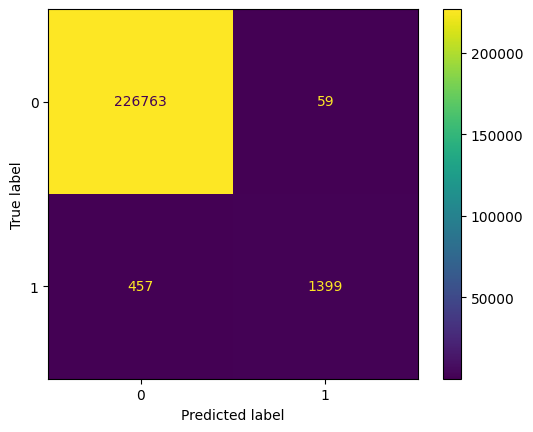

In [59]:
y_pred = gbm.predict(X_test)
y_pred_binary = np.round(y_pred)

accuracy = accuracy_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)
auc = roc_auc_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred_binary)

print('Accuracy:', accuracy)
print('Recall:', recall)
print('Precision:', precision)
print('F1 Score:', f1)
print('AUC:', auc)

ConfusionMatrixDisplay(confusion).plot()

In [60]:
#plot aucroc
import numpy as np
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

In [61]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

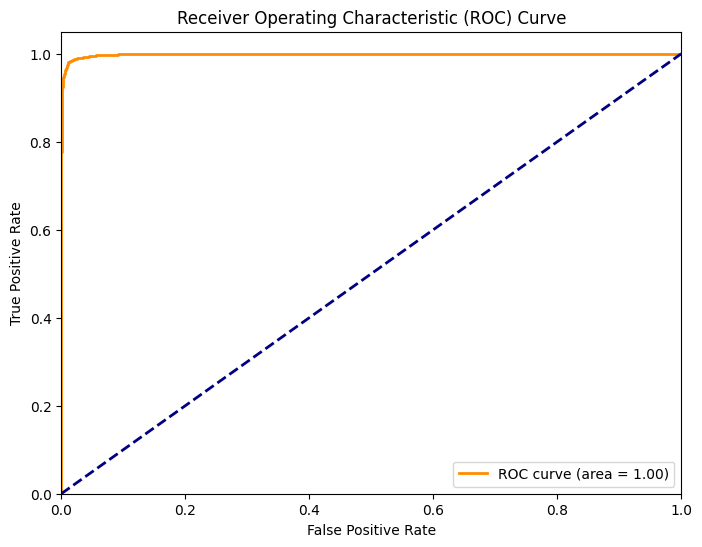

In [62]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

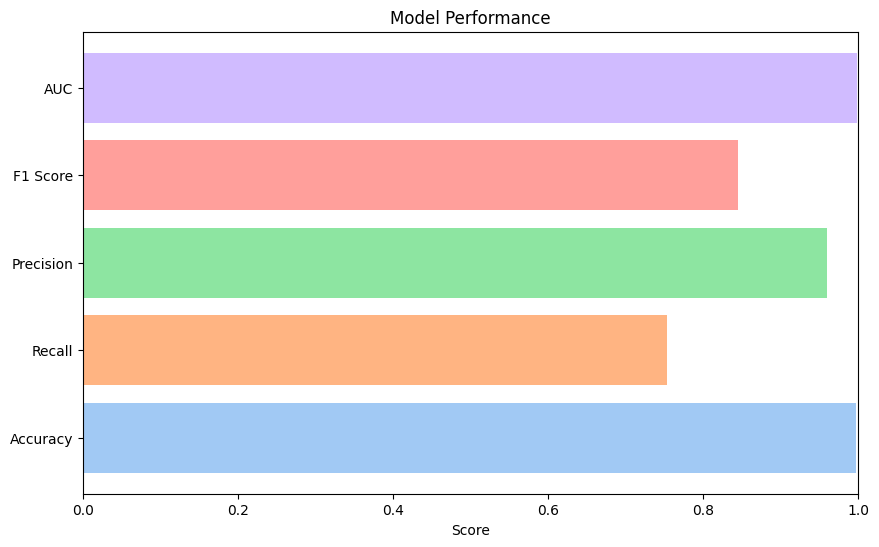

In [63]:
metrics = ['Accuracy', 'Recall', 'Precision', 'F1 Score', 'AUC']
values = [accuracy, recall, precision, f1, auc]
colors = sns.color_palette('pastel', len(metrics))

plt.figure(figsize=(10, 6))
plt.barh(metrics, values, color=colors)
plt.xlabel('Score')
plt.title('Model Performance')
plt.xlim(0, 1)
plt.show()

In [ ]:
lst = range(0, len(x_train_pca[0]))
lst_str = [format(x, '02d') for x in lst]
importance = pd.DataFrame({'feature': lst_str ,'importance': gbm.feature_importance()})
importance = importance.sort_values('importance', ascending=False)
print(importance)

In [ ]:
feature_importance = gbm.feature_importance()
features = lst_str
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df.sort_values(by='Importance', ascending=False))
plt.title('Feature Importance')
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Importance', y='Feature', data=importance_df.sort_values(by='Importance', ascending=False), size='Importance', hue='Importance', palette='viridis')
plt.title('Feature Importance')
plt.show()

In [ ]:
#AUC OPTIMIZED PCA
results = pd.DataFrame({'Recall': [recall], 'Precision': [precision], 'F1 Score': [f1], 'AUC': [auc]})
#results.to_csv(path + 'LGB_PCA_factors_results_aucoptimized.csv', index=False)

best_params_df = pd.DataFrame(best_params, index=[0])
#best_params_df.to_csv(path + 'best_params_lgb_PCAfactors_aucoptimized.csv', index=False)

#gbm.save_model(path + 'model_lgb_PCAfactors_aucoptimized.txt')

<font size="6">Testing with yfinance data</font>

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm as lgb
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

In [25]:
cri_data = pd.read_pickle('xy_data.pkl')
cri_data.head()

CompNo    year  month   StkIndx     STInt  dtdlevel  dtdtrend  \
489123    29823  1991.0      1  0.045126  0.013825  1.810500       0.0   
1714449  125959  1991.0      1  0.045126  0.013825  7.910572       0.0   
64808     27304  1991.0      1  0.045126  0.013825  6.080297       0.0   
192576    27954  1991.0      1  0.045126  0.013825  2.527857       0.0   
539304    30244  1991.0      1  0.045126  0.013825  4.337317       0.0   

         liqnonfinlevel  liqnonfintrend  ni2talevel  ...  lqfintrend  \
489123         0.983576       -0.268833    0.003667  ...         0.0   
1714449        0.538243        0.018112    0.016005  ...         0.0   
64808          0.582996       -0.042528    0.006643  ...         0.0   
192576         1.041157       -0.129895   -0.010749  ...         0.0   
539304         0.656583        0.193871    0.007802  ...         0.0   

         DTDmedianFin  DTDmedianNonFin  dummy297fin  Default  day       date  \
489123            0.0         2.812531            0        0    1 1991-01-01   
1714449           0.0         2.812531            0        0    1 1991-01-01   
64808             0.0         2.812531            0        0    1 1991-01-01   
192576            0.0         2.812531            0        0    1 1991-01-01   
539304            0.0         2.812531            0        0    1 1991-01-01   

         StartDate  EventDate  Duration  
489123  1988-01-04 1991-01-31 1123 days  
1714449 1988-01-04 1991-01-31 1123 days  
64808   1988-01-04 1991-01-31 1123 days  
192576  1988-01-04 1991-01-31 1123 days  
539304  1988-01-04 1991-01-31 1123 days  

[5 rows x 26 columns]

In [26]:
compustat_data = pd.read_pickle('compustat_vin.pkl')
compustat_data.head()

gvkey   datadate     cik  tic     sic  current_ratio  quick_ratio  \
0   1004 2000-05-31  1750.0  AIR  5080.0       3.120983     1.069792   
1   1004 2000-06-30  1750.0  AIR  5080.0       3.120983     1.069792   
2   1004 2000-07-31  1750.0  AIR  5080.0       3.120983     1.069792   
3   1004 2000-08-31  1750.0  AIR  5080.0       3.032279     0.989191   
4   1004 2000-09-30  1750.0  AIR  5080.0       3.032279     0.989191   

   cash_ratio  net_working_capital  debt_ratio  ...  price_to_earnings_inf  \
0   -0.042786              347.451    0.279030  ...                    0.0   
1   -0.042786              347.451    0.279030  ...                    0.0   
2   -0.042786              347.451    0.279030  ...                    0.0   
3   -0.003399              341.996    0.305692  ...                    0.0   
4   -0.003399              341.996    0.305692  ...                    0.0   

   gross_margin_ratio_inf  receivables_turnover_inf  days_in_inventory_inf  \
0                     0.0                       0.0                    0.0   
1                     0.0                       0.0                    0.0   
2                     0.0                       0.0                    0.0   
3                     0.0                       0.0                    0.0   
4                     0.0                       0.0                    0.0   

   retention_ratio_inf  dividend_payout_ratio_inf  debt_to_equity_ratio_inf  \
0                  0.0                        0.0                       0.0   
1                  0.0                        0.0                       0.0   
2                  0.0                        0.0                       0.0   
3                  0.0                        0.0                       0.0   
4                  0.0                        0.0                       0.0   

   working_capital_turnover_inf  yyyy  mm  
0                           0.0  2000   5  
1                           0.0  2000   6  
2                           0.0  2000   7  
3                           0.0  2000   8  
4                           0.0  2000   9  

[5 rows x 49 columns]

In [27]:
company_map = pd.read_excel('compustat_company_map.xlsx')
company_map.head()

company_number   gvkey
0           50797  177439
1           92318  160317
2           92300  106156
3           45321  141466
4           43665   66636

In [20]:
# cri_data['CompNo_formatted'] = cri_data['CompNo'].apply(lambda x: int(x / 1000))

In [28]:
mapping_dict = company_map.set_index('company_number')['gvkey'].to_dict()

In [30]:
cri_data['gvkey'] = cri_data['CompNo'].map(mapping_dict)

In [31]:
compustat_data.rename(columns = {'mm': 'month'}, inplace=True)
compustat_data.rename(columns = {'yyyy': 'year'}, inplace=True)
compustat_data.drop(columns = ['datadate', 'sic', 'quarter'], inplace=True)
compustat_data

gvkey        cik    tic  current_ratio  quick_ratio  cash_ratio  \
0          1004     1750.0    AIR       3.120983     1.069792   -0.042786   
1          1004     1750.0    AIR       3.120983     1.069792   -0.042786   
2          1004     1750.0    AIR       3.120983     1.069792   -0.042786   
3          1004     1750.0    AIR       3.032279     0.989191   -0.003399   
4          1004     1750.0    AIR       3.032279     0.989191   -0.003399   
...         ...        ...    ...            ...          ...         ...   
2226310  353945  1948862.0  ACLLY       2.519278     1.777203   -0.005182   
2226311  353945  1948862.0  ACLLY       2.510161     1.799795   -0.002064   
2226312  353945  1948862.0  ACLLY       2.510161     1.799795   -0.002064   
2226313  353945  1948862.0  ACLLY       2.510161     1.799795   -0.002064   
2226314  353945  1948862.0  ACLLY       2.147041     1.496589    0.405641   

         net_working_capital  debt_ratio  debt_to_equity_ratio  equity_ratio  \
0                    347.451    0.279030              0.608989      0.458186   
1                    347.451    0.279030              0.608989      0.458186   
2                    347.451    0.279030              0.608989      0.458186   
3                    341.996    0.305692              0.673592      0.453824   
4                    341.996    0.305692              0.673592      0.453824   
...                      ...         ...                   ...           ...   
2226310               62.102    0.123077              0.113801      0.583091   
2226311               63.463    0.120438              0.109377      0.584569   
2226312               63.463    0.120438              0.109377      0.584569   
2226313               63.463    0.120438              0.109377      0.584569   
2226314              328.508    0.357492              1.236493      0.289118   

         ...  price_to_earnings_inf  gross_margin_ratio_inf  \
0        ...                    0.0                     0.0   
1        ...                    0.0                     0.0   
2        ...                    0.0                     0.0   
3        ...                    0.0                     0.0   
4        ...                    0.0                     0.0   
...      ...                    ...                     ...   
2226310  ...                    0.0                     0.0   
2226311  ...                    0.0                     0.0   
2226312  ...                    0.0                     0.0   
2226313  ...                    0.0                     0.0   
2226314  ...                    0.0                     0.0   

         receivables_turnover_inf  days_in_inventory_inf  retention_ratio_inf  \
0                             0.0                    0.0                  0.0   
1                             0.0                    0.0                  0.0   
2                             0.0                    0.0                  0.0   
3                             0.0                    0.0                  0.0   
4                             0.0                    0.0                  0.0   
...                           ...                    ...                  ...   
2226310                       0.0                    0.0                  0.0   
2226311                       0.0                    0.0                  0.0   
2226312                       0.0                    0.0                  0.0   
2226313                       0.0                    0.0                  0.0   
2226314                       0.0                    0.0                  0.0   

         dividend_payout_ratio_inf  debt_to_equity_ratio_inf  \
0                              0.0                       0.0   
1                              0.0                       0.0   
2                              0.0                       0.0   
3                              0.0                       0.0   
4                              0.0                       0.0   
...       

In [32]:
cri_data

CompNo    year  month   StkIndx     STInt  dtdlevel  dtdtrend  \
489123    29823  1991.0      1  0.045126  0.013825  1.810500  0.000000   
1714449  125959  1991.0      1  0.045126  0.013825  7.910572  0.000000   
64808     27304  1991.0      1  0.045126  0.013825  6.080297  0.000000   
192576    27954  1991.0      1  0.045126  0.013825  2.527857  0.000000   
539304    30244  1991.0      1  0.045126  0.013825  4.337317  0.000000   
...         ...     ...    ...       ...       ...       ...       ...   
2232504  200510  2023.0      7  0.015960 -0.010290  0.958419 -0.856131   
1773536  131684  2023.0      7  0.110445  0.009928  1.289534  0.003536   
1891924  203351  2023.0      7  0.110445  0.009928  0.440333 -0.085914   
2240221  211546  2023.0      7  0.015960 -0.010290  7.349152 -0.538347   
2240222  211664  2023.0      7  0.015960 -0.010290  4.090032  0.000000   

         liqnonfinlevel  liqnonfintrend  ni2talevel  ...  DTDmedianFin  \
489123         0.983576       -0.268833    0.003667  ...      0.000000   
1714449        0.538243        0.018112    0.016005  ...      0.000000   
64808          0.582996       -0.042528    0.006643  ...      0.000000   
192576         1.041157       -0.129895   -0.010749  ...      0.000000   
539304         0.656583        0.193871    0.007802  ...      0.000000   
...                 ...             ...         ...  ...           ...   
2232504       -1.198725        0.791549   -0.117400  ...      0.000000   
1773536        0.000000        0.000000   -0.001286  ...      2.596495   
1891924       -1.474937        0.186534   -0.010621  ...      0.000000   
2240221        2.291604        0.000000   -0.088621  ...      0.000000   
2240222        1.198122        0.000000   -0.074286  ...      0.000000   

         DTDmedianNonFin  dummy297fin  Default  day       date  StartDate  \
489123          2.812531            0        0    1 1991-01-01 1988-01-04   
1714449         2.812531            0        0    1 1991-01-01 1988-01-04   
64808           2.812531            0        0    1 1991-01-01 1988-01-04   
192576          2.812531            0        0    1 1991-01-01 1988-01-04   
539304          2.812531            0        0    1 1991-01-01 1988-01-04   
...                  ...          ...      ...  ...        ...        ...   
2232504         2.087496            0        0    1 2023-07-01 2018-11-27   
1773536         0.000000            1        0    1 2023-07-01 2013-05-01   
1891924         3.244875            0        0    1 2023-07-01 2020-07-02   
2240221         2.087496            0        0    1 2023-07-01 2023-03-20   
2240222         2.087496            0        0    1 2023-07-01 2023-04-10   

         EventDate  Duration   gvkey  
489123  1991-01-31 1123 days  4607.0  
1714449 1991-01-31 1123 days  6074.0  
64808   1991-01-31 1123 days  3532.0  
192576  1991-01-31 1123 days  8333.0  
539304  1991-01-31 1123 days  5839.0  
...            ...       ...     ...  
2232504 2023-07-31 1707 days     NaN  
1773536 2023-07-31 3743 days     NaN  
1891924 2023-07-31 1124 days     NaN  
2240221 2023-07-31  133 days     NaN  
2240222 2023-07-31  112 days     NaN  

[2240223 rows x 27 columns]

In [85]:
cri_compustat_merged = cri_data.merge(compustat_data, on=['gvkey', 'year', 'month'], how='inner')

In [86]:
cri_compustat_merged.shape

(1143387, 70)

In [38]:
#load yfinance data
yfinance_data = pd.read_pickle('final_yfiance.pkl')
yfinance_data.head()

tic  yyyy  mm  Rolling_Sortino      macd    macd_h    macd_s         rsi
0   A  2000   2              NaN  1.075967  0.860774  0.215193  100.000000
1   A  2000   3              NaN  3.969328  3.003308  0.966020  100.000000
2   A  2000   4              NaN  4.539882  2.859089  1.680793   65.530596
3   A  2000   5              NaN  4.087595  1.925442  2.162153   55.676209
4   A  2000   6              NaN  3.326092  0.931151  2.394941   52.327200

In [39]:
#drop and rename columns
yfinance_data.rename(columns = {'mm': 'month'}, inplace=True)
yfinance_data.rename(columns = {'yyyy': 'year'}, inplace=True)
yfinance_data.head()

tic  year  month  Rolling_Sortino      macd    macd_h    macd_s         rsi
0   A  2000      2              NaN  1.075967  0.860774  0.215193  100.000000
1   A  2000      3              NaN  3.969328  3.003308  0.966020  100.000000
2   A  2000      4              NaN  4.539882  2.859089  1.680793   65.530596
3   A  2000      5              NaN  4.087595  1.925442  2.162153   55.676209
4   A  2000      6              NaN  3.326092  0.931151  2.394941   52.327200

In [41]:
#merge both datasets
merged_df = cri_compustat_merged.merge(yfinance_data, on=['tic', 'year', 'month'], how='inner')
merged_df.head()

CompNo    year  month   StkIndx     STInt  dtdlevel  dtdtrend  \
0   49767  2000.0      3  0.489753  0.007840  4.550203  0.687265   
1   28548  2000.0      3  0.164517  0.011801  0.055003  0.346331   
2   27900  2000.0      3  0.164517  0.011801  2.586975  0.463901   
3   31295  2000.0      4  0.074944  0.011634  2.640969  2.178957   
4   44177  2000.0      4  0.074944  0.011634  3.975001 -0.600265   

   liqnonfinlevel  liqnonfintrend  ni2talevel  ...  days_in_inventory_inf  \
0        0.721081       -0.105979    0.003043  ...                    0.0   
1        0.425689       -0.003875    0.001794  ...                    0.0   
2        0.397322       -0.081808    0.004445  ...                    0.0   
3        0.848589       -0.043059    0.005300  ...                    0.0   
4        0.802049       -0.310909   -0.017048  ...                    0.0   

   retention_ratio_inf  dividend_payout_ratio_inf  debt_to_equity_ratio_inf  \
0                  0.0                        0.0                       0.0   
1                  0.0                        0.0                       0.0   
2                  0.0                        0.0                       0.0   
3                  0.0                        0.0                       0.0   
4                  0.0                        0.0                       0.0   

   working_capital_turnover_inf  Rolling_Sortino      macd    macd_h  \
0                           0.0              NaN  4.381473  3.417429   
1                           0.0              NaN -0.213019 -0.159286   
2                           0.0              NaN  0.090149  0.067044   
3                           0.0              NaN  0.010365  0.009096   
4                           0.0              NaN -0.889232 -0.691499   

     macd_s    rsi  
0  0.964044  100.0  
1 -0.053733    0.0  
2  0.023105  100.0  
3  0.001269   75.0  
4 -0.197733    0.0  

[5 rows x 75 columns]

In [42]:
merged_df.shape

(635132, 75)

In [47]:
#count difference in rows and unique tickers
print(cri_compustat_merged.shape[0] - merged_df.shape[0])
print(cri_compustat_merged.tic.nunique() - merged_df.tic.nunique())

508255
6435


In [48]:
merged_df.isna().sum().sort_values(ascending= False)

Rolling_Sortino           19888
rsi                         536
gross_margin_ratio            0
inventory_turnover_inf        0
sector_industry               0
                          ...  
EventDate                     0
StartDate                     0
date                          0
day                           0
net_profit_margin             0
Length: 75, dtype: int64

In [49]:
merged_df.dtypes

CompNo               int64
year               float64
month                int64
StkIndx            float64
STInt              float64
                    ...   
Rolling_Sortino    float64
macd               float64
macd_h             float64
macd_s             float64
rsi                float64
Length: 75, dtype: object

In [123]:
merged_df['Default'].value_counts()

Default
0    633691
1      1441
Name: count, dtype: int64

In [151]:
merged_df['sector_industry'] = merged_df['sector_industry'].astype(float)

In [152]:
merged_df.columns

Index(['CompNo', 'year', 'month', 'StkIndx', 'STInt', 'dtdlevel', 'dtdtrend',
       'liqnonfinlevel', 'liqnonfintrend', 'ni2talevel', 'ni2tatrend',
       'sizelevel', 'sizetrend', 'm2b', 'sigma', 'liqfinlevel', 'lqfintrend',
       'DTDmedianFin', 'DTDmedianNonFin', 'dummy297fin', 'Default', 'day',
       'date', 'CompNo_formatted', 'gvkey', 'cik', 'tic', 'current_ratio',
       'quick_ratio', 'cash_ratio', 'net_working_capital', 'debt_ratio',
       'debt_to_equity_ratio', 'equity_ratio', 'cashflow_to_debt_ratio',
       'net_profit_margin', 'return_on_assets', 'asset_turnover',
       'inventory_turnover', 'days_in_inventory', 'receivables_turnover',
       'day_sales_outstanding', 'working_capital_turnover',
       'price_to_earnings', 'retention_ratio', 'gross_margin_ratio',
       'operating_profit_margin', 'ebitda_margin',
       'debt_service_coverage_ratio', 'interest_coverage_ratio',
       'dividend_payout_ratio', 'sector_industry', 'inventory_turnover_inf',
       'debt_se

work on model using cri_compustat merged first

In [87]:
cri_compustat_merged

CompNo    year  month   StkIndx     STInt  dtdlevel  dtdtrend  \
0         27809  2000.0      3  0.164517  0.011801  4.228806  1.067829   
1         36858  2000.0      3  0.164517  0.011801  7.526516  0.661114   
2         38263  2000.0      3  0.164517  0.011801  1.988268 -0.856836   
3         35535  2000.0      3  0.164517  0.011801  3.043216  0.272535   
4         32732  2000.0      3  0.164517  0.011801  3.006225  0.211347   
...         ...     ...    ...       ...       ...       ...       ...   
1143382   27334  2023.0      7  0.110445  0.009928  4.813408  1.285527   
1143383   32388  2023.0      7  0.110445  0.009928  3.637767  1.072696   
1143384   27348  2023.0      7  0.110445  0.009928  3.124164  0.535792   
1143385   27136  2023.0      7  0.110445  0.009928  3.328665  1.573513   
1143386   29406  2023.0      7  0.110445  0.009928  2.983618  0.517713   

         liqnonfinlevel  liqnonfintrend  ni2talevel  ...  ebitda_margin_inf  \
0             -0.082247       -0.391751   -0.000246  ...                0.0   
1              1.593042        0.135539    0.021708  ...                0.0   
2              1.735740        0.007481   -0.003181  ...                0.0   
3              1.106130        0.541976   -0.002146  ...                0.0   
4              2.032667       -0.093195   -0.003874  ...                0.0   
...                 ...             ...         ...  ...                ...   
1143382       -0.311802        0.041775    0.008093  ...                0.0   
1143383        0.114648       -0.005109    0.018388  ...                0.0   
1143384        0.738567        0.004386    0.020075  ...                0.0   
1143385       -0.025210        0.006575    0.006587  ...                0.0   
1143386        0.402398        0.141918    0.020642  ...                0.0   

         day_sales_outstanding_inf  price_to_earnings_inf  \
0                              0.0                    0.0   
1                              0.0                    0.0   
2                              0.0                    0.0   
3                              0.0                    0.0   
4                              0.0                    0.0   
...                            ...                    ...   
1143382                        0.0                    0.0   
1143383                        0.0                    0.0   
1143384                        0.0                    0.0   
1143385                        0.0                    0.0   
1143386                        0.0                    0.0   

         gross_margin_ratio_inf  receivables_turnover_inf  \
0                           0.0                       0.0   
1                           0.0                       0.0   
2                           0.0                       0.0   
3                           0.0                       0.0   
4                           0.0                       0.0   
...                         ...                       ...   
1143382                     0.0                       0.0   
1143383                     0.0                       0.0   
1143384                     0.0                       0.0   
1143385                     0.0                       0.0   
1143386                     0.0                       0.0   

         days_in_inventory_inf  retention_ratio_inf  \
0                          0.0                  0.0   
1                          0.0                  0.0   
2                          0.0                  0.0   
3                          0.0                  0.0   
4                          0.0                  0.0   
...                        ...                  ...   
1143382                    0.0                  0.0   
1143383                    0.0                  0.0   
1143384                    0.0                  0.0   
1143385                    0.0                  0.0   
1143386                    0.0                  0.0   

         dividend_payout_ratio_inf  debt_to_

In [88]:
cri_compustat_merged.isna().sum().sort_values(ascending= False)

CompNo                          0
working_capital_turnover        0
debt_service_coverage_ratio     0
ebitda_margin                   0
operating_profit_margin         0
                               ..
current_ratio                   0
quick_ratio                     0
cash_ratio                      0
net_working_capital             0
working_capital_turnover_inf    0
Length: 70, dtype: int64

In [89]:
inf_count = cri_compustat_merged.isin([np.inf, -np.inf]).mean() * 100
inf_count.sort_values(ascending=False)

inventory_turnover              26.315937
debt_service_coverage_ratio     14.465443
cashflow_to_debt_ratio          14.278280
interest_coverage_ratio          8.500446
net_profit_margin                3.280254
                                  ...    
current_ratio                    0.000000
quick_ratio                      0.000000
cash_ratio                       0.000000
net_working_capital              0.000000
working_capital_turnover_inf     0.000000
Length: 70, dtype: float64

In [90]:
#get list of columns with inf values
inf_cols = cri_compustat_merged.columns[cri_compustat_merged.isin([np.inf, -np.inf]).any()].tolist()
inf_cols

['debt_to_equity_ratio',
 'cashflow_to_debt_ratio',
 'net_profit_margin',
 'inventory_turnover',
 'days_in_inventory',
 'receivables_turnover',
 'day_sales_outstanding',
 'working_capital_turnover',
 'price_to_earnings',
 'retention_ratio',
 'gross_margin_ratio',
 'operating_profit_margin',
 'ebitda_margin',
 'debt_service_coverage_ratio',
 'interest_coverage_ratio',
 'dividend_payout_ratio']

In [103]:
for col in inf_cols:
    cri_compustat_merged[col] = cri_compustat_merged.groupby(['CompNo'])[col].transform(lambda x: x.replace([float('inf')], x.replace([float('inf')], 0).max())).transform(lambda x: x.replace([float('-inf')],x.replace([float('-inf')], 0).min()))

In [104]:
cri_compustat_merged

CompNo    year  month   StkIndx     STInt  dtdlevel  dtdtrend  \
0         27809  2000.0      3  0.164517  0.011801  4.228806  1.067829   
1         36858  2000.0      3  0.164517  0.011801  7.526516  0.661114   
2         38263  2000.0      3  0.164517  0.011801  1.988268 -0.856836   
3         35535  2000.0      3  0.164517  0.011801  3.043216  0.272535   
4         32732  2000.0      3  0.164517  0.011801  3.006225  0.211347   
...         ...     ...    ...       ...       ...       ...       ...   
1143382   27334  2023.0      7  0.110445  0.009928  4.813408  1.285527   
1143383   32388  2023.0      7  0.110445  0.009928  3.637767  1.072696   
1143384   27348  2023.0      7  0.110445  0.009928  3.124164  0.535792   
1143385   27136  2023.0      7  0.110445  0.009928  3.328665  1.573513   
1143386   29406  2023.0      7  0.110445  0.009928  2.983618  0.517713   

         liqnonfinlevel  liqnonfintrend  ni2talevel  ...  ebitda_margin_inf  \
0             -0.082247       -0.391751   -0.000246  ...                0.0   
1              1.593042        0.135539    0.021708  ...                0.0   
2              1.735740        0.007481   -0.003181  ...                0.0   
3              1.106130        0.541976   -0.002146  ...                0.0   
4              2.032667       -0.093195   -0.003874  ...                0.0   
...                 ...             ...         ...  ...                ...   
1143382       -0.311802        0.041775    0.008093  ...                0.0   
1143383        0.114648       -0.005109    0.018388  ...                0.0   
1143384        0.738567        0.004386    0.020075  ...                0.0   
1143385       -0.025210        0.006575    0.006587  ...                0.0   
1143386        0.402398        0.141918    0.020642  ...                0.0   

         day_sales_outstanding_inf  price_to_earnings_inf  \
0                              0.0                    0.0   
1                              0.0                    0.0   
2                              0.0                    0.0   
3                              0.0                    0.0   
4                              0.0                    0.0   
...                            ...                    ...   
1143382                        0.0                    0.0   
1143383                        0.0                    0.0   
1143384                        0.0                    0.0   
1143385                        0.0                    0.0   
1143386                        0.0                    0.0   

         gross_margin_ratio_inf  receivables_turnover_inf  \
0                           0.0                       0.0   
1                           0.0                       0.0   
2                           0.0                       0.0   
3                           0.0                       0.0   
4                           0.0                       0.0   
...                         ...                       ...   
1143382                     0.0                       0.0   
1143383                     0.0                       0.0   
1143384                     0.0                       0.0   
1143385                     0.0                       0.0   
1143386                     0.0                       0.0   

         days_in_inventory_inf  retention_ratio_inf  \
0                          0.0                  0.0   
1                          0.0                  0.0   
2                          0.0                  0.0   
3                          0.0                  0.0   
4                          0.0                  0.0   
...                        ...                  ...   
1143382                    0.0                  0.0   
1143383                    0.0                  0.0   
1143384                    0.0                  0.0   
1143385                    0.0                  0.0   
1143386                    0.0                  0.0   

         dividend_payout_ratio_inf  debt_to_

In [105]:
#check for inf values
inf_count = cri_compustat_merged.isin([np.inf, -np.inf]).mean() * 100
inf_count.sort_values(ascending=False)

CompNo                          0.0
working_capital_turnover        0.0
debt_service_coverage_ratio     0.0
ebitda_margin                   0.0
operating_profit_margin         0.0
                               ... 
current_ratio                   0.0
quick_ratio                     0.0
cash_ratio                      0.0
net_working_capital             0.0
working_capital_turnover_inf    0.0
Length: 70, dtype: float64

In [109]:
merged_df = cri_compustat_merged.copy()
merged_df

CompNo    year  month   StkIndx     STInt  dtdlevel  dtdtrend  \
0         27809  2000.0      3  0.164517  0.011801  4.228806  1.067829   
1         36858  2000.0      3  0.164517  0.011801  7.526516  0.661114   
2         38263  2000.0      3  0.164517  0.011801  1.988268 -0.856836   
3         35535  2000.0      3  0.164517  0.011801  3.043216  0.272535   
4         32732  2000.0      3  0.164517  0.011801  3.006225  0.211347   
...         ...     ...    ...       ...       ...       ...       ...   
1143382   27334  2023.0      7  0.110445  0.009928  4.813408  1.285527   
1143383   32388  2023.0      7  0.110445  0.009928  3.637767  1.072696   
1143384   27348  2023.0      7  0.110445  0.009928  3.124164  0.535792   
1143385   27136  2023.0      7  0.110445  0.009928  3.328665  1.573513   
1143386   29406  2023.0      7  0.110445  0.009928  2.983618  0.517713   

         liqnonfinlevel  liqnonfintrend  ni2talevel  ...  ebitda_margin_inf  \
0             -0.082247       -0.391751   -0.000246  ...                0.0   
1              1.593042        0.135539    0.021708  ...                0.0   
2              1.735740        0.007481   -0.003181  ...                0.0   
3              1.106130        0.541976   -0.002146  ...                0.0   
4              2.032667       -0.093195   -0.003874  ...                0.0   
...                 ...             ...         ...  ...                ...   
1143382       -0.311802        0.041775    0.008093  ...                0.0   
1143383        0.114648       -0.005109    0.018388  ...                0.0   
1143384        0.738567        0.004386    0.020075  ...                0.0   
1143385       -0.025210        0.006575    0.006587  ...                0.0   
1143386        0.402398        0.141918    0.020642  ...                0.0   

         day_sales_outstanding_inf  price_to_earnings_inf  \
0                              0.0                    0.0   
1                              0.0                    0.0   
2                              0.0                    0.0   
3                              0.0                    0.0   
4                              0.0                    0.0   
...                            ...                    ...   
1143382                        0.0                    0.0   
1143383                        0.0                    0.0   
1143384                        0.0                    0.0   
1143385                        0.0                    0.0   
1143386                        0.0                    0.0   

         gross_margin_ratio_inf  receivables_turnover_inf  \
0                           0.0                       0.0   
1                           0.0                       0.0   
2                           0.0                       0.0   
3                           0.0                       0.0   
4                           0.0                       0.0   
...                         ...                       ...   
1143382                     0.0                       0.0   
1143383                     0.0                       0.0   
1143384                     0.0                       0.0   
1143385                     0.0                       0.0   
1143386                     0.0                       0.0   

         days_in_inventory_inf  retention_ratio_inf  \
0                          0.0                  0.0   
1                          0.0                  0.0   
2                          0.0                  0.0   
3                          0.0                  0.0   
4                          0.0                  0.0   
...                        ...                  ...   
1143382                    0.0                  0.0   
1143383                    0.0                  0.0   
1143384                    0.0                  0.0   
1143385                    0.0                  0.0   
1143386                    0.0                  0.0   

         dividend_payout_ratio_inf  debt_to_

In [117]:
merged_df['sector_industry'] = merged_df['sector_industry'].astype(float)

In [118]:
#time series split
import datetime

date2022 = datetime.datetime(2022, 1, 1)
date2020 = datetime.datetime(2020,1,1)
train_df = merged_df[merged_df["date"] < date2020]
validation_df = merged_df[(merged_df["date"] >= date2020) & (merged_df["date"] < date2022)]
test_df = merged_df[merged_df["date"] >= date2022]


In [119]:
merged_df.columns

Index(['CompNo', 'year', 'month', 'StkIndx', 'STInt', 'dtdlevel', 'dtdtrend',
       'liqnonfinlevel', 'liqnonfintrend', 'ni2talevel', 'ni2tatrend',
       'sizelevel', 'sizetrend', 'm2b', 'sigma', 'liqfinlevel', 'lqfintrend',
       'DTDmedianFin', 'DTDmedianNonFin', 'dummy297fin', 'Default', 'day',
       'date', 'StartDate', 'EventDate', 'Duration', 'gvkey', 'cik', 'tic',
       'current_ratio', 'quick_ratio', 'cash_ratio', 'net_working_capital',
       'debt_ratio', 'debt_to_equity_ratio', 'equity_ratio',
       'cashflow_to_debt_ratio', 'net_profit_margin', 'return_on_assets',
       'asset_turnover', 'inventory_turnover', 'days_in_inventory',
       'receivables_turnover', 'day_sales_outstanding',
       'working_capital_turnover', 'price_to_earnings', 'retention_ratio',
       'gross_margin_ratio', 'operating_profit_margin', 'ebitda_margin',
       'debt_service_coverage_ratio', 'interest_coverage_ratio',
       'dividend_payout_ratio', 'sector_industry', 'inventory_turnover_inf

In [120]:
X_train = train_df.drop(['CompNo', 'year', 'month', 'dummy297fin', 'Default', 'day', 'date', 'StartDate', 'EventDate', 'Duration', 'gvkey', 'cik', 'tic'], axis=1)
y_train = train_df['Default']
X_val = validation_df.drop(['CompNo', 'year', 'month', 'dummy297fin', 'Default', 'day', 'date', 'StartDate', 'EventDate', 'Duration', 'gvkey', 'cik', 'tic'], axis=1)
y_val = validation_df['Default']
X_test = test_df.drop(['CompNo', 'year', 'month', 'dummy297fin', 'Default', 'day', 'date', 'StartDate', 'EventDate', 'Duration', 'gvkey', 'cik', 'tic'], axis=1)
y_test = test_df["Default"]

In [163]:
# X = merged_df.drop(['Default', 'date', 'tic', 'gvkey', 'cik', 'CompNo', 'year', 'month', 'day', 'dummy297fin', 'CompNo_formatted'], axis=1)  # Features
# y = merged_df['Default']  # Target

In [121]:
X_train.columns

Index(['StkIndx', 'STInt', 'dtdlevel', 'dtdtrend', 'liqnonfinlevel',
       'liqnonfintrend', 'ni2talevel', 'ni2tatrend', 'sizelevel', 'sizetrend',
       'm2b', 'sigma', 'liqfinlevel', 'lqfintrend', 'DTDmedianFin',
       'DTDmedianNonFin', 'current_ratio', 'quick_ratio', 'cash_ratio',
       'net_working_capital', 'debt_ratio', 'debt_to_equity_ratio',
       'equity_ratio', 'cashflow_to_debt_ratio', 'net_profit_margin',
       'return_on_assets', 'asset_turnover', 'inventory_turnover',
       'days_in_inventory', 'receivables_turnover', 'day_sales_outstanding',
       'working_capital_turnover', 'price_to_earnings', 'retention_ratio',
       'gross_margin_ratio', 'operating_profit_margin', 'ebitda_margin',
       'debt_service_coverage_ratio', 'interest_coverage_ratio',
       'dividend_payout_ratio', 'sector_industry', 'inventory_turnover_inf',
       'debt_service_coverage_ratio_inf', 'cashflow_to_debt_ratio_inf',
       'interest_coverage_ratio_inf', 'net_profit_margin_inf',
     

In [155]:
#change to time series split --> take before 2021 to train then test on 2022+2023

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm as lgb
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import pickle
import optuna as optuna
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.inspection import permutation_importance

In [124]:
# WARNING: 2 changes to change evaluation metric

optimisation_metric = "auc" #"accuracy" "recall" "precision" "f1" "auc"
def objective(trial):
    param = {
        'num_leaves': trial.suggest_int('num_leaves', 2, 256),
        'objective': 'binary',
        'metric': 'precision', #"accuracy" "recall" "precision" "f1" "auc"
        'boosting_type': 'gbdt',
        'lambda_l1': trial.suggest_float('lambda_l1', 1e-8, 10.0, log=True),
        'lambda_l2': trial.suggest_float('lambda_l2', 1e-8, 10.0, log=True),
        'feature_fraction': trial.suggest_float('feature_fraction', 0.4, 1.0),
        # 'bagging_fraction': trial.suggest_float('bagging_fraction', 0.4, 1.0),
        # 'bagging_freq': trial.suggest_int('bagging_freq', 1, 7),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
        'learning_rate': trial.suggest_float('learning_rate', 1e-8, 10.0, log=True),
        'scale_pos_weight': 100,
        'max_depth': trial.suggest_int('max_depth', 2, 256),
        'num_boost_round': trial.suggest_int('num_boost_round', 100, 500),
    }
    
    # full data
    gbm = lgb.train(param, lgb.Dataset(X_train, y_train))
    
    preds = gbm.predict(X_val)
    y_pred_binary = np.round(preds)
    
    auc = roc_auc_score(y_val, preds)
    accuracy = accuracy_score(y_val, y_pred_binary)
    recall = recall_score(y_val, y_pred_binary)
    precision = precision_score(y_val, y_pred_binary)
    f1 = f1_score(y_val, y_pred_binary)
    #choose the metric you want to optimized

    if optimisation_metric == "auc":
        return auc
    elif optimisation_metric == "recall":
        return recall
    elif optimisation_metric == "precision":
        return precision
    elif optimisation_metric == "f1":
        return f1
    else:
        return auc

'''
    match optimisation_metric:
        case "auc":
            return auc
        case "recall":
            return recall
        case "precision":
            return precision
        case "f1":
            return f1
        case _:
            return auc
    return auc
'''

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

best_params = study.best_params


[I 2023-11-01 00:15:59,334] A new study created in memory with name: no-name-b1105239-a8db-4996-978c-26e28fb020f0
/usr/local/lib/python3.9/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 8767, number of negative: 1028576
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.057199 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10281
[LightGBM] [Info] Number of data points in the train set: 1037343, number of used features: 55
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.008451 -> initscore=-4.764936
[LightGBM] [Info] Start training from score -4.764936


/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
[I 2023-11-01 00:16:54,064] Trial 0 finished with value: 0.9686613808726485 and parameters: {'num_leaves': 112, 'lambda_l1': 1.5034433653201318e-07, 'lambda_l2': 0.09772857224372476, 'feature_fraction': 0.6522476776188256, 'min_child_samples': 72, 'learning_rate': 4.14662654957398e-05, 'max_depth': 241, 'num_boost_round': 431}. Best is trial 0 with value: 0.9686613808726485.
/usr/local/lib/python3.9/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 8767, number of negative: 1028576
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.046718 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10281
[LightGBM] [Info] Number of data points in the train set: 1037343, number of used features: 55
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.008451 -> initscore=-4.764936
[LightGBM] [Info] Start training from score -4.764936


/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
[I 2023-11-01 00:17:09,307] Trial 1 finished with value: 0.9639818280311238 and parameters: {'num_leaves': 22, 'lambda_l1': 2.034481467946668e-06, 'lambda_l2': 0.9446149727973011, 'feature_fraction': 0.5153576884296934, 'min_child_samples': 26, 'learning_rate': 0.00037390028199339536, 'max_depth': 52, 'num_boost_round': 254}. Best is trial 0 with value: 0.9686613808726485.
/usr/local/lib/python3.9/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 8767, number of negative: 1028576
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.047552 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10281
[LightGBM] [Info] Number of data points in the train set: 1037343, number of used features: 55
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.008451 -> initscore=-4.764936
[LightGBM] [Info] Start training from score -4.764936


/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
[I 2023-11-01 00:17:15,383] Trial 2 finished with value: 0.9506400078794446 and parameters: {'num_leaves': 173, 'lambda_l1': 4.998574959306515e-06, 'lambda_l2': 0.07320960085537331, 'feature_fraction': 0.5202399899110112, 'min_child_samples': 76, 'learning_rate': 9.462100433748005e-07, 'max_depth': 2, 'num_boost_round': 238}. Best is trial 0 with value: 0.9686613808726485.
/usr/local/lib/python3.9/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 8767, number of negative: 1028576
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.060163 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10285
[LightGBM] [Info] Number of data points in the train set: 1037343, number of used features: 57
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.008451 -> initscore=-4.764936
[LightGBM] [Info] Start training from score -4.764936
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

[I 2023-11-01 00:17:21,666] Trial 3 finished with value: 0.8212085098000591 and parameters: {'num_leaves': 218, 'lambda_l1': 5.482887021170898, 'lambda_l2': 0.004567788127954651, 'feature_fraction': 0.9694030014602892, 'min_child_samples': 12, 'learning_rate': 1.815159440747127, 'max_depth': 168, 'num_boost_round': 329}. Best is trial 0 with value: 0.9686613808726485.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped t

/usr/local/lib/python3.9/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 8767, number of negative: 1028576
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.047671 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10281
[LightGBM] [Info] Number of data points in the train set: 1037343, number of used features: 55
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.008451 -> initscore=-4.764936
[LightGBM] [Info] Start training from score -4.764936
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped tr

[I 2023-11-01 00:17:30,107] Trial 4 finished with value: 0.7803790751502019 and parameters: {'num_leaves': 78, 'lambda_l1': 0.00021122751422102348, 'lambda_l2': 4.6979459640051833e-07, 'feature_fraction': 0.5005556472196856, 'min_child_samples': 26, 'learning_rate': 0.7056367755427123, 'max_depth': 119, 'num_boost_round': 464}. Best is trial 0 with value: 0.9686613808726485.
/usr/local/lib/python3.9/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 8767, number of negative: 1028576
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.051181 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10281
[LightGBM] [Info] Number of data points in the train set: 1037343, number of used features: 55
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.008451 -> initscore=-4.764936
[LightGBM] [Info] Start training from score -4.764936


[I 2023-11-01 00:18:37,429] Trial 5 finished with value: 0.9738796414852753 and parameters: {'num_leaves': 222, 'lambda_l1': 3.974606061439408e-08, 'lambda_l2': 0.08550649783899782, 'feature_fraction': 0.9900813174729621, 'min_child_samples': 56, 'learning_rate': 0.0044230068957723054, 'max_depth': 40, 'num_boost_round': 301}. Best is trial 5 with value: 0.9738796414852753.
/usr/local/lib/python3.9/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 8767, number of negative: 1028576
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.059999 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10285
[LightGBM] [Info] Number of data points in the train set: 1037343, number of used features: 57
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.008451 -> initscore=-4.764936
[LightGBM] [Info] Start training from score -4.764936


/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
[I 2023-11-01 00:19:06,517] Trial 6 finished with value: 0.9652465773662957 and parameters: {'num_leaves': 106, 'lambda_l1': 4.0043103736635874e-08, 'lambda_l2': 2.4210902436308893e-07, 'feature_fraction': 0.801160706964366, 'min_child_samples': 8, 'learning_rate': 9.438896199543997e-06, 'max_depth': 235, 'num_boost_round': 257}. Best is trial 5 with value: 0.9738796414852753.
/usr/local/lib/python3.9/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 8767, number of negative: 1028576
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.053889 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10283
[LightGBM] [Info] Number of data points in the train set: 1037343, number of used features: 56
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.008451 -> initscore=-4.764936
[LightGBM] [Info] Start training from score -4.764936
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
[I 2023-11-01 00:19:12,483] Trial 7 finished with value: 0.49997599231754164 and parameters: {'num_leaves': 72, 'lambda_l1': 0.5641643340043808, 'lambda_l2': 0.08010728529220801, 'feature_fraction': 0.8893580449729277, 'min_child_samples': 21, 'learning_rate': 9.4037421754991, 'max_depth': 75, 'num_boost_round': 421}. Best is trial 5 with value: 0.9738796414852753.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements


/usr/local/lib/python3.9/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 8767, number of negative: 1028576
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.081596 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10281
[LightGBM] [Info] Number of data points in the train set: 1037343, number of used features: 55
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.008451 -> initscore=-4.764936
[LightGBM] [Info] Start training from score -4.764936
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

[I 2023-11-01 00:19:24,389] Trial 8 finished with value: 0.8584872697724809 and parameters: {'num_leaves': 161, 'lambda_l1': 0.0004259461154878087, 'lambda_l2': 1.0692440952612201e-05, 'feature_fraction': 0.7224590692894142, 'min_child_samples': 37, 'learning_rate': 0.5949002501592104, 'max_depth': 30, 'num_boost_round': 198}. Best is trial 5 with value: 0.9738796414852753.
/usr/local/lib/python3.9/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 8767, number of negative: 1028576
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.101207 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10281
[LightGBM] [Info] Number of data points in the train set: 1037343, number of used features: 55
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.008451 -> initscore=-4.764936
[LightGBM] [Info] Start training from score -4.764936


[I 2023-11-01 00:19:50,720] Trial 9 finished with value: 0.9666642371712794 and parameters: {'num_leaves': 84, 'lambda_l1': 1.2645875643199893e-05, 'lambda_l2': 1.8768191682373783e-06, 'feature_fraction': 0.8355984440986564, 'min_child_samples': 38, 'learning_rate': 0.0703210173593269, 'max_depth': 50, 'num_boost_round': 196}. Best is trial 5 with value: 0.9738796414852753.
/usr/local/lib/python3.9/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 8767, number of negative: 1028576
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.072317 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10281
[LightGBM] [Info] Number of data points in the train set: 1037343, number of used features: 55
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.008451 -> initscore=-4.764936
[LightGBM] [Info] Start training from score -4.764936


/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
[I 2023-11-01 00:20:14,117] Trial 10 finished with value: 0.9517806559637546 and parameters: {'num_leaves': 247, 'lambda_l1': 7.008796399562885e-08, 'lambda_l2': 9.359856313525274, 'feature_fraction': 0.982120754152559, 'min_child_samples': 98, 'learning_rate': 2.8310007292882714e-08, 'max_depth': 110, 'num_boost_round': 107}. Best is trial 5 with value: 0.9738796414852753.
/usr/local/lib/python3.9/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 8767, number of negative: 1028576
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.054591 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10281
[LightGBM] [Info] Number of data points in the train set: 1037343, number of used features: 55
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.008451 -> initscore=-4.764936
[LightGBM] [Info] Start training from score -4.764936


/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
[I 2023-11-01 00:21:16,426] Trial 11 finished with value: 0.9726104107160445 and parameters: {'num_leaves': 164, 'lambda_l1': 1.2387054310144294e-08, 'lambda_l2': 0.00027409039008812185, 'feature_fraction': 0.6193900101580929, 'min_child_samples': 62, 'learning_rate': 0.0012993242225994598, 'max_depth': 246, 'num_boost_round': 371}. Best is trial 5 with value: 0.9738796414852753.
/usr/local/lib/python3.9/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 8767, number of negative: 1028576
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.056972 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10281
[LightGBM] [Info] Number of data points in the train set: 1037343, number of used features: 55
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.008451 -> initscore=-4.764936
[LightGBM] [Info] Start training from score -4.764936


[I 2023-11-01 00:22:33,871] Trial 12 finished with value: 0.9778108933320201 and parameters: {'num_leaves': 192, 'lambda_l1': 1.2631940335847852e-08, 'lambda_l2': 5.9654486968987915e-05, 'feature_fraction': 0.6240747330637424, 'min_child_samples': 56, 'learning_rate': 0.006127363462015784, 'max_depth': 150, 'num_boost_round': 368}. Best is trial 12 with value: 0.9778108933320201.
/usr/local/lib/python3.9/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 8767, number of negative: 1028576
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.060386 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10281
[LightGBM] [Info] Number of data points in the train set: 1037343, number of used features: 55
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.008451 -> initscore=-4.764936
[LightGBM] [Info] Start training from score -4.764936


[I 2023-11-01 00:23:41,063] Trial 13 finished with value: 0.9781298138481237 and parameters: {'num_leaves': 211, 'lambda_l1': 1.432233354446567e-08, 'lambda_l2': 0.00019333605141666127, 'feature_fraction': 0.7356978802328881, 'min_child_samples': 48, 'learning_rate': 0.010327023574451387, 'max_depth': 172, 'num_boost_round': 348}. Best is trial 13 with value: 0.9781298138481237.
/usr/local/lib/python3.9/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 8767, number of negative: 1028576
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.062120 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10281
[LightGBM] [Info] Number of data points in the train set: 1037343, number of used features: 55
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.008451 -> initscore=-4.764936
[LightGBM] [Info] Start training from score -4.764936


[I 2023-11-01 00:24:44,176] Trial 14 finished with value: 0.9780134935487048 and parameters: {'num_leaves': 198, 'lambda_l1': 1.3397968028169852e-08, 'lambda_l2': 9.21288191953904e-05, 'feature_fraction': 0.7266487434600162, 'min_child_samples': 44, 'learning_rate': 0.020636495214235367, 'max_depth': 178, 'num_boost_round': 363}. Best is trial 13 with value: 0.9781298138481237.
/usr/local/lib/python3.9/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 8767, number of negative: 1028576
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.052605 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10281
[LightGBM] [Info] Number of data points in the train set: 1037343, number of used features: 55
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.008451 -> initscore=-4.764936
[LightGBM] [Info] Start training from score -4.764936


[I 2023-11-01 00:26:21,282] Trial 15 finished with value: 0.9747500738697922 and parameters: {'num_leaves': 247, 'lambda_l1': 5.431285528653662e-07, 'lambda_l2': 3.001218552002597e-08, 'feature_fraction': 0.7534426354110022, 'min_child_samples': 43, 'learning_rate': 0.02943189042379282, 'max_depth': 199, 'num_boost_round': 496}. Best is trial 13 with value: 0.9781298138481237.
/usr/local/lib/python3.9/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 8767, number of negative: 1028576
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.073908 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10281
[LightGBM] [Info] Number of data points in the train set: 1037343, number of used features: 55
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.008451 -> initscore=-4.764936
[LightGBM] [Info] Start training from score -4.764936


[I 2023-11-01 00:27:15,744] Trial 16 finished with value: 0.9664896089825669 and parameters: {'num_leaves': 203, 'lambda_l1': 5.298596987968241e-07, 'lambda_l2': 0.0011669255128997826, 'feature_fraction': 0.6918517298506932, 'min_child_samples': 45, 'learning_rate': 0.05971032078489511, 'max_depth': 190, 'num_boost_round': 355}. Best is trial 13 with value: 0.9781298138481237.
/usr/local/lib/python3.9/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 8767, number of negative: 1028576
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.053777 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10281
[LightGBM] [Info] Number of data points in the train set: 1037343, number of used features: 55
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.008451 -> initscore=-4.764936
[LightGBM] [Info] Start training from score -4.764936


/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
[I 2023-11-01 00:28:17,282] Trial 17 finished with value: 0.9707386486752684 and parameters: {'num_leaves': 138, 'lambda_l1': 1.0743798145639843e-08, 'lambda_l2': 3.345574079163628e-05, 'feature_fraction': 0.7724256707419636, 'min_child_samples': 71, 'learning_rate': 0.0004393479662307645, 'max_depth': 196, 'num_boost_round': 404}. Best is trial 13 with value: 0.9781298138481237.
/usr/local/lib/python3.9/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 8767, number of negative: 1028576
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.040124 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10281
[LightGBM] [Info] Number of data points in the train set: 1037343, number of used features: 55
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.008451 -> initscore=-4.764936
[LightGBM] [Info] Start training from score -4.764936


[I 2023-11-01 00:29:18,837] Trial 18 finished with value: 0.9779958140451098 and parameters: {'num_leaves': 188, 'lambda_l1': 3.46283464888627e-07, 'lambda_l2': 0.0002673092763161389, 'feature_fraction': 0.8565346827538585, 'min_child_samples': 87, 'learning_rate': 0.008142478552482554, 'max_depth': 147, 'num_boost_round': 300}. Best is trial 13 with value: 0.9781298138481237.
/usr/local/lib/python3.9/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 8767, number of negative: 1028576
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.059903 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10281
[LightGBM] [Info] Number of data points in the train set: 1037343, number of used features: 55
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.008451 -> initscore=-4.764936
[LightGBM] [Info] Start training from score -4.764936


/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
[I 2023-11-01 00:30:10,746] Trial 19 finished with value: 0.9700457992711514 and parameters: {'num_leaves': 147, 'lambda_l1': 2.974223532295017e-05, 'lambda_l2': 6.323260292844205e-06, 'feature_fraction': 0.6892403824944175, 'min_child_samples': 49, 'learning_rate': 8.501699840990443e-05, 'max_depth': 101, 'num_boost_round': 321}. Best is trial 13 with value: 0.9781298138481237.
/usr/local/lib/python3.9/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 8767, number of negative: 1028576
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.047855 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10281
[LightGBM] [Info] Number of data points in the train set: 1037343, number of used features: 55
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.008451 -> initscore=-4.764936
[LightGBM] [Info] Start training from score -4.764936
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

[I 2023-11-01 00:30:51,196] Trial 20 finished with value: 0.6906948931350341 and parameters: {'num_leaves': 228, 'lambda_l1': 1.4293004144584058e-06, 'lambda_l2': 0.004416343298556289, 'feature_fraction': 0.43155723012918173, 'min_child_samples': 35, 'learning_rate': 0.20112782875784585, 'max_depth': 219, 'num_boost_round': 403}. Best is trial 13 with value: 0.9781298138481237.
/usr/local/lib/python3.9/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 8767, number of negative: 1028576
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.046922 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10281
[LightGBM] [Info] Number of data points in the train set: 1037343, number of used features: 55
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.008451 -> initscore=-4.764936
[LightGBM] [Info] Start training from score -4.764936


[I 2023-11-01 00:31:49,430] Trial 21 finished with value: 0.9769784300206835 and parameters: {'num_leaves': 189, 'lambda_l1': 1.474910794597163e-07, 'lambda_l2': 0.00018535316346657288, 'feature_fraction': 0.8501985536726485, 'min_child_samples': 96, 'learning_rate': 0.006923752055054352, 'max_depth': 155, 'num_boost_round': 280}. Best is trial 13 with value: 0.9781298138481237.
/usr/local/lib/python3.9/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 8767, number of negative: 1028576
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.064137 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10281
[LightGBM] [Info] Number of data points in the train set: 1037343, number of used features: 55
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.008451 -> initscore=-4.764936
[LightGBM] [Info] Start training from score -4.764936


[I 2023-11-01 00:32:57,243] Trial 22 finished with value: 0.979851176992022 and parameters: {'num_leaves': 185, 'lambda_l1': 2.758882094428984e-07, 'lambda_l2': 7.69232707531822e-05, 'feature_fraction': 0.7650643113592687, 'min_child_samples': 84, 'learning_rate': 0.02102009298552194, 'max_depth': 138, 'num_boost_round': 343}. Best is trial 22 with value: 0.979851176992022.
/usr/local/lib/python3.9/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 8767, number of negative: 1028576
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.049257 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10281
[LightGBM] [Info] Number of data points in the train set: 1037343, number of used features: 55
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.008451 -> initscore=-4.764936
[LightGBM] [Info] Start training from score -4.764936


[I 2023-11-01 00:34:04,395] Trial 23 finished with value: 0.9715358514724712 and parameters: {'num_leaves': 212, 'lambda_l1': 1.0258259103513492e-07, 'lambda_l2': 3.133163581944977e-05, 'feature_fraction': 0.7567217788099541, 'min_child_samples': 64, 'learning_rate': 0.034280920111020345, 'max_depth': 172, 'num_boost_round': 342}. Best is trial 22 with value: 0.979851176992022.
/usr/local/lib/python3.9/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 8767, number of negative: 1028576
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.066469 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10281
[LightGBM] [Info] Number of data points in the train set: 1037343, number of used features: 55
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.008451 -> initscore=-4.764936
[LightGBM] [Info] Start training from score -4.764936


/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
[I 2023-11-01 00:35:52,030] Trial 24 finished with value: 0.9734167241209494 and parameters: {'num_leaves': 238, 'lambda_l1': 5.411396813338903e-08, 'lambda_l2': 0.0013084834037948704, 'feature_fraction': 0.7242578791344519, 'min_child_samples': 80, 'learning_rate': 0.0015686808332093585, 'max_depth': 138, 'num_boost_round': 389}. Best is trial 22 with value: 0.979851176992022.
/usr/local/lib/python3.9/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 8767, number of negative: 1028576
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.054732 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10281
[LightGBM] [Info] Number of data points in the train set: 1037343, number of used features: 55
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.008451 -> initscore=-4.764936
[LightGBM] [Info] Start training from score -4.764936


[I 2023-11-01 00:37:11,473] Trial 25 finished with value: 0.9716773859942874 and parameters: {'num_leaves': 176, 'lambda_l1': 1.000040904729366e-08, 'lambda_l2': 5.7341680944649006e-06, 'feature_fraction': 0.7939531387877934, 'min_child_samples': 86, 'learning_rate': 0.04359420029866643, 'max_depth': 89, 'num_boost_round': 451}. Best is trial 22 with value: 0.979851176992022.
/usr/local/lib/python3.9/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 8767, number of negative: 1028576
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.081471 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10281
[LightGBM] [Info] Number of data points in the train set: 1037343, number of used features: 55
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.008451 -> initscore=-4.764936
[LightGBM] [Info] Start training from score -4.764936
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

[I 2023-11-01 00:37:57,764] Trial 26 finished with value: 0.8214540529892642 and parameters: {'num_leaves': 150, 'lambda_l1': 9.56278580040567e-07, 'lambda_l2': 8.432237571224903e-05, 'feature_fraction': 0.6569658352737289, 'min_child_samples': 63, 'learning_rate': 0.16923337318939258, 'max_depth': 173, 'num_boost_round': 330}. Best is trial 22 with value: 0.979851176992022.
/usr/local/lib/python3.9/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 8767, number of negative: 1028576
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.041021 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10281
[LightGBM] [Info] Number of data points in the train set: 1037343, number of used features: 55
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.008451 -> initscore=-4.764936
[LightGBM] [Info] Start training from score -4.764936


[I 2023-11-01 00:38:51,744] Trial 27 finished with value: 0.9784577957254014 and parameters: {'num_leaves': 203, 'lambda_l1': 1.354249885503907e-07, 'lambda_l2': 2.3443013813087195e-05, 'feature_fraction': 0.7453479863323997, 'min_child_samples': 48, 'learning_rate': 0.017461217036909435, 'max_depth': 218, 'num_boost_round': 281}. Best is trial 22 with value: 0.979851176992022.
/usr/local/lib/python3.9/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 8767, number of negative: 1028576
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.057876 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10281
[LightGBM] [Info] Number of data points in the train set: 1037343, number of used features: 55
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.008451 -> initscore=-4.764936
[LightGBM] [Info] Start training from score -4.764936


/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
[I 2023-11-01 00:39:37,594] Trial 28 finished with value: 0.9722565497882399 and parameters: {'num_leaves': 255, 'lambda_l1': 4.711719004253276e-07, 'lambda_l2': 1.3754716797283673e-05, 'feature_fraction': 0.8056945397567075, 'min_child_samples': 53, 'learning_rate': 0.0020048137836819542, 'max_depth': 256, 'num_boost_round': 207}. Best is trial 22 with value: 0.979851176992022.
/usr/local/lib/python3.9/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 8767, number of negative: 1028576
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.057457 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10281
[LightGBM] [Info] Number of data points in the train set: 1037343, number of used features: 55
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.008451 -> initscore=-4.764936
[LightGBM] [Info] Start training from score -4.764936


/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
[I 2023-11-01 00:39:57,001] Trial 29 finished with value: 0.9664583374372108 and parameters: {'num_leaves': 122, 'lambda_l1': 1.906967778859e-07, 'lambda_l2': 2.3088070092287062e-06, 'feature_fraction': 0.9105461163632906, 'min_child_samples': 69, 'learning_rate': 0.00020797762264970594, 'max_depth': 217, 'num_boost_round': 146}. Best is trial 22 with value: 0.979851176992022.
/usr/local/lib/python3.9/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 8767, number of negative: 1028576
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.056873 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10281
[LightGBM] [Info] Number of data points in the train set: 1037343, number of used features: 55
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.008451 -> initscore=-4.764936
[LightGBM] [Info] Start training from score -4.764936


[I 2023-11-01 00:40:52,848] Trial 30 finished with value: 0.9787986801930463 and parameters: {'num_leaves': 227, 'lambda_l1': 3.878834964908086e-06, 'lambda_l2': 0.0009719200681911219, 'feature_fraction': 0.6643663617432982, 'min_child_samples': 31, 'learning_rate': 0.012806442853124862, 'max_depth': 218, 'num_boost_round': 277}. Best is trial 22 with value: 0.979851176992022.
/usr/local/lib/python3.9/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 8767, number of negative: 1028576
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.081567 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10281
[LightGBM] [Info] Number of data points in the train set: 1037343, number of used features: 55
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.008451 -> initscore=-4.764936
[LightGBM] [Info] Start training from score -4.764936


[I 2023-11-01 00:42:02,949] Trial 31 finished with value: 0.9781178469417907 and parameters: {'num_leaves': 234, 'lambda_l1': 1.6093260987543943e-07, 'lambda_l2': 0.0007590266729628254, 'feature_fraction': 0.655611814122118, 'min_child_samples': 31, 'learning_rate': 0.011849206396163237, 'max_depth': 216, 'num_boost_round': 280}. Best is trial 22 with value: 0.979851176992022.
/usr/local/lib/python3.9/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 8767, number of negative: 1028576
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.061808 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10283
[LightGBM] [Info] Number of data points in the train set: 1037343, number of used features: 56
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.008451 -> initscore=-4.764936
[LightGBM] [Info] Start training from score -4.764936


/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
[I 2023-11-01 00:42:47,713] Trial 32 finished with value: 0.9721234117994683 and parameters: {'num_leaves': 212, 'lambda_l1': 2.493282720253457e-06, 'lambda_l2': 0.00671186092695059, 'feature_fraction': 0.7579636501215823, 'min_child_samples': 18, 'learning_rate': 0.0009733627424541017, 'max_depth': 231, 'num_boost_round': 233}. Best is trial 22 with value: 0.979851176992022.
/usr/local/lib/python3.9/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 8767, number of negative: 1028576
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.058889 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10281
[LightGBM] [Info] Number of data points in the train set: 1037343, number of used features: 55
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.008451 -> initscore=-4.764936
[LightGBM] [Info] Start training from score -4.764936


[I 2023-11-01 00:43:40,124] Trial 33 finished with value: 0.9742676056338029 and parameters: {'num_leaves': 175, 'lambda_l1': 3.9220814651130206e-06, 'lambda_l2': 0.00033648381434528434, 'feature_fraction': 0.6896510683361214, 'min_child_samples': 32, 'learning_rate': 0.002929511056518474, 'max_depth': 129, 'num_boost_round': 283}. Best is trial 22 with value: 0.979851176992022.
/usr/local/lib/python3.9/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 8767, number of negative: 1028576
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.055217 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10281
[LightGBM] [Info] Number of data points in the train set: 1037343, number of used features: 55
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.008451 -> initscore=-4.764936
[LightGBM] [Info] Start training from score -4.764936


[I 2023-11-01 00:44:26,502] Trial 34 finished with value: 0.9779610459962572 and parameters: {'num_leaves': 205, 'lambda_l1': 1.1507207535264253e-06, 'lambda_l2': 0.015859194019833933, 'feature_fraction': 0.5801479654132349, 'min_child_samples': 47, 'learning_rate': 0.01280173414513257, 'max_depth': 204, 'num_boost_round': 253}. Best is trial 22 with value: 0.979851176992022.
/usr/local/lib/python3.9/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 8767, number of negative: 1028576
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.056886 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10281
[LightGBM] [Info] Number of data points in the train set: 1037343, number of used features: 55
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.008451 -> initscore=-4.764936
[LightGBM] [Info] Start training from score -4.764936


[I 2023-11-01 00:44:34,366] Trial 35 finished with value: 0.8009579927115138 and parameters: {'num_leaves': 12, 'lambda_l1': 1.7109868712422142e-07, 'lambda_l2': 2.6641503757905447e-05, 'feature_fraction': 0.7251130731281545, 'min_child_samples': 28, 'learning_rate': 0.15973513334843886, 'max_depth': 161, 'num_boost_round': 314}. Best is trial 22 with value: 0.979851176992022.
/usr/local/lib/python3.9/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 8767, number of negative: 1028576
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.058432 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10283
[LightGBM] [Info] Number of data points in the train set: 1037343, number of used features: 56
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.008451 -> initscore=-4.764936
[LightGBM] [Info] Start training from score -4.764936


/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
[I 2023-11-01 00:44:50,999] Trial 36 finished with value: 0.9668858711710825 and parameters: {'num_leaves': 40, 'lambda_l1': 5.707214990639813e-06, 'lambda_l2': 0.0007424701982869211, 'feature_fraction': 0.6718530448317835, 'min_child_samples': 19, 'learning_rate': 0.0007131209893242181, 'max_depth': 188, 'num_boost_round': 221}. Best is trial 22 with value: 0.979851176992022.
/usr/local/lib/python3.9/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 8767, number of negative: 1028576
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.067954 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10281
[LightGBM] [Info] Number of data points in the train set: 1037343, number of used features: 55
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.008451 -> initscore=-4.764936
[LightGBM] [Info] Start training from score -4.764936


[I 2023-11-01 00:45:32,109] Trial 37 finished with value: 0.9745770461932434 and parameters: {'num_leaves': 220, 'lambda_l1': 5.37200439455653e-08, 'lambda_l2': 0.00010349558033906714, 'feature_fraction': 0.6293318170858843, 'min_child_samples': 57, 'learning_rate': 0.004533952810080264, 'max_depth': 209, 'num_boost_round': 177}. Best is trial 22 with value: 0.979851176992022.
/usr/local/lib/python3.9/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 8767, number of negative: 1028576
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.057345 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10281
[LightGBM] [Info] Number of data points in the train set: 1037343, number of used features: 55
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.008451 -> initscore=-4.764936
[LightGBM] [Info] Start training from score -4.764936


/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
[I 2023-11-01 00:46:14,211] Trial 38 finished with value: 0.972782527331823 and parameters: {'num_leaves': 179, 'lambda_l1': 5.4107869637911886e-08, 'lambda_l2': 0.020954278689572847, 'feature_fraction': 0.5870725958155333, 'min_child_samples': 40, 'learning_rate': 0.0002980014194473346, 'max_depth': 231, 'num_boost_round': 257}. Best is trial 22 with value: 0.979851176992022.
/usr/local/lib/python3.9/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 8767, number of negative: 1028576
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.067357 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10281
[LightGBM] [Info] Number of data points in the train set: 1037343, number of used features: 55
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.008451 -> initscore=-4.764936
[LightGBM] [Info] Start training from score -4.764936


[I 2023-11-01 00:47:31,117] Trial 39 finished with value: 0.9779367674578943 and parameters: {'num_leaves': 223, 'lambda_l1': 4.1041192389929517e-07, 'lambda_l2': 4.5602754660529944e-05, 'feature_fraction': 0.7033224193802406, 'min_child_samples': 50, 'learning_rate': 0.019416071908644653, 'max_depth': 122, 'num_boost_round': 339}. Best is trial 22 with value: 0.979851176992022.
/usr/local/lib/python3.9/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 8767, number of negative: 1028576
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.056230 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10283
[LightGBM] [Info] Number of data points in the train set: 1037343, number of used features: 56
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.008451 -> initscore=-4.764936
[LightGBM] [Info] Start training from score -4.764936
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further

[I 2023-11-01 00:47:36,649] Trial 40 finished with value: 0.5809201713779178 and parameters: {'num_leaves': 163, 'lambda_l1': 2.5847665028188024e-05, 'lambda_l2': 0.003348078711245146, 'feature_fraction': 0.7818442404601811, 'min_child_samples': 24, 'learning_rate': 1.286632325609706, 'max_depth': 186, 'num_boost_round': 298}. Best is trial 22 with value: 0.979851176992022.
/usr/local/lib/python3.9/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 8767, number of negative: 1028576
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.048725 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10285
[LightGBM] [Info] Number of data points in the train set: 1037343, number of used features: 57
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.008451 -> initscore=-4.764936
[LightGBM] [Info] Start training from score -4.764936


[I 2023-11-01 00:48:30,848] Trial 41 finished with value: 0.9771793558554122 and parameters: {'num_leaves': 231, 'lambda_l1': 1.8471396625486293e-07, 'lambda_l2': 0.0005850869870984821, 'feature_fraction': 0.6480802150553056, 'min_child_samples': 12, 'learning_rate': 0.013478137430052632, 'max_depth': 220, 'num_boost_round': 281}. Best is trial 22 with value: 0.979851176992022.
/usr/local/lib/python3.9/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 8767, number of negative: 1028576
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.052472 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10281
[LightGBM] [Info] Number of data points in the train set: 1037343, number of used features: 55
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.008451 -> initscore=-4.764936
[LightGBM] [Info] Start training from score -4.764936


[I 2023-11-01 00:49:32,121] Trial 42 finished with value: 0.9736694573032602 and parameters: {'num_leaves': 239, 'lambda_l1': 2.5600155502535553e-08, 'lambda_l2': 0.001864212404716693, 'feature_fraction': 0.7348959216099252, 'min_child_samples': 29, 'learning_rate': 0.0031470129074752337, 'max_depth': 243, 'num_boost_round': 268}. Best is trial 22 with value: 0.979851176992022.
/usr/local/lib/python3.9/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 8767, number of negative: 1028576
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.059351 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10281
[LightGBM] [Info] Number of data points in the train set: 1037343, number of used features: 55
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.008451 -> initscore=-4.764936
[LightGBM] [Info] Start training from score -4.764936


[I 2023-11-01 00:50:29,413] Trial 43 finished with value: 0.942481040086674 and parameters: {'num_leaves': 256, 'lambda_l1': 2.88787262420368e-08, 'lambda_l2': 0.0005360765901774337, 'feature_fraction': 0.6649328729283213, 'min_child_samples': 32, 'learning_rate': 0.09352742006003237, 'max_depth': 215, 'num_boost_round': 307}. Best is trial 22 with value: 0.979851176992022.
/usr/local/lib/python3.9/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 8767, number of negative: 1028576
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.060391 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10281
[LightGBM] [Info] Number of data points in the train set: 1037343, number of used features: 55
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.008451 -> initscore=-4.764936
[LightGBM] [Info] Start training from score -4.764936


[I 2023-11-01 00:51:15,872] Trial 44 finished with value: 0.9786133655077316 and parameters: {'num_leaves': 208, 'lambda_l1': 7.673128068463461e-08, 'lambda_l2': 0.00015024440032730219, 'feature_fraction': 0.7060258183960506, 'min_child_samples': 38, 'learning_rate': 0.010971227525259777, 'max_depth': 230, 'num_boost_round': 248}. Best is trial 22 with value: 0.979851176992022.
/usr/local/lib/python3.9/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 8767, number of negative: 1028576
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.060519 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10281
[LightGBM] [Info] Number of data points in the train set: 1037343, number of used features: 55
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.008451 -> initscore=-4.764936
[LightGBM] [Info] Start training from score -4.764936
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

[I 2023-11-01 00:51:30,605] Trial 45 finished with value: 0.7215474982763715 and parameters: {'num_leaves': 206, 'lambda_l1': 3.2282192456159554e-08, 'lambda_l2': 0.00021563595295383083, 'feature_fraction': 0.8089318119599187, 'min_child_samples': 40, 'learning_rate': 0.37667050288856374, 'max_depth': 256, 'num_boost_round': 243}. Best is trial 22 with value: 0.979851176992022.
/usr/local/lib/python3.9/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 8767, number of negative: 1028576
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.053745 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10281
[LightGBM] [Info] Number of data points in the train set: 1037343, number of used features: 55
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.008451 -> initscore=-4.764936
[LightGBM] [Info] Start training from score -4.764936


[I 2023-11-01 00:52:24,236] Trial 46 finished with value: 0.9640525952920318 and parameters: {'num_leaves': 188, 'lambda_l1': 1.2337341688162857e-06, 'lambda_l2': 0.00011701752732397279, 'feature_fraction': 0.7523264287073912, 'min_child_samples': 59, 'learning_rate': 0.07341420607972501, 'max_depth': 228, 'num_boost_round': 350}. Best is trial 22 with value: 0.979851176992022.
/usr/local/lib/python3.9/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 8767, number of negative: 1028576
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.059028 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10281
[LightGBM] [Info] Number of data points in the train set: 1037343, number of used features: 55
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.008451 -> initscore=-4.764936
[LightGBM] [Info] Start training from score -4.764936


[I 2023-11-01 00:53:06,428] Trial 47 finished with value: 0.9752072293903279 and parameters: {'num_leaves': 105, 'lambda_l1': 9.656105976501413e-08, 'lambda_l2': 2.580211405815229e-05, 'feature_fraction': 0.7053785194528575, 'min_child_samples': 36, 'learning_rate': 0.02741580683855173, 'max_depth': 11, 'num_boost_round': 383}. Best is trial 22 with value: 0.979851176992022.
/usr/local/lib/python3.9/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 8767, number of negative: 1028576
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.071455 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10281
[LightGBM] [Info] Number of data points in the train set: 1037343, number of used features: 55
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.008451 -> initscore=-4.764936
[LightGBM] [Info] Start training from score -4.764936
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

[I 2023-11-01 00:53:21,130] Trial 48 finished with value: 0.7561765980498375 and parameters: {'num_leaves': 217, 'lambda_l1': 3.146306224345005e-08, 'lambda_l2': 0.0001597331553050864, 'feature_fraction': 0.7748523509375174, 'min_child_samples': 53, 'learning_rate': 0.3796102037687224, 'max_depth': 140, 'num_boost_round': 170}. Best is trial 22 with value: 0.979851176992022.
/usr/local/lib/python3.9/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 8767, number of negative: 1028576
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.055616 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10281
[LightGBM] [Info] Number of data points in the train set: 1037343, number of used features: 55
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.008451 -> initscore=-4.764936
[LightGBM] [Info] Start training from score -4.764936


[I 2023-11-01 00:54:16,828] Trial 49 finished with value: 0.9733018565941102 and parameters: {'num_leaves': 196, 'lambda_l1': 4.453063992375335e-07, 'lambda_l2': 6.992182900959912e-05, 'feature_fraction': 0.7360573969161914, 'min_child_samples': 42, 'learning_rate': 0.0037037505069593543, 'max_depth': 162, 'num_boost_round': 236}. Best is trial 22 with value: 0.979851176992022.
/usr/local/lib/python3.9/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 8767, number of negative: 1028576
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.057247 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10281
[LightGBM] [Info] Number of data points in the train set: 1037343, number of used features: 55
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.008451 -> initscore=-4.764936
[LightGBM] [Info] Start training from score -4.764936
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[L

[I 2023-11-01 00:54:23,319] Trial 50 finished with value: 0.8139691470501329 and parameters: {'num_leaves': 183, 'lambda_l1': 5.184147101006109e-06, 'lambda_l2': 1.7905389870879537e-05, 'feature_fraction': 0.8190210339638876, 'min_child_samples': 68, 'learning_rate': 2.7370882157416534, 'max_depth': 180, 'num_boost_round': 429}. Best is trial 22 with value: 0.979851176992022.
/usr/local/lib/python3.9/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 8767, number of negative: 1028576
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.075737 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10281
[LightGBM] [Info] Number of data points in the train set: 1037343, number of used features: 55
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.008451 -> initscore=-4.764936
[LightGBM] [Info] Start training from score -4.764936


[I 2023-11-01 00:55:41,065] Trial 51 finished with value: 0.9786671427164385 and parameters: {'num_leaves': 236, 'lambda_l1': 1.1810119514308131e-07, 'lambda_l2': 0.0004615854943997348, 'feature_fraction': 0.6792320649051532, 'min_child_samples': 33, 'learning_rate': 0.011502208752939164, 'max_depth': 205, 'num_boost_round': 290}. Best is trial 22 with value: 0.979851176992022.
/usr/local/lib/python3.9/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 8767, number of negative: 1028576
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.059201 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10283
[LightGBM] [Info] Number of data points in the train set: 1037343, number of used features: 56
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.008451 -> initscore=-4.764936
[LightGBM] [Info] Start training from score -4.764936


[I 2023-11-01 00:56:40,151] Trial 52 finished with value: 0.976267654880331 and parameters: {'num_leaves': 244, 'lambda_l1': 1.1027248957328123e-07, 'lambda_l2': 0.0004017394926746075, 'feature_fraction': 0.7090440650554063, 'min_child_samples': 24, 'learning_rate': 0.00827121739646029, 'max_depth': 199, 'num_boost_round': 266}. Best is trial 22 with value: 0.979851176992022.
/usr/local/lib/python3.9/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 8767, number of negative: 1028576
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.063111 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10281
[LightGBM] [Info] Number of data points in the train set: 1037343, number of used features: 55
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.008451 -> initscore=-4.764936
[LightGBM] [Info] Start training from score -4.764936


[I 2023-11-01 00:57:44,691] Trial 53 finished with value: 0.9748776223776223 and parameters: {'num_leaves': 225, 'lambda_l1': 2.1547941329537883e-08, 'lambda_l2': 0.0015396549064174267, 'feature_fraction': 0.7481253672713492, 'min_child_samples': 35, 'learning_rate': 0.03166110268076991, 'max_depth': 243, 'num_boost_round': 327}. Best is trial 22 with value: 0.979851176992022.
/usr/local/lib/python3.9/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 8767, number of negative: 1028576
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.091674 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10281
[LightGBM] [Info] Number of data points in the train set: 1037343, number of used features: 55
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.008451 -> initscore=-4.764936
[LightGBM] [Info] Start training from score -4.764936


/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
[I 2023-11-01 00:58:52,482] Trial 54 finished with value: 0.9734593223677731 and parameters: {'num_leaves': 201, 'lambda_l1': 2.678220182297523e-07, 'lambda_l2': 4.808082827604837e-05, 'feature_fraction': 0.6819185856531537, 'min_child_samples': 46, 'learning_rate': 0.0017207602932100658, 'max_depth': 207, 'num_boost_round': 293}. Best is trial 22 with value: 0.979851176992022.
/usr/local/lib/python3.9/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 8767, number of negative: 1028576
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.054547 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10281
[LightGBM] [Info] Number of data points in the train set: 1037343, number of used features: 55
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.008451 -> initscore=-4.764936
[LightGBM] [Info] Start training from score -4.764936


[I 2023-11-01 00:59:53,026] Trial 55 finished with value: 0.9762654387865656 and parameters: {'num_leaves': 212, 'lambda_l1': 7.548682138573439e-08, 'lambda_l2': 0.00013805395214000515, 'feature_fraction': 0.7168727390759653, 'min_child_samples': 75, 'learning_rate': 0.005080007016270314, 'max_depth': 224, 'num_boost_round': 317}. Best is trial 22 with value: 0.979851176992022.
/usr/local/lib/python3.9/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 8767, number of negative: 1028576
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.056319 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10281
[LightGBM] [Info] Number of data points in the train set: 1037343, number of used features: 55
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.008451 -> initscore=-4.764936
[LightGBM] [Info] Start training from score -4.764936


[I 2023-11-01 01:00:58,050] Trial 56 finished with value: 0.9551432089037724 and parameters: {'num_leaves': 228, 'lambda_l1': 7.69983049326482e-07, 'lambda_l2': 0.00024002701616931653, 'feature_fraction': 0.7773063296084002, 'min_child_samples': 51, 'learning_rate': 0.07634900708707178, 'max_depth': 234, 'num_boost_round': 363}. Best is trial 22 with value: 0.979851176992022.
/usr/local/lib/python3.9/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 8767, number of negative: 1028576
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.055727 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10281
[LightGBM] [Info] Number of data points in the train set: 1037343, number of used features: 55
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.008451 -> initscore=-4.764936
[LightGBM] [Info] Start training from score -4.764936


[I 2023-11-01 01:01:47,727] Trial 57 finished with value: 0.9783828425096032 and parameters: {'num_leaves': 168, 'lambda_l1': 1.953912990696528e-08, 'lambda_l2': 9.419667219055836e-06, 'feature_fraction': 0.683253284824986, 'min_child_samples': 41, 'learning_rate': 0.016863633837074114, 'max_depth': 194, 'num_boost_round': 265}. Best is trial 22 with value: 0.979851176992022.
/usr/local/lib/python3.9/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 8767, number of negative: 1028576
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.056843 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10281
[LightGBM] [Info] Number of data points in the train set: 1037343, number of used features: 55
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.008451 -> initscore=-4.764936
[LightGBM] [Info] Start training from score -4.764936


[I 2023-11-01 01:02:24,406] Trial 58 finished with value: 0.9791994976854133 and parameters: {'num_leaves': 169, 'lambda_l1': 2.5433781414375954e-07, 'lambda_l2': 8.469665564154884e-06, 'feature_fraction': 0.6799851353576599, 'min_child_samples': 41, 'learning_rate': 0.01627169180806088, 'max_depth': 71, 'num_boost_round': 220}. Best is trial 22 with value: 0.979851176992022.
/usr/local/lib/python3.9/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 8767, number of negative: 1028576
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.068468 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10281
[LightGBM] [Info] Number of data points in the train set: 1037343, number of used features: 55
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.008451 -> initscore=-4.764936
[LightGBM] [Info] Start training from score -4.764936


[I 2023-11-01 01:02:57,328] Trial 59 finished with value: 0.9720334383925934 and parameters: {'num_leaves': 151, 'lambda_l1': 2.0608366924721577e-06, 'lambda_l2': 5.392774320703817e-06, 'feature_fraction': 0.7053279564694854, 'min_child_samples': 37, 'learning_rate': 0.05364379628400341, 'max_depth': 63, 'num_boost_round': 227}. Best is trial 22 with value: 0.979851176992022.
/usr/local/lib/python3.9/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 8767, number of negative: 1028576
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.061618 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10285
[LightGBM] [Info] Number of data points in the train set: 1037343, number of used features: 57
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.008451 -> initscore=-4.764936
[LightGBM] [Info] Start training from score -4.764936


/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
[I 2023-11-01 01:03:27,369] Trial 60 finished with value: 0.9714010637250073 and parameters: {'num_leaves': 134, 'lambda_l1': 2.6899202796725336e-07, 'lambda_l2': 1.4347694209891145e-06, 'feature_fraction': 0.6404577918456844, 'min_child_samples': 5, 'learning_rate': 0.0010953546350121928, 'max_depth': 80, 'num_boost_round': 205}. Best is trial 22 with value: 0.979851176992022.
/usr/local/lib/python3.9/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 8767, number of negative: 1028576
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.074185 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10281
[LightGBM] [Info] Number of data points in the train set: 1037343, number of used features: 55
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.008451 -> initscore=-4.764936
[LightGBM] [Info] Start training from score -4.764936


[I 2023-11-01 01:04:14,012] Trial 61 finished with value: 0.9792765685019205 and parameters: {'num_leaves': 173, 'lambda_l1': 8.008417599332049e-08, 'lambda_l2': 1.1155668834858361e-05, 'feature_fraction': 0.6854993152352268, 'min_child_samples': 42, 'learning_rate': 0.016719246936373874, 'max_depth': 102, 'num_boost_round': 247}. Best is trial 22 with value: 0.979851176992022.
/usr/local/lib/python3.9/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 8767, number of negative: 1028576
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.050216 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10281
[LightGBM] [Info] Number of data points in the train set: 1037343, number of used features: 55
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.008451 -> initscore=-4.764936
[LightGBM] [Info] Start training from score -4.764936


[I 2023-11-01 01:04:48,842] Trial 62 finished with value: 0.9756005614104205 and parameters: {'num_leaves': 159, 'lambda_l1': 7.194857707676827e-07, 'lambda_l2': 1.7453109557400848e-05, 'feature_fraction': 0.6719070905959942, 'min_child_samples': 43, 'learning_rate': 0.0065154487665634656, 'max_depth': 102, 'num_boost_round': 217}. Best is trial 22 with value: 0.979851176992022.
/usr/local/lib/python3.9/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 8767, number of negative: 1028576
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.054107 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10281
[LightGBM] [Info] Number of data points in the train set: 1037343, number of used features: 55
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.008451 -> initscore=-4.764936
[LightGBM] [Info] Start training from score -4.764936


[I 2023-11-01 01:05:32,891] Trial 63 finished with value: 0.9771830985915493 and parameters: {'num_leaves': 192, 'lambda_l1': 8.480494461851776e-08, 'lambda_l2': 1.0429182704031696e-05, 'feature_fraction': 0.6070699221709197, 'min_child_samples': 33, 'learning_rate': 0.025662521232238982, 'max_depth': 66, 'num_boost_round': 247}. Best is trial 22 with value: 0.979851176992022.
/usr/local/lib/python3.9/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 8767, number of negative: 1028576
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.053982 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10281
[LightGBM] [Info] Number of data points in the train set: 1037343, number of used features: 55
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.008451 -> initscore=-4.764936
[LightGBM] [Info] Start training from score -4.764936


[I 2023-11-01 01:06:04,240] Trial 64 finished with value: 0.9206235595390525 and parameters: {'num_leaves': 170, 'lambda_l1': 3.1118656471905564e-07, 'lambda_l2': 6.503487276686993e-05, 'feature_fraction': 0.6942939628626044, 'min_child_samples': 27, 'learning_rate': 0.10896734994738194, 'max_depth': 38, 'num_boost_round': 197}. Best is trial 22 with value: 0.979851176992022.
/usr/local/lib/python3.9/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 8767, number of negative: 1028576
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.061843 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10281
[LightGBM] [Info] Number of data points in the train set: 1037343, number of used features: 55
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.008451 -> initscore=-4.764936
[LightGBM] [Info] Start training from score -4.764936


[I 2023-11-01 01:06:37,679] Trial 65 finished with value: 0.9733628484191865 and parameters: {'num_leaves': 184, 'lambda_l1': 5.541797000160407e-08, 'lambda_l2': 5.04159317135814e-05, 'feature_fraction': 0.648692908298786, 'min_child_samples': 38, 'learning_rate': 0.0437881203484867, 'max_depth': 109, 'num_boost_round': 177}. Best is trial 22 with value: 0.979851176992022.
/usr/local/lib/python3.9/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 8767, number of negative: 1028576
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.059721 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10281
[LightGBM] [Info] Number of data points in the train set: 1037343, number of used features: 55
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.008451 -> initscore=-4.764936
[LightGBM] [Info] Start training from score -4.764936


[I 2023-11-01 01:07:46,400] Trial 66 finished with value: 0.9784700581109033 and parameters: {'num_leaves': 247, 'lambda_l1': 1.3597706275523508e-07, 'lambda_l2': 3.817009779136865e-06, 'feature_fraction': 0.675785408412437, 'min_child_samples': 45, 'learning_rate': 0.011596522503672695, 'max_depth': 88, 'num_boost_round': 287}. Best is trial 22 with value: 0.979851176992022.
/usr/local/lib/python3.9/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 8767, number of negative: 1028576
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.070080 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10281
[LightGBM] [Info] Number of data points in the train set: 1037343, number of used features: 55
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.008451 -> initscore=-4.764936
[LightGBM] [Info] Start training from score -4.764936


/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
[I 2023-11-01 01:08:58,054] Trial 67 finished with value: 0.9737868610262977 and parameters: {'num_leaves': 248, 'lambda_l1': 6.317708305438803e-07, 'lambda_l2': 7.717470979797338e-07, 'feature_fraction': 0.6694190576420473, 'min_child_samples': 46, 'learning_rate': 0.0022906755067458157, 'max_depth': 87, 'num_boost_round': 293}. Best is trial 22 with value: 0.979851176992022.
/usr/local/lib/python3.9/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 8767, number of negative: 1028576
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.055754 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10281
[LightGBM] [Info] Number of data points in the train set: 1037343, number of used features: 55
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.008451 -> initscore=-4.764936
[LightGBM] [Info] Start training from score -4.764936


[I 2023-11-01 01:09:51,577] Trial 68 finished with value: 0.9774670048261598 and parameters: {'num_leaves': 239, 'lambda_l1': 2.537170127708003e-07, 'lambda_l2': 3.367514691210728e-06, 'feature_fraction': 0.6144854677974151, 'min_child_samples': 90, 'learning_rate': 0.004944991552388234, 'max_depth': 54, 'num_boost_round': 262}. Best is trial 22 with value: 0.979851176992022.
/usr/local/lib/python3.9/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 8767, number of negative: 1028576
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.063373 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10283
[LightGBM] [Info] Number of data points in the train set: 1037343, number of used features: 56
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.008451 -> initscore=-4.764936
[LightGBM] [Info] Start training from score -4.764936


[I 2023-11-01 01:10:25,216] Trial 69 finished with value: 0.9784213532945927 and parameters: {'num_leaves': 143, 'lambda_l1': 1.7223865521324035e-06, 'lambda_l2': 4.02690704033055e-06, 'feature_fraction': 0.7199012170239786, 'min_child_samples': 23, 'learning_rate': 0.017558947500901548, 'max_depth': 88, 'num_boost_round': 246}. Best is trial 22 with value: 0.979851176992022.
/usr/local/lib/python3.9/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 8767, number of negative: 1028576
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.072797 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10281
[LightGBM] [Info] Number of data points in the train set: 1037343, number of used features: 55
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.008451 -> initscore=-4.764936
[LightGBM] [Info] Start training from score -4.764936


[I 2023-11-01 01:11:18,695] Trial 70 finished with value: 0.9771690633310351 and parameters: {'num_leaves': 118, 'lambda_l1': 1.130433037760665e-07, 'lambda_l2': 1.6850171956877926e-07, 'feature_fraction': 0.6351344696344955, 'min_child_samples': 30, 'learning_rate': 0.008934455567499621, 'max_depth': 75, 'num_boost_round': 333}. Best is trial 22 with value: 0.979851176992022.
/usr/local/lib/python3.9/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 8767, number of negative: 1028576
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.056799 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10281
[LightGBM] [Info] Number of data points in the train set: 1037343, number of used features: 55
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.008451 -> initscore=-4.764936
[LightGBM] [Info] Start training from score -4.764936


[I 2023-11-01 01:12:16,261] Trial 71 finished with value: 0.9663607800650054 and parameters: {'num_leaves': 216, 'lambda_l1': 4.631335598201812e-08, 'lambda_l2': 8.523539144478878e-06, 'feature_fraction': 0.6936239378038969, 'min_child_samples': 44, 'learning_rate': 0.0459330229721861, 'max_depth': 96, 'num_boost_round': 273}. Best is trial 22 with value: 0.979851176992022.
/usr/local/lib/python3.9/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 8767, number of negative: 1028576
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.047948 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10281
[LightGBM] [Info] Number of data points in the train set: 1037343, number of used features: 55
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.008451 -> initscore=-4.764936
[LightGBM] [Info] Start training from score -4.764936


[I 2023-11-01 01:13:10,413] Trial 72 finished with value: 0.978705210282675 and parameters: {'num_leaves': 199, 'lambda_l1': 1.7016851070799933e-07, 'lambda_l2': 2.840173141915179e-05, 'feature_fraction': 0.7350841379325732, 'min_child_samples': 49, 'learning_rate': 0.016801120971106098, 'max_depth': 126, 'num_boost_round': 293}. Best is trial 22 with value: 0.979851176992022.
/usr/local/lib/python3.9/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 8767, number of negative: 1028576
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.052990 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10281
[LightGBM] [Info] Number of data points in the train set: 1037343, number of used features: 55
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.008451 -> initscore=-4.764936
[LightGBM] [Info] Start training from score -4.764936


[I 2023-11-01 01:13:59,572] Trial 73 finished with value: 0.9782203782133361 and parameters: {'num_leaves': 194, 'lambda_l1': 1.9167412092064068e-07, 'lambda_l2': 1.4747975874722244e-05, 'feature_fraction': 0.6746184605948697, 'min_child_samples': 39, 'learning_rate': 0.00948606673148242, 'max_depth': 118, 'num_boost_round': 292}. Best is trial 22 with value: 0.979851176992022.
/usr/local/lib/python3.9/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 8767, number of negative: 1028576
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.056522 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10281
[LightGBM] [Info] Number of data points in the train set: 1037343, number of used features: 55
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.008451 -> initscore=-4.764936
[LightGBM] [Info] Start training from score -4.764936


[I 2023-11-01 01:15:02,584] Trial 74 finished with value: 0.9741585738205456 and parameters: {'num_leaves': 237, 'lambda_l1': 4.581964772649874e-07, 'lambda_l2': 2.774715836183014e-05, 'feature_fraction': 0.7177442769749972, 'min_child_samples': 54, 'learning_rate': 0.002950575914893133, 'max_depth': 130, 'num_boost_round': 307}. Best is trial 22 with value: 0.979851176992022.
/usr/local/lib/python3.9/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 8767, number of negative: 1028576
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.075943 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10281
[LightGBM] [Info] Number of data points in the train set: 1037343, number of used features: 55
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.008451 -> initscore=-4.764936
[LightGBM] [Info] Start training from score -4.764936


[I 2023-11-01 01:15:41,648] Trial 75 finished with value: 0.9791556190288584 and parameters: {'num_leaves': 158, 'lambda_l1': 1.6657810560529504e-08, 'lambda_l2': 0.00035905988350661987, 'feature_fraction': 0.6572760503063867, 'min_child_samples': 34, 'learning_rate': 0.03125174264846495, 'max_depth': 112, 'num_boost_round': 211}. Best is trial 22 with value: 0.979851176992022.
/usr/local/lib/python3.9/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 8767, number of negative: 1028576
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.055466 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10281
[LightGBM] [Info] Number of data points in the train set: 1037343, number of used features: 55
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.008451 -> initscore=-4.764936
[LightGBM] [Info] Start training from score -4.764936


[I 2023-11-01 01:16:05,908] Trial 76 finished with value: 0.8710839160839161 and parameters: {'num_leaves': 156, 'lambda_l1': 1.652145411019273e-08, 'lambda_l2': 0.0004354119624345889, 'feature_fraction': 0.6463018087165661, 'min_child_samples': 34, 'learning_rate': 0.17894770544534822, 'max_depth': 109, 'num_boost_round': 211}. Best is trial 22 with value: 0.979851176992022.
/usr/local/lib/python3.9/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 8767, number of negative: 1028576
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.062048 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10281
[LightGBM] [Info] Number of data points in the train set: 1037343, number of used features: 55
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.008451 -> initscore=-4.764936
[LightGBM] [Info] Start training from score -4.764936


[I 2023-11-01 01:16:47,527] Trial 77 finished with value: 0.9783423126169605 and parameters: {'num_leaves': 175, 'lambda_l1': 1.0070818184623675e-08, 'lambda_l2': 0.00010153861803662774, 'feature_fraction': 0.7389016456167605, 'min_child_samples': 26, 'learning_rate': 0.02246935147551076, 'max_depth': 121, 'num_boost_round': 189}. Best is trial 22 with value: 0.979851176992022.
/usr/local/lib/python3.9/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 8767, number of negative: 1028576
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.070934 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10283
[LightGBM] [Info] Number of data points in the train set: 1037343, number of used features: 56
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.008451 -> initscore=-4.764936
[LightGBM] [Info] Start training from score -4.764936


[I 2023-11-01 01:17:12,873] Trial 78 finished with value: 0.8731543878656555 and parameters: {'num_leaves': 182, 'lambda_l1': 4.425094004475661e-08, 'lambda_l2': 0.0010394492301598716, 'feature_fraction': 0.6575200033460471, 'min_child_samples': 18, 'learning_rate': 0.10192892228952433, 'max_depth': 142, 'num_boost_round': 157}. Best is trial 22 with value: 0.979851176992022.
/usr/local/lib/python3.9/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 8767, number of negative: 1028576
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.052123 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10281
[LightGBM] [Info] Number of data points in the train set: 1037343, number of used features: 55
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.008451 -> initscore=-4.764936
[LightGBM] [Info] Start training from score -4.764936


[I 2023-11-01 01:17:50,917] Trial 79 finished with value: 0.9744644440066975 and parameters: {'num_leaves': 165, 'lambda_l1': 7.206719141954165e-08, 'lambda_l2': 0.00027437522760344915, 'feature_fraction': 0.7634824500160605, 'min_child_samples': 100, 'learning_rate': 0.042949589203310524, 'max_depth': 130, 'num_boost_round': 228}. Best is trial 22 with value: 0.979851176992022.
/usr/local/lib/python3.9/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 8767, number of negative: 1028576
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.052534 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10281
[LightGBM] [Info] Number of data points in the train set: 1037343, number of used features: 55
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.008451 -> initscore=-4.764936
[LightGBM] [Info] Start training from score -4.764936


[I 2023-11-01 01:18:30,086] Trial 80 finished with value: 0.9756676105584556 and parameters: {'num_leaves': 154, 'lambda_l1': 1.984599466274335e-08, 'lambda_l2': 3.8346102615752154e-05, 'feature_fraction': 0.7057084302131573, 'min_child_samples': 36, 'learning_rate': 0.006331293901343647, 'max_depth': 152, 'num_boost_round': 254}. Best is trial 22 with value: 0.979851176992022.
/usr/local/lib/python3.9/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 8767, number of negative: 1028576
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.058605 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10281
[LightGBM] [Info] Number of data points in the train set: 1037343, number of used features: 55
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.008451 -> initscore=-4.764936
[LightGBM] [Info] Start training from score -4.764936


[I 2023-11-01 01:19:13,532] Trial 81 finished with value: 0.9785061065694869 and parameters: {'num_leaves': 206, 'lambda_l1': 1.6166867220769374e-07, 'lambda_l2': 0.00016753296856867486, 'feature_fraction': 0.6872060016056816, 'min_child_samples': 43, 'learning_rate': 0.014462453836968358, 'max_depth': 115, 'num_boost_round': 237}. Best is trial 22 with value: 0.979851176992022.
/usr/local/lib/python3.9/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 8767, number of negative: 1028576
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.058067 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10281
[LightGBM] [Info] Number of data points in the train set: 1037343, number of used features: 55
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.008451 -> initscore=-4.764936
[LightGBM] [Info] Start training from score -4.764936


[I 2023-11-01 01:19:57,729] Trial 82 finished with value: 0.9790468826947699 and parameters: {'num_leaves': 209, 'lambda_l1': 3.0737334614262854e-08, 'lambda_l2': 0.0001700426587926639, 'feature_fraction': 0.7266491767185997, 'min_child_samples': 49, 'learning_rate': 0.021439681872476385, 'max_depth': 115, 'num_boost_round': 234}. Best is trial 22 with value: 0.979851176992022.
/usr/local/lib/python3.9/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 8767, number of negative: 1028576
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.077513 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10281
[LightGBM] [Info] Number of data points in the train set: 1037343, number of used features: 55
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.008451 -> initscore=-4.764936
[LightGBM] [Info] Start training from score -4.764936


[I 2023-11-01 01:20:26,385] Trial 83 finished with value: 0.9775164237171279 and parameters: {'num_leaves': 197, 'lambda_l1': 4.195726633306953e-08, 'lambda_l2': 0.0007663123766755399, 'feature_fraction': 0.7352737835717231, 'min_child_samples': 49, 'learning_rate': 0.030375518861824467, 'max_depth': 102, 'num_boost_round': 122}. Best is trial 22 with value: 0.979851176992022.
/usr/local/lib/python3.9/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 8767, number of negative: 1028576
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.039873 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10281
[LightGBM] [Info] Number of data points in the train set: 1037343, number of used features: 55
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.008451 -> initscore=-4.764936
[LightGBM] [Info] Start training from score -4.764936


[I 2023-11-01 01:21:14,307] Trial 84 finished with value: 0.9742866147936571 and parameters: {'num_leaves': 209, 'lambda_l1': 2.9158519660896864e-08, 'lambda_l2': 0.00036365022515497363, 'feature_fraction': 0.7626573525324775, 'min_child_samples': 57, 'learning_rate': 0.0036914074703961854, 'max_depth': 126, 'num_boost_round': 222}. Best is trial 22 with value: 0.979851176992022.
/usr/local/lib/python3.9/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 8767, number of negative: 1028576
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.089050 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10281
[LightGBM] [Info] Number of data points in the train set: 1037343, number of used features: 55
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.008451 -> initscore=-4.764936
[LightGBM] [Info] Start training from score -4.764936


[I 2023-11-01 01:22:08,848] Trial 85 finished with value: 0.9625999704520831 and parameters: {'num_leaves': 220, 'lambda_l1': 7.896251321739692e-08, 'lambda_l2': 0.00011013634075058472, 'feature_fraction': 0.6597834958640385, 'min_child_samples': 39, 'learning_rate': 0.06931469148574247, 'max_depth': 136, 'num_boost_round': 271}. Best is trial 22 with value: 0.979851176992022.
/usr/local/lib/python3.9/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 8767, number of negative: 1028576
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.065568 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10281
[LightGBM] [Info] Number of data points in the train set: 1037343, number of used features: 55
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.008451 -> initscore=-4.764936
[LightGBM] [Info] Start training from score -4.764936


[I 2023-11-01 01:22:49,487] Trial 86 finished with value: 0.9774939180537772 and parameters: {'num_leaves': 172, 'lambda_l1': 9.009317240547782e-07, 'lambda_l2': 3.797824508706127e-05, 'feature_fraction': 0.7280940335815286, 'min_child_samples': 59, 'learning_rate': 0.02495973894792921, 'max_depth': 95, 'num_boost_round': 215}. Best is trial 22 with value: 0.979851176992022.
/usr/local/lib/python3.9/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 8767, number of negative: 1028576
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.059725 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10281
[LightGBM] [Info] Number of data points in the train set: 1037343, number of used features: 55
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.008451 -> initscore=-4.764936
[LightGBM] [Info] Start training from score -4.764936


/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
[I 2023-11-01 01:23:16,926] Trial 87 finished with value: 0.9722111444893136 and parameters: {'num_leaves': 140, 'lambda_l1': 1.5452776322128106e-08, 'lambda_l2': 0.00021128228019008956, 'feature_fraction': 0.6958409559470191, 'min_child_samples': 32, 'learning_rate': 0.0016842713633683027, 'max_depth': 112, 'num_boost_round': 187}. Best is trial 22 with value: 0.979851176992022.
/usr/local/lib/python3.9/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 8767, number of negative: 1028576
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.055314 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10281
[LightGBM] [Info] Number of data points in the train set: 1037343, number of used features: 55
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.008451 -> initscore=-4.764936
[LightGBM] [Info] Start training from score -4.764936


[I 2023-11-01 01:24:09,796] Trial 88 finished with value: 0.9777774549394268 and parameters: {'num_leaves': 186, 'lambda_l1': 4.1691339028082796e-07, 'lambda_l2': 7.140352855087002e-05, 'feature_fraction': 0.7172629185360303, 'min_child_samples': 52, 'learning_rate': 0.007730237386295574, 'max_depth': 238, 'num_boost_round': 311}. Best is trial 22 with value: 0.979851176992022.
/usr/local/lib/python3.9/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 8767, number of negative: 1028576
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.062655 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10281
[LightGBM] [Info] Number of data points in the train set: 1037343, number of used features: 55
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.008451 -> initscore=-4.764936
[LightGBM] [Info] Start training from score -4.764936


[I 2023-11-01 01:24:41,063] Trial 89 finished with value: 0.8241611346400077 and parameters: {'num_leaves': 198, 'lambda_l1': 3.4396372704043e-08, 'lambda_l2': 0.0004775656922362489, 'feature_fraction': 0.6313138038861139, 'min_child_samples': 30, 'learning_rate': 0.13083121939649192, 'max_depth': 80, 'num_boost_round': 243}. Best is trial 22 with value: 0.979851176992022.
/usr/local/lib/python3.9/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 8767, number of negative: 1028576
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.053287 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10281
[LightGBM] [Info] Number of data points in the train set: 1037343, number of used features: 55
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.008451 -> initscore=-4.764936
[LightGBM] [Info] Start training from score -4.764936


[I 2023-11-01 01:25:53,111] Trial 90 finished with value: 0.9792378114842905 and parameters: {'num_leaves': 230, 'lambda_l1': 1.2002560011493504e-07, 'lambda_l2': 0.0024954597808465027, 'feature_fraction': 0.7458252816141134, 'min_child_samples': 48, 'learning_rate': 0.013203785394894895, 'max_depth': 146, 'num_boost_round': 255}. Best is trial 22 with value: 0.979851176992022.
/usr/local/lib/python3.9/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 8767, number of negative: 1028576
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.062932 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10281
[LightGBM] [Info] Number of data points in the train set: 1037343, number of used features: 55
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.008451 -> initscore=-4.764936
[LightGBM] [Info] Start training from score -4.764936


[I 2023-11-01 01:27:30,504] Trial 91 finished with value: 0.9787751403526053 and parameters: {'num_leaves': 228, 'lambda_l1': 9.242026453630908e-08, 'lambda_l2': 0.001077325901393473, 'feature_fraction': 0.7051514013390838, 'min_child_samples': 47, 'learning_rate': 0.013434132023554014, 'max_depth': 249, 'num_boost_round': 257}. Best is trial 22 with value: 0.979851176992022.
/usr/local/lib/python3.9/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 8767, number of negative: 1028576
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.057635 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10281
[LightGBM] [Info] Number of data points in the train set: 1037343, number of used features: 55
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.008451 -> initscore=-4.764936
[LightGBM] [Info] Start training from score -4.764936


[I 2023-11-01 01:28:22,731] Trial 92 finished with value: 0.9790966709346991 and parameters: {'num_leaves': 223, 'lambda_l1': 2.4554120556715287e-07, 'lambda_l2': 0.002195498140376288, 'feature_fraction': 0.7663362996586279, 'min_child_samples': 49, 'learning_rate': 0.016707741959731424, 'max_depth': 135, 'num_boost_round': 274}. Best is trial 22 with value: 0.979851176992022.
/usr/local/lib/python3.9/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 8767, number of negative: 1028576
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.077168 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10281
[LightGBM] [Info] Number of data points in the train set: 1037343, number of used features: 55
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.008451 -> initscore=-4.764936
[LightGBM] [Info] Start training from score -4.764936


[I 2023-11-01 01:29:30,172] Trial 93 finished with value: 0.9700644144587807 and parameters: {'num_leaves': 227, 'lambda_l1': 2.2918542735455254e-07, 'lambda_l2': 0.0022641959063796546, 'feature_fraction': 0.7477046896034159, 'min_child_samples': 48, 'learning_rate': 0.05117132303579065, 'max_depth': 144, 'num_boost_round': 260}. Best is trial 22 with value: 0.979851176992022.
/usr/local/lib/python3.9/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 8767, number of negative: 1028576
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.086651 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10281
[LightGBM] [Info] Number of data points in the train set: 1037343, number of used features: 55
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.008451 -> initscore=-4.764936
[LightGBM] [Info] Start training from score -4.764936


[I 2023-11-01 01:31:43,052] Trial 94 finished with value: 0.9783436422732198 and parameters: {'num_leaves': 215, 'lambda_l1': 3.4034115581739473e-07, 'lambda_l2': 0.0012275442372379044, 'feature_fraction': 0.7918368838767158, 'min_child_samples': 50, 'learning_rate': 0.021022176026345124, 'max_depth': 157, 'num_boost_round': 277}. Best is trial 22 with value: 0.979851176992022.
/usr/local/lib/python3.9/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 8767, number of negative: 1028576
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.057760 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10281
[LightGBM] [Info] Number of data points in the train set: 1037343, number of used features: 55
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.008451 -> initscore=-4.764936
[LightGBM] [Info] Start training from score -4.764936
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

[I 2023-11-01 01:32:03,778] Trial 95 finished with value: 0.832452304737516 and parameters: {'num_leaves': 223, 'lambda_l1': 1.1359342372429024e-06, 'lambda_l2': 0.0026982722621521214, 'feature_fraction': 0.7681510910880158, 'min_child_samples': 47, 'learning_rate': 0.23621675844742154, 'max_depth': 125, 'num_boost_round': 231}. Best is trial 22 with value: 0.979851176992022.
/usr/local/lib/python3.9/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 8767, number of negative: 1028576
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.054651 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10281
[LightGBM] [Info] Number of data points in the train set: 1037343, number of used features: 55
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.008451 -> initscore=-4.764936
[LightGBM] [Info] Start training from score -4.764936


[I 2023-11-01 01:32:53,716] Trial 96 finished with value: 0.9759100758396534 and parameters: {'num_leaves': 230, 'lambda_l1': 5.6477744710271036e-08, 'lambda_l2': 0.005071720078157445, 'feature_fraction': 0.7454476424541383, 'min_child_samples': 61, 'learning_rate': 0.005614365933269842, 'max_depth': 135, 'num_boost_round': 253}. Best is trial 22 with value: 0.979851176992022.
/usr/local/lib/python3.9/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 8767, number of negative: 1028576
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.051333 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10281
[LightGBM] [Info] Number of data points in the train set: 1037343, number of used features: 55
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.008451 -> initscore=-4.764936
[LightGBM] [Info] Start training from score -4.764936


[I 2023-11-01 01:33:41,358] Trial 97 finished with value: 0.9746770905151187 and parameters: {'num_leaves': 179, 'lambda_l1': 1.2418650597510857e-07, 'lambda_l2': 0.0015175049712137989, 'feature_fraction': 0.7889586060524566, 'min_child_samples': 55, 'learning_rate': 0.03733169346864349, 'max_depth': 149, 'num_boost_round': 301}. Best is trial 22 with value: 0.979851176992022.
/usr/local/lib/python3.9/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 8767, number of negative: 1028576
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.056427 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10281
[LightGBM] [Info] Number of data points in the train set: 1037343, number of used features: 55
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.008451 -> initscore=-4.764936
[LightGBM] [Info] Start training from score -4.764936


[I 2023-11-01 01:34:14,856] Trial 98 finished with value: 0.9731134147542598 and parameters: {'num_leaves': 191, 'lambda_l1': 2.3444072078130992e-08, 'lambda_l2': 0.0009225341369952061, 'feature_fraction': 0.7774803969240862, 'min_child_samples': 41, 'learning_rate': 0.07202463843226127, 'max_depth': 24, 'num_boost_round': 206}. Best is trial 22 with value: 0.979851176992022.
/usr/local/lib/python3.9/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 8767, number of negative: 1028576
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.067911 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10281
[LightGBM] [Info] Number of data points in the train set: 1037343, number of used features: 55
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.008451 -> initscore=-4.764936
[LightGBM] [Info] Start training from score -4.764936


[I 2023-11-01 01:35:05,173] Trial 99 finished with value: 0.9792441150398896 and parameters: {'num_leaves': 200, 'lambda_l1': 2.1673994892292648e-07, 'lambda_l2': 0.0031903797280538114, 'feature_fraction': 0.7347090539974838, 'min_child_samples': 66, 'learning_rate': 0.015593801044132853, 'max_depth': 249, 'num_boost_round': 241}. Best is trial 22 with value: 0.979851176992022.


In [125]:
# WARNING: 1 changement to chose evaluation metric, should allign with previous cell
best_params['objective'] = 'binary'
best_params['metric'] = 'auc' #"accuracy" "recall" "precision" "f1" "auc"
#best_params['num_boost_round'] = 500
#best_params['scale_pos_weight'] = 10

gbm = lgb.train(best_params, lgb.Dataset(X_train, y_train))#, valid_sets=[lgb.Dataset(x_validation_pca, y_validation_pca)])

/usr/local/lib/python3.9/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 8767, number of negative: 1028576
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.057624 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10281
[LightGBM] [Info] Number of data points in the train set: 1037343, number of used features: 55
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.008451 -> initscore=-4.764936
[LightGBM] [Info] Start training from score -4.764936


Accuracy: 0.9955595642822452
Recall: 0.18617021276595744
Precision: 0.47297297297297297
F1 Score: 0.26717557251908397
AUC: 0.9331761142277073


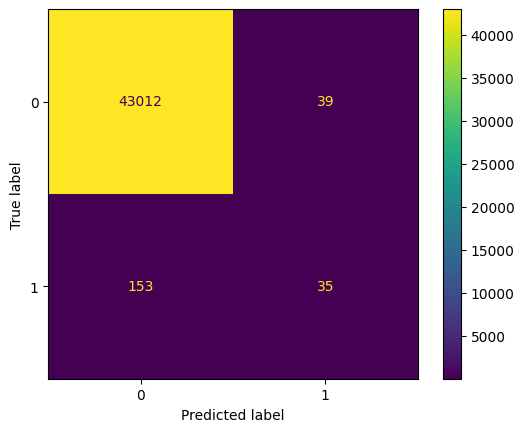

In [126]:
y_pred = gbm.predict(X_test)
y_pred_binary = np.round(y_pred)

accuracy = accuracy_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)
auc = roc_auc_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred_binary)

print('Accuracy:', accuracy)
print('Recall:', recall)
print('Precision:', precision)
print('F1 Score:', f1)
print('AUC:', auc)

ConfusionMatrixDisplay(confusion).plot()

In [129]:
from sklearn.metrics import average_precision_score, auc

precision2, recall2, threshold = precision_recall_curve(y_test, y_pred_binary)
prauc = auc(precision2, recall2)
print("PRAUC: ", prauc)

PRAUC:  0.3269929023354565


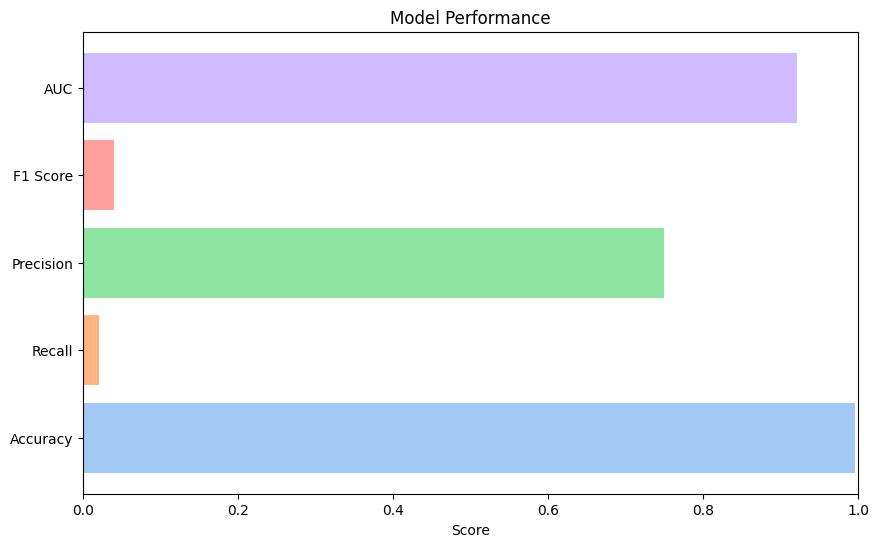

In [175]:
metrics = ['Accuracy', 'Recall', 'Precision', 'F1 Score', 'AUC']
values = [accuracy, recall, precision, f1, auc]
colors = sns.color_palette('pastel', len(metrics))

plt.figure(figsize=(10, 6))
plt.barh(metrics, values, color=colors)
plt.xlabel('Score')
plt.title('Model Performance')
plt.xlim(0, 1)
plt.show()

In [127]:
# Get feature importances
feature_importance = gbm.feature_importance()

# Map feature importances to feature names (if available)
feature_names = X_train.columns  # Replace with the actual feature names
importance_dict = dict(zip(feature_names, feature_importance))

# Sort the feature importances by importance value
sorted_importance = {k: v for k, v in sorted(importance_dict.items(), key=lambda item: item[1], reverse=True)}

# Print or analyze the sorted feature importances
print(sorted_importance)


{'sizelevel': 2813, 'sector_industry': 2460, 'equity_ratio': 2383, 'net_working_capital': 2314, 'asset_turnover': 2192, 'debt_ratio': 2176, 'STInt': 2171, 'inventory_turnover': 2108, 'ni2talevel': 2060, 'gross_margin_ratio': 2022, 'cashflow_to_debt_ratio': 1927, 'm2b': 1923, 'dtdlevel': 1871, 'interest_coverage_ratio': 1857, 'liqnonfinlevel': 1844, 'debt_to_equity_ratio': 1759, 'debt_service_coverage_ratio': 1754, 'day_sales_outstanding': 1748, 'days_in_inventory': 1731, 'receivables_turnover': 1726, 'quick_ratio': 1697, 'cash_ratio': 1641, 'sigma': 1588, 'price_to_earnings': 1577, 'DTDmedianNonFin': 1538, 'current_ratio': 1492, 'working_capital_turnover': 1447, 'ebitda_margin': 1295, 'return_on_assets': 1231, 'operating_profit_margin': 1153, 'dtdtrend': 1057, 'net_profit_margin': 1007, 'StkIndx': 978, 'liqnonfintrend': 958, 'sizetrend': 908, 'ni2tatrend': 757, 'liqfinlevel': 602, 'DTDmedianFin': 365, 'retention_ratio': 289, 'lqfintrend': 266, 'dividend_payout_ratio': 227, 'inventory_t

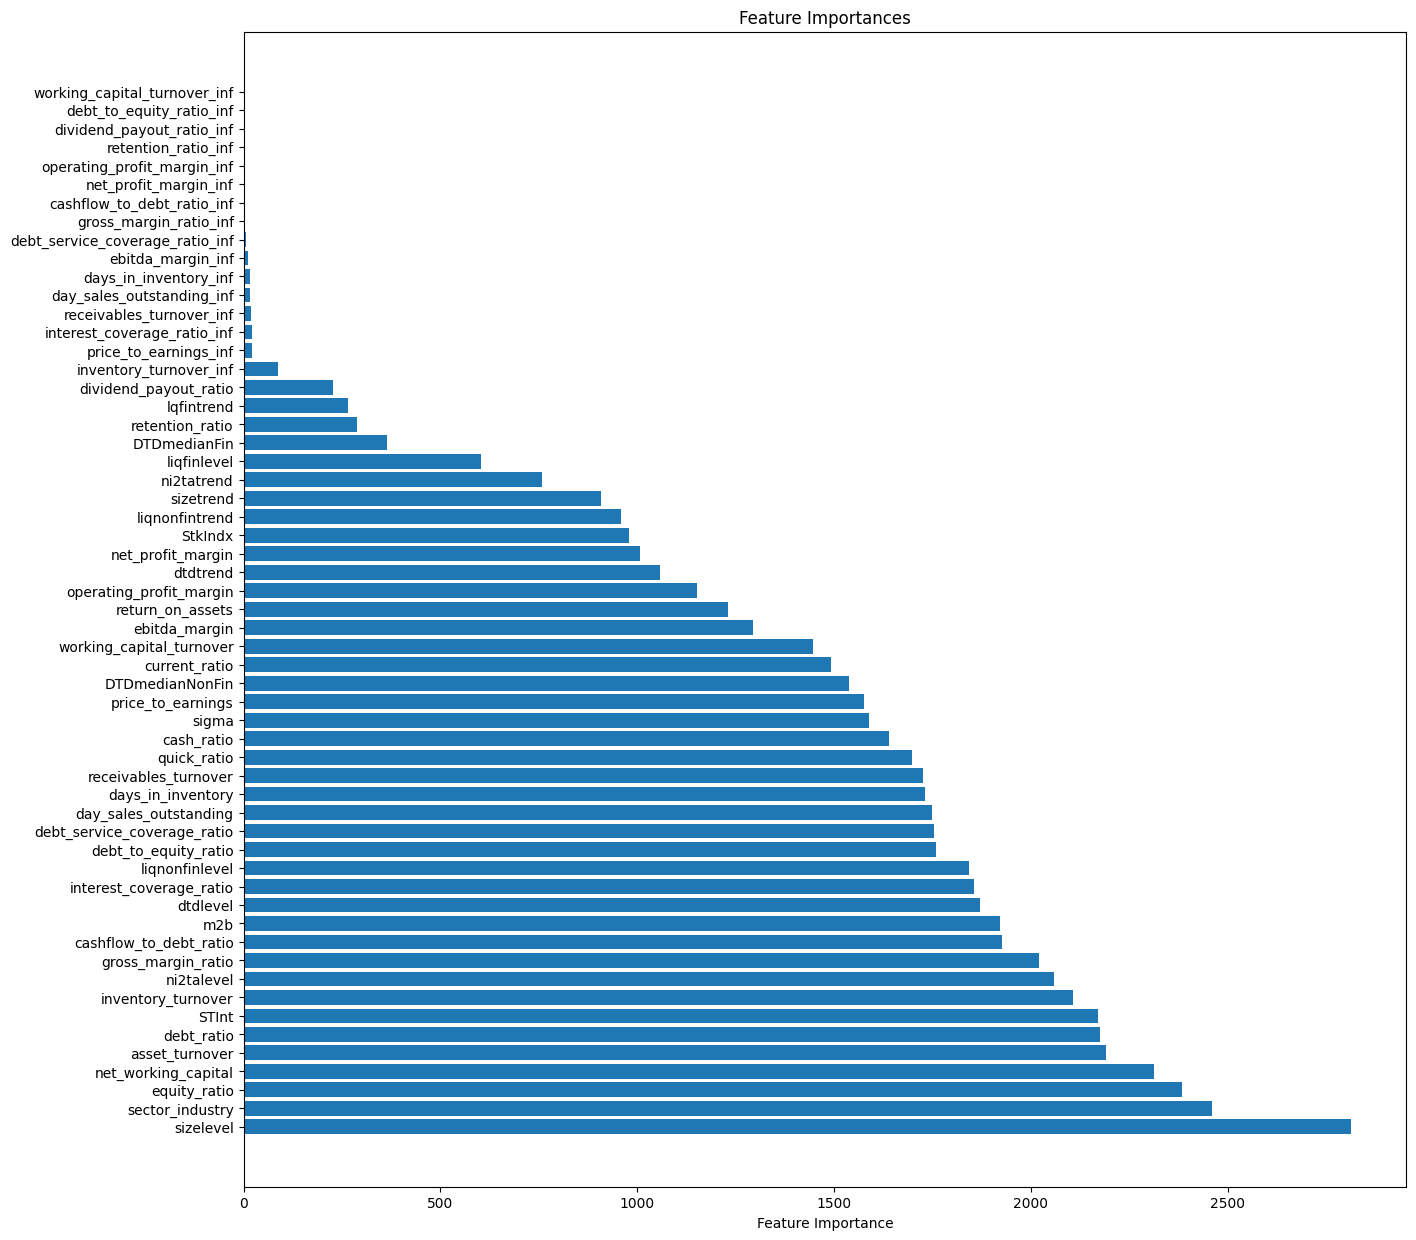

In [128]:
plt.figure(figsize=(15, 15))
plt.barh(range(len(sorted_importance)), sorted_importance.values(), align='center')
plt.yticks(range(len(sorted_importance)), sorted_importance.keys())
plt.xlabel('Feature Importance')
plt.title('Feature Importances')
plt.show()

<font size="6">Testing by optimising recall instead</font>

In [180]:
# WARNING: 2 changes to change evaluation metric

optimisation_metric = "recall" #"accuracy" "recall" "precision" "f1" "auc"
def objective(trial):
    param = {
        'num_leaves': trial.suggest_int('num_leaves', 2, 256),
        'objective': 'binary',
        'metric': 'precision', #"accuracy" "recall" "precision" "f1" "auc"
        'boosting_type': 'gbdt',
        'lambda_l1': trial.suggest_float('lambda_l1', 1e-8, 10.0, log=True),
        'lambda_l2': trial.suggest_float('lambda_l2', 1e-8, 10.0, log=True),
        #'feature_fraction': trial.suggest_float('feature_fraction', 0.4, 1.0), --> 1.0 is what we want
        'bagging_fraction': trial.suggest_float('bagging_fraction', 0.4, 1.0),
        'bagging_freq': trial.suggest_int('bagging_freq', 1, 7),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
        'scale_pos_weight': 100
    }
    
    # full data
    gbm = lgb.train(param, lgb.Dataset(X_train, y_train), num_boost_round=500)
    
    preds = gbm.predict(X_val)
    y_pred_binary = np.round(preds)
    
    auc = roc_auc_score(y_val, preds)
    accuracy = accuracy_score(y_val, y_pred_binary)
    recall = recall_score(y_val, y_pred_binary)
    precision = precision_score(y_val, y_pred_binary)
    f1 = f1_score(y_val, y_pred_binary)
    #choose the metric you want to optimized

    if optimisation_metric == "auc":
        return auc
    elif optimisation_metric == "recall":
        return recall
    elif optimisation_metric == "precision":
        return precision
    elif optimisation_metric == "f1":
        return f1
    else:
        return auc

'''
    match optimisation_metric:
        case "auc":
            return auc
        case "recall":
            return recall
        case "precision":
            return precision
        case "f1":
            return f1
        case _:
            return auc
    return auc
'''

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

best_params = study.best_params


[I 2023-10-31 13:22:21,913] A new study created in memory with name: no-name-1b872121-1eab-4cab-b65c-2c73f4aadf3a


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1153, number of negative: 536879
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.043626 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11804
[LightGBM] [Info] Number of data points in the train set: 538032, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002143 -> initscore=-6.143406
[LightGBM] [Info] Start training from score -6.143406
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

[I 2023-10-31 13:22:38,974] Trial 0 finished with value: 0.6879432624113475 and parameters: {'num_leaves': 31, 'lambda_l1': 3.210102432414589e-05, 'lambda_l2': 2.1885764747258705e-06, 'bagging_fraction': 0.857531621467011, 'bagging_freq': 5, 'min_child_samples': 45}. Best is trial 0 with value: 0.6879432624113475.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1153, number of negative: 536879
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.031365 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11804
[LightGBM] [Info] Number of data points in the train set: 538032, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002143 -> initscore=-6.143406
[LightGBM] [Info] Start training from score -6.143406
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

[I 2023-10-31 13:22:54,692] Trial 1 finished with value: 0.9574468085106383 and parameters: {'num_leaves': 238, 'lambda_l1': 0.08201390920814768, 'lambda_l2': 0.021564280452078654, 'bagging_fraction': 0.8429141698356888, 'bagging_freq': 2, 'min_child_samples': 89}. Best is trial 1 with value: 0.9574468085106383.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1153, number of negative: 536879
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.033244 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11806
[LightGBM] [Info] Number of data points in the train set: 538032, number of used features: 62
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002143 -> initscore=-6.143406
[LightGBM] [Info] Start training from score -6.143406
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

[I 2023-10-31 13:23:02,274] Trial 2 finished with value: 0.46808510638297873 and parameters: {'num_leaves': 107, 'lambda_l1': 6.788745687552746, 'lambda_l2': 0.011383731508904604, 'bagging_fraction': 0.489083755301862, 'bagging_freq': 5, 'min_child_samples': 10}. Best is trial 1 with value: 0.9574468085106383.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1153, number of negative: 536879
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.031928 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11804
[LightGBM] [Info] Number of data points in the train set: 538032, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002143 -> initscore=-6.143406
[LightGBM] [Info] Start training from score -6.143406
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

[I 2023-10-31 13:23:12,424] Trial 3 finished with value: 0.7092198581560284 and parameters: {'num_leaves': 240, 'lambda_l1': 0.0009580107098300721, 'lambda_l2': 5.990094869188003e-05, 'bagging_fraction': 0.6279698470498668, 'bagging_freq': 5, 'min_child_samples': 56}. Best is trial 1 with value: 0.9574468085106383.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1153, number of negative: 536879
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.030986 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11804
[LightGBM] [Info] Number of data points in the train set: 538032, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002143 -> initscore=-6.143406
[LightGBM] [Info] Start training from score -6.143406
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

[I 2023-10-31 13:23:23,665] Trial 4 finished with value: 0.49645390070921985 and parameters: {'num_leaves': 109, 'lambda_l1': 7.181511764446364e-06, 'lambda_l2': 1.460654197728563e-07, 'bagging_fraction': 0.7869872853685596, 'bagging_freq': 3, 'min_child_samples': 31}. Best is trial 1 with value: 0.9574468085106383.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1153, number of negative: 536879
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.029441 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11804
[LightGBM] [Info] Number of data points in the train set: 538032, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002143 -> initscore=-6.143406
[LightGBM] [Info] Start training from score -6.143406
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

[I 2023-10-31 13:24:20,240] Trial 5 finished with value: 0.14184397163120568 and parameters: {'num_leaves': 226, 'lambda_l1': 0.12837870266596682, 'lambda_l2': 6.54871321370718, 'bagging_fraction': 0.5897923490747881, 'bagging_freq': 5, 'min_child_samples': 57}. Best is trial 1 with value: 0.9574468085106383.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1153, number of negative: 536879
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.033417 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11804
[LightGBM] [Info] Number of data points in the train set: 538032, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002143 -> initscore=-6.143406
[LightGBM] [Info] Start training from score -6.143406
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

[I 2023-10-31 13:24:28,795] Trial 6 finished with value: 0.574468085106383 and parameters: {'num_leaves': 255, 'lambda_l1': 3.10842523714254e-08, 'lambda_l2': 4.070249676527365e-05, 'bagging_fraction': 0.7179931654314196, 'bagging_freq': 1, 'min_child_samples': 24}. Best is trial 1 with value: 0.9574468085106383.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped t

[I 2023-10-31 13:24:44,358] Trial 7 finished with value: 0.36879432624113473 and parameters: {'num_leaves': 18, 'lambda_l1': 0.028352828914345846, 'lambda_l2': 9.130123932664155, 'bagging_fraction': 0.6211897105705897, 'bagging_freq': 2, 'min_child_samples': 84}. Best is trial 1 with value: 0.9574468085106383.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1153, number of negative: 536879
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.027340 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11804
[LightGBM] [Info] Number of data points in the train set: 538032, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002143 -> initscore=-6.143406
[LightGBM] [Info] Start training from score -6.143406
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

[I 2023-10-31 13:24:50,416] Trial 8 finished with value: 0.5886524822695035 and parameters: {'num_leaves': 243, 'lambda_l1': 0.3608627026925753, 'lambda_l2': 0.00014591616249071278, 'bagging_fraction': 0.4871515117644654, 'bagging_freq': 6, 'min_child_samples': 60}. Best is trial 1 with value: 0.9574468085106383.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1153, number of negative: 536879
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.026011 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11804
[LightGBM] [Info] Number of data points in the train set: 538032, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002143 -> initscore=-6.143406
[LightGBM] [Info] Start training from score -6.143406
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

[I 2023-10-31 13:24:59,164] Trial 9 finished with value: 0.028368794326241134 and parameters: {'num_leaves': 130, 'lambda_l1': 2.0346928239937902e-08, 'lambda_l2': 1.336041372421691e-08, 'bagging_fraction': 0.9825706845506822, 'bagging_freq': 3, 'min_child_samples': 82}. Best is trial 1 with value: 0.9574468085106383.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1153, number of negative: 536879
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.027591 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11804
[LightGBM] [Info] Number of data points in the train set: 538032, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002143 -> initscore=-6.143406
[LightGBM] [Info] Start training from score -6.143406
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

[I 2023-10-31 13:25:09,811] Trial 10 finished with value: 0.6382978723404256 and parameters: {'num_leaves': 178, 'lambda_l1': 0.0017621853420777612, 'lambda_l2': 0.01466679394697163, 'bagging_fraction': 0.9198802301466483, 'bagging_freq': 1, 'min_child_samples': 99}. Best is trial 1 with value: 0.9574468085106383.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1153, number of negative: 536879
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.031863 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11804
[LightGBM] [Info] Number of data points in the train set: 538032, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002143 -> initscore=-6.143406
[LightGBM] [Info] Start training from score -6.143406

[I 2023-10-31 13:25:17,754] Trial 11 finished with value: 0.3971631205673759 and parameters: {'num_leaves': 205, 'lambda_l1': 0.0016675818580161894, 'lambda_l2': 0.005970545825159096, 'bagging_fraction': 0.7837998583994792, 'bagging_freq': 7, 'min_child_samples': 73}. Best is trial 1 with value: 0.9574468085106383.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1153, number of negative: 536879
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.026810 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11804
[LightGBM] [Info] Number of data points in the train set: 538032, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002143 -> initscore=-6.143406
[LightGBM] [Info] Start training from score -6.143406
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

[I 2023-10-31 13:25:24,016] Trial 12 finished with value: 0.4397163120567376 and parameters: {'num_leaves': 178, 'lambda_l1': 0.009092814101627713, 'lambda_l2': 6.795558499880399e-06, 'bagging_fraction': 0.6373350686173942, 'bagging_freq': 3, 'min_child_samples': 100}. Best is trial 1 with value: 0.9574468085106383.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped t

[I 2023-10-31 13:25:32,190] Trial 13 finished with value: 0.6382978723404256 and parameters: {'num_leaves': 186, 'lambda_l1': 9.706649390868113e-05, 'lambda_l2': 0.0010443271698853938, 'bagging_fraction': 0.7598979841398243, 'bagging_freq': 4, 'min_child_samples': 70}. Best is trial 1 with value: 0.9574468085106383.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1153, number of negative: 536879
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.027092 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11804
[LightGBM] [Info] Number of data points in the train set: 538032, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002143 -> initscore=-6.143406
[LightGBM] [Info] Start training from score -6.143406
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

[I 2023-10-31 13:26:12,022] Trial 14 finished with value: 0.40425531914893614 and parameters: {'num_leaves': 151, 'lambda_l1': 1.166292892963489, 'lambda_l2': 0.1485198659982388, 'bagging_fraction': 0.4180695176631811, 'bagging_freq': 4, 'min_child_samples': 41}. Best is trial 1 with value: 0.9574468085106383.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1153, number of negative: 536879
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.028823 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11804
[LightGBM] [Info] Number of data points in the train set: 538032, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002143 -> initscore=-6.143406
[LightGBM] [Info] Start training from score -6.143406
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

[I 2023-10-31 13:26:24,534] Trial 15 finished with value: 0.5390070921985816 and parameters: {'num_leaves': 64, 'lambda_l1': 0.025790542365584028, 'lambda_l2': 0.00033372252294838804, 'bagging_fraction': 0.870336014897197, 'bagging_freq': 2, 'min_child_samples': 87}. Best is trial 1 with value: 0.9574468085106383.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1153, number of negative: 536879
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.050320 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 11804
[LightGBM] [Info] Number of data points in the train set: 538032, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002143 -> initscore=-6.143406
[LightGBM] [Info] Start training from score -6.143406
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with po

[I 2023-10-31 13:26:35,810] Trial 16 finished with value: 0.1347517730496454 and parameters: {'num_leaves': 217, 'lambda_l1': 0.0006355711360389603, 'lambda_l2': 3.035291093065431e-05, 'bagging_fraction': 0.6836816050903962, 'bagging_freq': 7, 'min_child_samples': 66}. Best is trial 1 with value: 0.9574468085106383.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1153, number of negative: 536879
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.029543 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11804
[LightGBM] [Info] Number of data points in the train set: 538032, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002143 -> initscore=-6.143406
[LightGBM] [Info] Start training from score -6.143406
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

[I 2023-10-31 13:27:44,269] Trial 17 finished with value: 0.23404255319148937 and parameters: {'num_leaves': 247, 'lambda_l1': 6.670453277459876, 'lambda_l2': 0.1326223522093258, 'bagging_fraction': 0.7030636059249703, 'bagging_freq': 6, 'min_child_samples': 47}. Best is trial 1 with value: 0.9574468085106383.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1153, number of negative: 536879
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.026919 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11806
[LightGBM] [Info] Number of data points in the train set: 538032, number of used features: 62
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002143 -> initscore=-6.143406
[LightGBM] [Info] Start training from score -6.143406
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

[I 2023-10-31 13:27:58,449] Trial 18 finished with value: 0.18439716312056736 and parameters: {'num_leaves': 149, 'lambda_l1': 0.12656332342794227, 'lambda_l2': 0.0009991701585216517, 'bagging_fraction': 0.8449411965622412, 'bagging_freq': 2, 'min_child_samples': 5}. Best is trial 1 with value: 0.9574468085106383.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1153, number of negative: 536879
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.025356 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11804
[LightGBM] [Info] Number of data points in the train set: 538032, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002143 -> initscore=-6.143406
[LightGBM] [Info] Start training from score -6.143406
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

[I 2023-10-31 13:28:06,063] Trial 19 finished with value: 0.5460992907801419 and parameters: {'num_leaves': 206, 'lambda_l1': 0.0053559497690286095, 'lambda_l2': 1.4471979284886844e-06, 'bagging_fraction': 0.5803660325430823, 'bagging_freq': 6, 'min_child_samples': 29}. Best is trial 1 with value: 0.9574468085106383.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1153, number of negative: 536879
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.019199 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11804
[LightGBM] [Info] Number of data points in the train set: 538032, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002143 -> initscore=-6.143406
[LightGBM] [Info] Start training from score -6.143406
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

[I 2023-10-31 13:28:16,686] Trial 20 finished with value: 0.475177304964539 and parameters: {'num_leaves': 74, 'lambda_l1': 0.00042292442629586306, 'lambda_l2': 3.6269913652654965e-05, 'bagging_fraction': 0.9720399254820058, 'bagging_freq': 4, 'min_child_samples': 90}. Best is trial 1 with value: 0.9574468085106383.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1153, number of negative: 536879
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.043010 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 11804
[LightGBM] [Info] Number of data points in the train set: 538032, number of used features: 61
[LightGBM] [Info] 

[I 2023-10-31 13:28:33,745] Trial 21 finished with value: 0.5460992907801419 and parameters: {'num_leaves': 21, 'lambda_l1': 3.962682482706169e-05, 'lambda_l2': 8.953278565372509e-07, 'bagging_fraction': 0.8410082304495411, 'bagging_freq': 5, 'min_child_samples': 44}. Best is trial 1 with value: 0.9574468085106383.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1153, number of negative: 536879
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.028896 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11804
[LightGBM] [Info] Number of data points in the train set: 538032, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002143 -> initscore=-6.143406
[LightGBM] [Info] Start training from score -6.143406
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

[I 2023-10-31 13:28:45,116] Trial 22 finished with value: 0.574468085106383 and parameters: {'num_leaves': 52, 'lambda_l1': 1.0161204394460627e-05, 'lambda_l2': 3.8310662993405025e-06, 'bagging_fraction': 0.8853945584090211, 'bagging_freq': 5, 'min_child_samples': 51}. Best is trial 1 with value: 0.9574468085106383.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1153, number of negative: 536879
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.031079 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11804
[LightGBM] [Info] Number of data points in the train set: 538032, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002143 -> initscore=-6.143406
[LightGBM] [Info] Start training from score -6.143406


[I 2023-10-31 13:28:53,481] Trial 23 finished with value: 0.5957446808510638 and parameters: {'num_leaves': 5, 'lambda_l1': 0.00012089198487361172, 'lambda_l2': 3.7721267724833433e-07, 'bagging_fraction': 0.8123519402832319, 'bagging_freq': 6, 'min_child_samples': 36}. Best is trial 1 with value: 0.9574468085106383.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1153, number of negative: 536879
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.027352 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11804
[LightGBM] [Info] Number of data points in the train set: 538032, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002143 -> initscore=-6.143406
[LightGBM] [Info] Start training from score -6.143406
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

[I 2023-10-31 13:29:01,966] Trial 24 finished with value: 0.6595744680851063 and parameters: {'num_leaves': 95, 'lambda_l1': 4.412335150819707e-06, 'lambda_l2': 2.253820434311045e-05, 'bagging_fraction': 0.7439283083161354, 'bagging_freq': 5, 'min_child_samples': 20}. Best is trial 1 with value: 0.9574468085106383.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped t

[I 2023-10-31 13:29:11,856] Trial 25 finished with value: 0.03546099290780142 and parameters: {'num_leaves': 233, 'lambda_l1': 0.004198775766859054, 'lambda_l2': 8.072338725396805e-06, 'bagging_fraction': 0.9329857786116145, 'bagging_freq': 4, 'min_child_samples': 78}. Best is trial 1 with value: 0.9574468085106383.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1153, number of negative: 536879
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.026369 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11804
[LightGBM] [Info] Number of data points in the train set: 538032, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002143 -> initscore=-6.143406
[LightGBM] [Info] Start training from score -6.143406
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

[I 2023-10-31 13:29:25,242] Trial 26 finished with value: 0.9290780141843972 and parameters: {'num_leaves': 40, 'lambda_l1': 0.0003004993257856038, 'lambda_l2': 0.00016821751829674145, 'bagging_fraction': 0.9198008328339904, 'bagging_freq': 3, 'min_child_samples': 63}. Best is trial 1 with value: 0.9574468085106383.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1153, number of negative: 536879
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.029471 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11804
[LightGBM] [Info] Number of data points in the train set: 538032, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002143 -> initscore=-6.143406
[LightGBM] [Info] Start training from score -6.143406
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

[I 2023-10-31 13:29:35,903] Trial 27 finished with value: 0.9290780141843972 and parameters: {'num_leaves': 157, 'lambda_l1': 0.0008754023489313876, 'lambda_l2': 0.000279454756433463, 'bagging_fraction': 0.9447856445652867, 'bagging_freq': 3, 'min_child_samples': 61}. Best is trial 1 with value: 0.9574468085106383.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1153, number of negative: 536879
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020287 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11804
[LightGBM] [Info] Number of data points in the train set: 538032, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002143 -> initscore=-6.143406
[LightGBM] [Info] Start training from score -6.143406

[I 2023-10-31 13:29:44,305] Trial 28 finished with value: 0.524822695035461 and parameters: {'num_leaves': 144, 'lambda_l1': 0.020891184086143842, 'lambda_l2': 0.00024085452754809525, 'bagging_fraction': 0.9251424261112129, 'bagging_freq': 3, 'min_child_samples': 65}. Best is trial 1 with value: 0.9574468085106383.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1153, number of negative: 536879
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.026328 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11804
[LightGBM] [Info] Number of data points in the train set: 538032, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002143 -> initscore=-6.143406
[LightGBM] [Info] Start training from score -6.143406
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

[I 2023-10-31 13:29:57,894] Trial 29 finished with value: 0.5319148936170213 and parameters: {'num_leaves': 35, 'lambda_l1': 0.00024234996614828168, 'lambda_l2': 0.001432125769538621, 'bagging_fraction': 0.8946191383429994, 'bagging_freq': 2, 'min_child_samples': 94}. Best is trial 1 with value: 0.9574468085106383.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1153, number of negative: 536879
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.028622 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11804
[LightGBM] [Info] Number of data points in the train set: 538032, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002143 -> initscore=-6.143406
[LightGBM] [Info] Start training from score -6.143406
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

[I 2023-10-31 13:30:06,918] Trial 30 finished with value: 0.48936170212765956 and parameters: {'num_leaves': 91, 'lambda_l1': 0.005405056565349528, 'lambda_l2': 0.00020796344287724944, 'bagging_fraction': 0.9899212780436687, 'bagging_freq': 1, 'min_child_samples': 75}. Best is trial 1 with value: 0.9574468085106383.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1153, number of negative: 536879
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.039553 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11804
[LightGBM] [Info] Number of data points in the train set: 538032, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002143 -> initscore=-6.143406
[LightGBM] [Info] Start training from score -6.143406
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

[I 2023-10-31 13:30:18,869] Trial 31 finished with value: 0.41843971631205673 and parameters: {'num_leaves': 194, 'lambda_l1': 0.0011170935748897408, 'lambda_l2': 9.772978686072623e-05, 'bagging_fraction': 0.9490819800737381, 'bagging_freq': 3, 'min_child_samples': 58}. Best is trial 1 with value: 0.9574468085106383.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1153, number of negative: 536879
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.029300 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11804
[LightGBM] [Info] Number of data points in the train set: 538032, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002143 -> initscore=-6.143406
[LightGBM] [Info] Start training from score -6.143406
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

[I 2023-10-31 13:30:31,184] Trial 32 finished with value: 0.9574468085106383 and parameters: {'num_leaves': 166, 'lambda_l1': 0.0004496560163870566, 'lambda_l2': 1.1412622732956735e-05, 'bagging_fraction': 0.9983964967112449, 'bagging_freq': 2, 'min_child_samples': 56}. Best is trial 1 with value: 0.9574468085106383.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1153, number of negative: 536879
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.027040 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11804
[LightGBM] [Info] Number of data points in the train set: 538032, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002143 -> initscore=-6.143406
[LightGBM] [Info] Start training from score -6.143406
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furt

[I 2023-10-31 13:30:43,990] Trial 33 finished with value: 0.5390070921985816 and parameters: {'num_leaves': 156, 'lambda_l1': 0.00027200825568736247, 'lambda_l2': 9.328386783878239e-06, 'bagging_fraction': 0.9957797020048571, 'bagging_freq': 2, 'min_child_samples': 65}. Best is trial 1 with value: 0.9574468085106383.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1153, number of negative: 536879
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.029000 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11804
[LightGBM] [Info] Number of data points in the train set: 538032, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002143 -> initscore=-6.143406
[LightGBM] [Info] Start training from score -6.143406
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

[I 2023-10-31 13:30:53,299] Trial 34 finished with value: 0.6382978723404256 and parameters: {'num_leaves': 125, 'lambda_l1': 3.393979908348245e-05, 'lambda_l2': 0.0004877479627701853, 'bagging_fraction': 0.9042549032821842, 'bagging_freq': 3, 'min_child_samples': 48}. Best is trial 1 with value: 0.9574468085106383.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1153, number of negative: 536879
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.028979 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11804
[LightGBM] [Info] Number of data points in the t

[I 2023-10-31 13:31:05,707] Trial 35 finished with value: 0.3617021276595745 and parameters: {'num_leaves': 165, 'lambda_l1': 0.0010567758160821448, 'lambda_l2': 9.317361990790453e-05, 'bagging_fraction': 0.9559858170019035, 'bagging_freq': 2, 'min_child_samples': 55}. Best is trial 1 with value: 0.9574468085106383.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1153, number of negative: 536879
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.026188 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11804
[LightGBM] [Info] Number of data points in the train set: 538032, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002143 -> initscore=-6.143406
[LightGBM] [Info] Start training from score -6.143406
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

[I 2023-10-31 13:31:16,011] Trial 36 finished with value: 0.19148936170212766 and parameters: {'num_leaves': 124, 'lambda_l1': 0.00011661701800120595, 'lambda_l2': 0.00412938503308175, 'bagging_fraction': 0.9506359430074445, 'bagging_freq': 1, 'min_child_samples': 62}. Best is trial 1 with value: 0.9574468085106383.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1153, number of negative: 536879
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.028738 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11804
[LightGBM] [Info] Number of data points in the train set: 538032, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002143 -> initscore=-6.143406
[LightGBM] [Info] Start training from score -6.143406
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

[I 2023-10-31 13:31:24,659] Trial 37 finished with value: 0.6312056737588653 and parameters: {'num_leaves': 109, 'lambda_l1': 0.11370147080130762, 'lambda_l2': 1.2484048504563677e-05, 'bagging_fraction': 0.8733019073098615, 'bagging_freq': 3, 'min_child_samples': 79}. Best is trial 1 with value: 0.9574468085106383.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1153, number of negative: 536879
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.024703 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11804
[LightGBM] [Info] Number of data points in the train set: 538032, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002143 -> initscore=-6.143406
[LightGBM] [Info] Start training from score -6.143406
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

[I 2023-10-31 13:31:37,592] Trial 38 finished with value: 0.524822695035461 and parameters: {'num_leaves': 172, 'lambda_l1': 0.002886170019647528, 'lambda_l2': 2.391929584974144e-06, 'bagging_fraction': 0.9968432357786726, 'bagging_freq': 2, 'min_child_samples': 70}. Best is trial 1 with value: 0.9574468085106383.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1153, number of negative: 536879
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.024175 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11804
[LightGBM] [Info] Number of data points in the train set: 538032, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002143 -> initscore=-6.143406
[LightGBM] [Info] Start training from score -6.143406
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

[I 2023-10-31 13:31:46,815] Trial 39 finished with value: 0.4397163120567376 and parameters: {'num_leaves': 219, 'lambda_l1': 0.0005011750845305377, 'lambda_l2': 3.661555226433219e-05, 'bagging_fraction': 0.9128622562399957, 'bagging_freq': 3, 'min_child_samples': 40}. Best is trial 1 with value: 0.9574468085106383.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1153, number of negative: 536879
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020595 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11804
[LightGBM] [Info] Number of data points in the t

[I 2023-10-31 13:31:56,621] Trial 40 finished with value: 0.5319148936170213 and parameters: {'num_leaves': 195, 'lambda_l1': 0.04867362710550692, 'lambda_l2': 8.343107517402374e-05, 'bagging_fraction': 0.9577196566373051, 'bagging_freq': 1, 'min_child_samples': 52}. Best is trial 1 with value: 0.9574468085106383.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1153, number of negative: 536879
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.023115 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11804
[LightGBM] [Info] Number of data points in the train set: 538032, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002143 -> initscore=-6.143406
[LightGBM] [Info] Start training from score -6.143406
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

[I 2023-10-31 13:32:06,181] Trial 41 finished with value: 0.04964539007092199 and parameters: {'num_leaves': 254, 'lambda_l1': 0.009368015376947378, 'lambda_l2': 6.591469995462966e-05, 'bagging_fraction': 0.8322976361957478, 'bagging_freq': 4, 'min_child_samples': 56}. Best is trial 1 with value: 0.9574468085106383.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped t

[I 2023-10-31 13:32:18,554] Trial 42 finished with value: 0.7092198581560284 and parameters: {'num_leaves': 232, 'lambda_l1': 0.0018153143485644442, 'lambda_l2': 0.0004954154351492194, 'bagging_fraction': 0.9333859478351063, 'bagging_freq': 2, 'min_child_samples': 61}. Best is trial 1 with value: 0.9574468085106383.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1153, number of negative: 536879
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.031102 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11804
[LightGBM] [Info] Number of data points in the train set: 538032, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002143 -> initscore=-6.143406
[LightGBM] [Info] Start training from score -6.143406
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

[I 2023-10-31 13:32:28,464] Trial 43 finished with value: 0.6170212765957447 and parameters: {'num_leaves': 209, 'lambda_l1': 0.010598497034811506, 'lambda_l2': 2.2630630404200245e-05, 'bagging_fraction': 0.8611044138872987, 'bagging_freq': 3, 'min_child_samples': 70}. Best is trial 1 with value: 0.9574468085106383.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1153, number of negative: 536879
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.027158 seconds.
You can set `force_row_wis

[I 2023-10-31 13:32:36,971] Trial 44 finished with value: 0.5957446808510638 and parameters: {'num_leaves': 161, 'lambda_l1': 0.0024029508826471802, 'lambda_l2': 0.00010432692573525769, 'bagging_fraction': 0.891067402478183, 'bagging_freq': 3, 'min_child_samples': 52}. Best is trial 1 with value: 0.9574468085106383.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1153, number of negative: 536879
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.025775 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11804
[LightGBM] [Info] Number of data points in the train set: 538032, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002143 -> initscore=-6.143406
[LightGBM] [Info] Start training from score -6.143406
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

[I 2023-10-31 13:32:45,770] Trial 45 finished with value: 0.3120567375886525 and parameters: {'num_leaves': 135, 'lambda_l1': 0.0006354045813968027, 'lambda_l2': 0.002480513445391261, 'bagging_fraction': 0.9657906133741622, 'bagging_freq': 2, 'min_child_samples': 35}. Best is trial 1 with value: 0.9574468085106383.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1153, number of negative: 536879
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.045230 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 11804
[LightGBM] [Info] Number of data points in the train set: 538032, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002143 -> initscore=-6.143406
[LightGBM] [Info] Start training from score -6.143406
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with po

[I 2023-10-31 13:32:58,024] Trial 46 finished with value: 0.6312056737588653 and parameters: {'num_leaves': 241, 'lambda_l1': 0.03940321980475298, 'lambda_l2': 0.01092244290521931, 'bagging_fraction': 0.8072913713422986, 'bagging_freq': 4, 'min_child_samples': 82}. Best is trial 1 with value: 0.9574468085106383.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1153, number of negative: 536879
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.046550 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 11804
[LightGBM] [Info] Number of data points in the train set: 538032, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002143 -> initscore=-6.143406
[LightGBM] [Info] Start training from score -6.143406
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with po

[I 2023-10-31 13:33:07,092] Trial 47 finished with value: 0.22695035460992907 and parameters: {'num_leaves': 194, 'lambda_l1': 0.32306025969446567, 'lambda_l2': 0.0005871784423469977, 'bagging_fraction': 0.916070640484853, 'bagging_freq': 3, 'min_child_samples': 61}. Best is trial 1 with value: 0.9574468085106383.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped t

[I 2023-10-31 13:33:16,776] Trial 48 finished with value: 0.7446808510638298 and parameters: {'num_leaves': 226, 'lambda_l1': 0.00016411832377724125, 'lambda_l2': 5.171458270234473e-06, 'bagging_fraction': 0.976717359381587, 'bagging_freq': 1, 'min_child_samples': 75}. Best is trial 1 with value: 0.9574468085106383.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1153, number of negative: 536879
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.025616 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11804
[LightGBM] [Info] Number of data points in the train set: 538032, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002143 -> initscore=-6.143406
[LightGBM] [Info] Start training from score -6.143406
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

[I 2023-10-31 13:33:25,846] Trial 49 finished with value: 0.10638297872340426 and parameters: {'num_leaves': 218, 'lambda_l1': 1.6482452129170345e-05, 'lambda_l2': 3.451329498295405e-06, 'bagging_fraction': 0.9995223466866182, 'bagging_freq': 1, 'min_child_samples': 90}. Best is trial 1 with value: 0.9574468085106383.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1153, number of negative: 536879
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.030179 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11804
[LightGBM] [Info] Number of data points in the train set: 538032, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002143 -> initscore=-6.143406
[LightGBM] [Info] Start training from score -6.143406
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

[I 2023-10-31 13:33:34,080] Trial 50 finished with value: 0.48936170212765956 and parameters: {'num_leaves': 173, 'lambda_l1': 7.785567585113289e-05, 'lambda_l2': 0.00018198124799561504, 'bagging_fraction': 0.9672434781803882, 'bagging_freq': 1, 'min_child_samples': 74}. Best is trial 1 with value: 0.9574468085106383.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1153, number of negative: 536879
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.027446 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11804
[LightGBM] [Info] Number of data points in the train set: 538032, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002143 -> initscore=-6.143406
[LightGBM] [Info] Start training from score -6.143406
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

[I 2023-10-31 13:33:42,018] Trial 51 finished with value: 0.02127659574468085 and parameters: {'num_leaves': 231, 'lambda_l1': 0.0002247597187529869, 'lambda_l2': 1.2480874197014293e-05, 'bagging_fraction': 0.9292078760447795, 'bagging_freq': 1, 'min_child_samples': 68}. Best is trial 1 with value: 0.9574468085106383.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1153, number of negative: 536879
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.028953 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11804
[LightGBM] [Info] Number of data points in the train set: 538032, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002143 -> initscore=-6.143406
[LightGBM] [Info] Start training from score -6.143406
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

[I 2023-10-31 13:33:53,553] Trial 52 finished with value: 0.28368794326241137 and parameters: {'num_leaves': 243, 'lambda_l1': 0.0010190873691154133, 'lambda_l2': 4.2112880551343584e-05, 'bagging_fraction': 0.9772426561999089, 'bagging_freq': 2, 'min_child_samples': 94}. Best is trial 1 with value: 0.9574468085106383.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1153, number of negative: 536879
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.027085 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11804
[LightGBM] [Info] Number of data points in the train set: 538032, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002143 -> initscore=-6.143406
[LightGBM] [Info] Start training from score -6.143406
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

[I 2023-10-31 13:34:04,573] Trial 53 finished with value: 0.5815602836879432 and parameters: {'num_leaves': 255, 'lambda_l1': 0.00042732610333966404, 'lambda_l2': 0.00023194664641291524, 'bagging_fraction': 0.87819996295978, 'bagging_freq': 2, 'min_child_samples': 84}. Best is trial 1 with value: 0.9574468085106383.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1153, number of negative: 536879
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.027398 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11804
[LightGBM] [Info] Number of data points in the train set: 538032, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002143 -> initscore=-6.143406
[LightGBM] [Info] Start training from score -6.143406
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

[I 2023-10-31 13:34:13,477] Trial 54 finished with value: 0.624113475177305 and parameters: {'num_leaves': 140, 'lambda_l1': 6.53460812647975e-05, 'lambda_l2': 5.044903861732183e-06, 'bagging_fraction': 0.9041722325333363, 'bagging_freq': 4, 'min_child_samples': 77}. Best is trial 1 with value: 0.9574468085106383.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1153, number of negative: 536879
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.028238 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11804
[LightGBM] [Info] Number of data points in the train set: 538032, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002143 -> initscore=-6.143406
[LightGBM] [Info] Start training from score -6.143406
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

[I 2023-10-31 13:34:22,869] Trial 55 finished with value: 0.11347517730496454 and parameters: {'num_leaves': 223, 'lambda_l1': 4.3533692465987635e-06, 'lambda_l2': 1.9229804532854598e-05, 'bagging_fraction': 0.9444000111644908, 'bagging_freq': 1, 'min_child_samples': 57}. Best is trial 1 with value: 0.9574468085106383.


[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[

[I 2023-10-31 13:34:35,486] Trial 56 finished with value: 0.6950354609929078 and parameters: {'num_leaves': 240, 'lambda_l1': 0.00016222951479091466, 'lambda_l2': 0.0014175409124077775, 'bagging_fraction': 0.9715795648435659, 'bagging_freq': 2, 'min_child_samples': 49}. Best is trial 1 with value: 0.9574468085106383.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1153, number of negative: 536879
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.023084 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11804
[LightGBM] [Info] Number of data points in the train set: 538032, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002143 -> initscore=-6.143406
[LightGBM] [Info] Start training from score -6.143406
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

[I 2023-10-31 13:34:46,443] Trial 57 finished with value: 0.45390070921985815 and parameters: {'num_leaves': 209, 'lambda_l1': 0.003047081612059978, 'lambda_l2': 5.248631835652039e-05, 'bagging_fraction': 0.858300127827482, 'bagging_freq': 5, 'min_child_samples': 64}. Best is trial 1 with value: 0.9574468085106383.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1153, number of negative: 536879
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.022638 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11804
[LightGBM] [Info] Number of data points in the train set: 538032, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002143 -> initscore=-6.143406
[LightGBM] [Info] Start training from score -6.143406
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

[I 2023-10-31 13:35:01,036] Trial 58 finished with value: 0.6170212765957447 and parameters: {'num_leaves': 186, 'lambda_l1': 0.00093561492268945, 'lambda_l2': 1.3002807696738281e-06, 'bagging_fraction': 0.9237004509625323, 'bagging_freq': 4, 'min_child_samples': 45}. Best is trial 1 with value: 0.9574468085106383.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1153, number of negative: 536879
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.024987 seconds.
You can set `force_row_wis

[I 2023-10-31 13:35:16,323] Trial 59 finished with value: 0.6666666666666666 and parameters: {'num_leaves': 48, 'lambda_l1': 0.0003590032340526515, 'lambda_l2': 6.927903088969589e-06, 'bagging_fraction': 0.9441866006397228, 'bagging_freq': 5, 'min_child_samples': 72}. Best is trial 1 with value: 0.9574468085106383.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1153, number of negative: 536879
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.029485 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11804
[LightGBM] [Info] Number of data points in the train set: 538032, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002143 -> initscore=-6.143406
[LightGBM] [Info] Start training from score -6.143406
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

[I 2023-10-31 13:35:24,349] Trial 60 finished with value: 0.8865248226950354 and parameters: {'num_leaves': 110, 'lambda_l1': 0.00017637323963813967, 'lambda_l2': 7.47562412049296e-07, 'bagging_fraction': 0.8950487051377071, 'bagging_freq': 6, 'min_child_samples': 59}. Best is trial 1 with value: 0.9574468085106383.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1153, number of negative: 536879
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.022104 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11804
[LightGBM] [Info] Number of data points in the train set: 538032, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002143 -> initscore=-6.143406
[LightGBM] [Info] Start training from score -6.143406
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

[I 2023-10-31 13:35:35,228] Trial 61 finished with value: 0.524822695035461 and parameters: {'num_leaves': 76, 'lambda_l1': 7.408292505275987e-05, 'lambda_l2': 6.513033861630223e-07, 'bagging_fraction': 0.892467679679964, 'bagging_freq': 6, 'min_child_samples': 59}. Best is trial 1 with value: 0.9574468085106383.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1153, number of negative: 536879
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.029003 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11804
[LightGBM] [Info] Number of data points in the train set: 538032, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002143 -> initscore=-6.143406
[LightGBM] [Info] Start training from score -6.143406

[I 2023-10-31 13:35:48,078] Trial 62 finished with value: 0.5957446808510638 and parameters: {'num_leaves': 98, 'lambda_l1': 0.00019308950373231692, 'lambda_l2': 7.976423755181061e-08, 'bagging_fraction': 0.9752063896534161, 'bagging_freq': 6, 'min_child_samples': 54}. Best is trial 1 with value: 0.9574468085106383.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1153, number of negative: 536879
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.026394 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11804
[LightGBM] [Info] Number of data points in the train set: 538032, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002143 -> initscore=-6.143406
[LightGBM] [Info] Start training from score -6.143406
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

[I 2023-10-31 13:35:57,491] Trial 63 finished with value: 0.3546099290780142 and parameters: {'num_leaves': 123, 'lambda_l1': 0.0013806334213719205, 'lambda_l2': 2.083801640665274e-06, 'bagging_fraction': 0.9118978211129569, 'bagging_freq': 6, 'min_child_samples': 67}. Best is trial 1 with value: 0.9574468085106383.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1153, number of negative: 536879
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.028964 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11804
[LightGBM] [Info] Number of data points in the train set: 538032, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002143 -> initscore=-6.143406
[LightGBM] [Info] Start training from score -6.143406
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

[I 2023-10-31 13:36:07,475] Trial 64 finished with value: 0.44680851063829785 and parameters: {'num_leaves': 201, 'lambda_l1': 1.9775848222315465e-05, 'lambda_l2': 3.920320487432708e-06, 'bagging_fraction': 0.8785042667692938, 'bagging_freq': 3, 'min_child_samples': 62}. Best is trial 1 with value: 0.9574468085106383.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1153, number of negative: 536879
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.029759 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11804
[LightGBM] [Info] Number of data points in the train set: 538032, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002143 -> initscore=-6.143406
[LightGBM] [Info] Start training from score -6.143406
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

[I 2023-10-31 13:36:19,058] Trial 65 finished with value: 0.5035460992907801 and parameters: {'num_leaves': 84, 'lambda_l1': 0.0004034753582381913, 'lambda_l2': 1.2059958982228579e-05, 'bagging_fraction': 0.9396498964651044, 'bagging_freq': 7, 'min_child_samples': 58}. Best is trial 1 with value: 0.9574468085106383.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1153, number of negative: 536879
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.023201 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11804
[LightGBM] [Info] Number of data points in the train set: 538032, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002143 -> initscore=-6.143406
[LightGBM] [Info] Start training from score -6.143406
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

[I 2023-10-31 13:36:29,581] Trial 66 finished with value: 0.8085106382978723 and parameters: {'num_leaves': 106, 'lambda_l1': 3.9290478983156996e-05, 'lambda_l2': 0.00013326228748905563, 'bagging_fraction': 0.9827757868579441, 'bagging_freq': 7, 'min_child_samples': 50}. Best is trial 1 with value: 0.9574468085106383.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1153, number of negative: 536879
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.027223 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11804
[LightGBM] [Info] Number of data points in the train set: 538032, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002143 -> initscore=-6.143406
[LightGBM] [Info] Start training from score -6.143406
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

[I 2023-10-31 13:36:40,957] Trial 67 finished with value: 0.425531914893617 and parameters: {'num_leaves': 108, 'lambda_l1': 4.399161270426108e-05, 'lambda_l2': 0.00014154546364093072, 'bagging_fraction': 0.9789271137467591, 'bagging_freq': 7, 'min_child_samples': 41}. Best is trial 1 with value: 0.9574468085106383.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1153, number of negative: 536879
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.026551 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11804
[LightGBM] [Info] Number of data points in the train set: 538032, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002143 -> initscore=-6.143406
[LightGBM] [Info] Start training from score -6.143406
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

[I 2023-10-31 13:36:50,725] Trial 68 finished with value: 0.5673758865248227 and parameters: {'num_leaves': 113, 'lambda_l1': 0.0001723147018305421, 'lambda_l2': 0.0006741589167161044, 'bagging_fraction': 0.9568058507296613, 'bagging_freq': 7, 'min_child_samples': 49}. Best is trial 1 with value: 0.9574468085106383.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1153, number of negative: 536879
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.028110 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11804
[LightGBM] [Info] Number of data points in the train set: 538032, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002143 -> initscore=-6.143406
[LightGBM] [Info] Start training from score -6.143406
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

[I 2023-10-31 13:37:06,698] Trial 69 finished with value: 0.6099290780141844 and parameters: {'num_leaves': 55, 'lambda_l1': 2.1124687650290232e-05, 'lambda_l2': 0.00024166402246809487, 'bagging_fraction': 0.9870657550474621, 'bagging_freq': 7, 'min_child_samples': 88}. Best is trial 1 with value: 0.9574468085106383.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1153, number of negative: 536879
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.028223 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11804
[LightGBM] [Info] Number of data points in the train set: 538032, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002143 -> initscore=-6.143406
[LightGBM] [Info] Start training from score -6.143406


[I 2023-10-31 13:37:15,310] Trial 70 finished with value: 0.7446808510638298 and parameters: {'num_leaves': 2, 'lambda_l1': 0.00010933904932127646, 'lambda_l2': 2.0614459388652443e-05, 'bagging_fraction': 0.9274182792229628, 'bagging_freq': 2, 'min_child_samples': 96}. Best is trial 1 with value: 0.9574468085106383.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1153, number of negative: 536879
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.023342 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11804
[LightGBM] [Info] Number of data points in the train set: 538032, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002143 -> initscore=-6.143406
[LightGBM] [Info] Start training from score -6.143406


[I 2023-10-31 13:37:24,809] Trial 71 finished with value: 0.5106382978723404 and parameters: {'num_leaves': 7, 'lambda_l1': 0.0001252128495871992, 'lambda_l2': 3.6372673406240685e-05, 'bagging_fraction': 0.9334496967556493, 'bagging_freq': 2, 'min_child_samples': 85}. Best is trial 1 with value: 0.9574468085106383.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1153, number of negative: 536879
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.027297 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11804
[LightGBM] [Info] Number of data points in the train set: 538032, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002143 -> initscore=-6.143406
[LightGBM] [Info] Start training from score -6.143406
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

[I 2023-10-31 13:37:43,148] Trial 72 finished with value: 0.5390070921985816 and parameters: {'num_leaves': 39, 'lambda_l1': 8.351344193087884e-06, 'lambda_l2': 1.6850031770861027e-05, 'bagging_fraction': 0.905093310229649, 'bagging_freq': 2, 'min_child_samples': 96}. Best is trial 1 with value: 0.9574468085106383.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1153, number of negative: 536879
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.028291 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11804
[LightGBM] [Info] Number of data points in the train set: 538032, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002143 -> initscore=-6.143406
[LightGBM] [Info] Start training from score -6.143406


[I 2023-10-31 13:38:01,007] Trial 73 finished with value: 0.5390070921985816 and parameters: {'num_leaves': 25, 'lambda_l1': 6.41294812250352e-05, 'lambda_l2': 6.125158707898097e-05, 'bagging_fraction': 0.9987665079542586, 'bagging_freq': 2, 'min_child_samples': 100}. Best is trial 1 with value: 0.9574468085106383.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1153, number of negative: 536879
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.028288 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11804
[LightGBM] [Info] Number of data points in the train set: 538032, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002143 -> initscore=-6.143406
[LightGBM] [Info] Start training from score -6.143406
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

[I 2023-10-31 13:38:11,396] Trial 74 finished with value: 0.3333333333333333 and parameters: {'num_leaves': 61, 'lambda_l1': 4.216045901107098e-05, 'lambda_l2': 0.0003578097177644508, 'bagging_fraction': 0.958692106010617, 'bagging_freq': 1, 'min_child_samples': 96}. Best is trial 1 with value: 0.9574468085106383.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1153, number of negative: 536879
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.082142 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 11804
[LightGBM] [Info] Number of data points in the train set: 538032, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002143 -> initscore=-6.143406
[LightGBM] [Info] Start training from score -6.143406


[I 2023-10-31 13:38:23,194] Trial 75 finished with value: 0.4326241134751773 and parameters: {'num_leaves': 8, 'lambda_l1': 0.00030703919377190775, 'lambda_l2': 6.665591241145131e-06, 'bagging_fraction': 0.9216674296054157, 'bagging_freq': 3, 'min_child_samples': 81}. Best is trial 1 with value: 0.9574468085106383.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1153, number of negative: 536879
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.025535 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11804
[LightGBM] [Info] Number of data points in the train set: 538032, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002143 -> initscore=-6.143406
[LightGBM] [Info] Start training from score -6.143406
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

[I 2023-10-31 13:38:34,829] Trial 76 finished with value: 0.6099290780141844 and parameters: {'num_leaves': 149, 'lambda_l1': 0.0005685902419833376, 'lambda_l2': 2.471542238322832e-05, 'bagging_fraction': 0.9815113849131464, 'bagging_freq': 2, 'min_child_samples': 91}. Best is trial 1 with value: 0.9574468085106383.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped t

[I 2023-10-31 13:38:47,813] Trial 77 finished with value: 0.574468085106383 and parameters: {'num_leaves': 17, 'lambda_l1': 0.0001678512503967419, 'lambda_l2': 0.000122884677765657, 'bagging_fraction': 0.9476165730872401, 'bagging_freq': 3, 'min_child_samples': 54}. Best is trial 1 with value: 0.9574468085106383.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1153, number of negative: 536879
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.022897 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11804
[LightGBM] [Info] Number of data points in the train set: 538032, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002143 -> initscore=-6.143406
[LightGBM] [Info] Start training from score -6.143406
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

[I 2023-10-31 13:38:58,936] Trial 78 finished with value: 1.0 and parameters: {'num_leaves': 44, 'lambda_l1': 0.0018411063561810707, 'lambda_l2': 0.0008625751627213852, 'bagging_fraction': 0.8946580326456662, 'bagging_freq': 1, 'min_child_samples': 68}. Best is trial 78 with value: 1.0.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1153, number of negative: 536879
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.025132 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11804
[LightGBM] [Info] Number of data points in the train set: 538032, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002143 -> initscore=-6.143406
[LightGBM] [Info] Start training from score -6.143406
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

[I 2023-10-31 13:39:08,306] Trial 79 finished with value: 0.0851063829787234 and parameters: {'num_leaves': 115, 'lambda_l1': 0.005177792967987993, 'lambda_l2': 0.0009628556865334715, 'bagging_fraction': 0.8529057560452178, 'bagging_freq': 1, 'min_child_samples': 64}. Best is trial 78 with value: 1.0.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1153, number of negative: 536879
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.028595 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11804
[LightGBM] [Info] Number of data points in the train set: 538032, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002143 -> initscore=-6.143406
[LightGBM] [Info] Start training from score -6.143406
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

[I 2023-10-31 13:39:17,174] Trial 80 finished with value: 0.2978723404255319 and parameters: {'num_leaves': 69, 'lambda_l1': 0.0019052922928260395, 'lambda_l2': 0.00034828725041757054, 'bagging_fraction': 0.8906022131006103, 'bagging_freq': 1, 'min_child_samples': 68}. Best is trial 78 with value: 1.0.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1153, number of negative: 536879
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.026574 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11804
[LightGBM] [Info] Number of data points in the train set: 538032, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002143 -> initscore=-6.143406
[LightGBM] [Info] Start training from score -6.143406
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

[I 2023-10-31 13:39:43,982] Trial 81 finished with value: 0.44680851063829785 and parameters: {'num_leaves': 46, 'lambda_l1': 0.000607011752173741, 'lambda_l2': 0.060769891647869105, 'bagging_fraction': 0.9016479285427914, 'bagging_freq': 1, 'min_child_samples': 72}. Best is trial 78 with value: 1.0.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1153, number of negative: 536879
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.029227 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11804
[LightGBM] [Info] Number of data points in the train set: 538032, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002143 -> initscore=-6.143406
[LightGBM] [Info] Start training from score -6.143406
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

[I 2023-10-31 13:39:55,823] Trial 82 finished with value: 0.8794326241134752 and parameters: {'num_leaves': 33, 'lambda_l1': 0.00010158610887800318, 'lambda_l2': 6.307886260198796e-05, 'bagging_fraction': 0.9334242757223131, 'bagging_freq': 1, 'min_child_samples': 63}. Best is trial 78 with value: 1.0.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1153, number of negative: 536879
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.029678 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11804
[LightGBM] [Info] Number of data points in the train set: 538032, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002143 -> initscore=-6.143406
[LightGBM] [Info] Start training from score -6.143406
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

[I 2023-10-31 13:40:14,156] Trial 83 finished with value: 0.3971631205673759 and parameters: {'num_leaves': 38, 'lambda_l1': 0.0009459500897031202, 'lambda_l2': 6.92565866814432e-05, 'bagging_fraction': 0.9591268898351553, 'bagging_freq': 1, 'min_child_samples': 63}. Best is trial 78 with value: 1.0.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1153, number of negative: 536879
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.026354 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11804
[LightGBM] [Info] Number of data points in the train set: 538032, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002143 -> initscore=-6.143406
[LightGBM] [Info] Start training from score -6.143406
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

[I 2023-10-31 13:40:28,567] Trial 84 finished with value: 0.6170212765957447 and parameters: {'num_leaves': 32, 'lambda_l1': 0.0003441235218293928, 'lambda_l2': 0.00014774949659104264, 'bagging_fraction': 0.8775536061946534, 'bagging_freq': 1, 'min_child_samples': 76}. Best is trial 78 with value: 1.0.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1153, number of negative: 536879
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.023372 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11804
[LightGBM] [Info] Number of data points in the train set: 538032, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002143 -> initscore=-6.143406
[LightGBM] [Info] Start training from score -6.143406
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

[I 2023-10-31 13:40:37,076] Trial 85 finished with value: 0.8085106382978723 and parameters: {'num_leaves': 101, 'lambda_l1': 0.0002479968114670859, 'lambda_l2': 0.0003511220690666371, 'bagging_fraction': 0.9416549371829794, 'bagging_freq': 1, 'min_child_samples': 51}. Best is trial 78 with value: 1.0.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1153, number of negative: 536879
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.027401 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11804
[LightGBM] [Info] Number of data points in the train set: 538032, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002143 -> initscore=-6.143406
[LightGBM] [Info] Start training from score -6.143406

[I 2023-10-31 13:40:44,845] Trial 86 finished with value: 1.0 and parameters: {'num_leaves': 87, 'lambda_l1': 0.0007547295374100124, 'lambda_l2': 0.0031107770572189573, 'bagging_fraction': 0.8667344648452666, 'bagging_freq': 1, 'min_child_samples': 44}. Best is trial 78 with value: 1.0.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1153, number of negative: 536879
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.029523 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11804
[LightGBM] [Info] Number of data points in the train set: 538032, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002143 -> initscore=-6.143406
[LightGBM] [Info] Start training from score -6.143406
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

[I 2023-10-31 13:40:58,324] Trial 87 finished with value: 0.5319148936170213 and parameters: {'num_leaves': 80, 'lambda_l1': 0.0028229260567741946, 'lambda_l2': 0.0022624728237284637, 'bagging_fraction': 0.831510895638304, 'bagging_freq': 4, 'min_child_samples': 36}. Best is trial 78 with value: 1.0.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1153, number of negative: 536879
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.026983 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11804
[LightGBM] [Info] Number of data points in the train set: 538032, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002143 -> initscore=-6.143406
[LightGBM] [Info] Start training from score -6.143406
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

[I 2023-10-31 13:41:07,564] Trial 88 finished with value: 0.09929078014184398 and parameters: {'num_leaves': 93, 'lambda_l1': 0.001580702458037921, 'lambda_l2': 0.0007671889352387298, 'bagging_fraction': 0.8663924198723146, 'bagging_freq': 1, 'min_child_samples': 47}. Best is trial 78 with value: 1.0.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1153, number of negative: 536879
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.024862 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11804
[LightGBM] [Info] Number of data points in the train set: 538032, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002143 -> initscore=-6.143406
[LightGBM] [Info] Start training from score -6.143406
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furt

[I 2023-10-31 13:41:18,308] Trial 89 finished with value: 0.40425531914893614 and parameters: {'num_leaves': 118, 'lambda_l1': 0.0009109480671929845, 'lambda_l2': 0.005175716012987121, 'bagging_fraction': 0.9085060897120935, 'bagging_freq': 7, 'min_child_samples': 43}. Best is trial 78 with value: 1.0.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1153, number of negative: 536879
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.027213 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11804
[LightGBM] [Info] Number of data points in the train set: 538032, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002143 -> initscore=-6.143406
[LightGBM] [Info] Start training from score -6.143406
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

[I 2023-10-31 13:41:35,709] Trial 90 finished with value: 0.5319148936170213 and parameters: {'num_leaves': 26, 'lambda_l1': 0.017162406690795697, 'lambda_l2': 0.0005105669952644361, 'bagging_fraction': 0.8668849982256571, 'bagging_freq': 2, 'min_child_samples': 56}. Best is trial 78 with value: 1.0.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1153, number of negative: 536879
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.025666 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11804
[LightGBM] [Info] Number of data points in the train set: 538032, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002143 -> initscore=-6.143406
[LightGBM] [Info] Start training from score -6.143406
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

[I 2023-10-31 13:41:46,582] Trial 91 finished with value: 0.7163120567375887 and parameters: {'num_leaves': 102, 'lambda_l1': 0.00022820823049711926, 'lambda_l2': 0.0002505448638858076, 'bagging_fraction': 0.9398375015440302, 'bagging_freq': 1, 'min_child_samples': 51}. Best is trial 78 with value: 1.0.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1153, number of negative: 536879
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.025420 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11804
[LightGBM] [Info] Number of data points in the train set: 538032, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002143 -> initscore=-6.143406
[LightGBM] [Info] Start training from score -6.143406
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

[I 2023-10-31 13:41:55,845] Trial 92 finished with value: 0.49645390070921985 and parameters: {'num_leaves': 86, 'lambda_l1': 0.0006741663786070386, 'lambda_l2': 0.0014123282976309574, 'bagging_fraction': 0.9181863588142386, 'bagging_freq': 1, 'min_child_samples': 60}. Best is trial 78 with value: 1.0.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1153, number of negative: 536879
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.089094 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 11804
[LightGBM] [Info] Number of data points in the train set: 538032, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002143 -> initscore=-6.143406
[LightGBM] [Info] Start training from score -6.143406
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with po

[I 2023-10-31 13:42:10,520] Trial 93 finished with value: 0.6170212765957447 and parameters: {'num_leaves': 133, 'lambda_l1': 0.00031314076141985463, 'lambda_l2': 0.00011876724147555777, 'bagging_fraction': 0.8908602785333972, 'bagging_freq': 1, 'min_child_samples': 39}. Best is trial 78 with value: 1.0.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1153, number of negative: 536879
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.024837 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11804
[LightGBM] [Info] Number of data points in the train set: 538032, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002143 -> initscore=-6.143406
[LightGBM] [Info] Start training from score -6.143406
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

[I 2023-10-31 13:42:23,613] Trial 94 finished with value: 0.7021276595744681 and parameters: {'num_leaves': 60, 'lambda_l1': 0.00010217747861402651, 'lambda_l2': 0.0004701643474723578, 'bagging_fraction': 0.9686351868376581, 'bagging_freq': 1, 'min_child_samples': 54}. Best is trial 78 with value: 1.0.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1153, number of negative: 536879
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.024225 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11804
[LightGBM] [Info] Number of data points in the train set: 538032, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002143 -> initscore=-6.143406
[LightGBM] [Info] Start training from score -6.143406
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

[I 2023-10-31 13:42:33,328] Trial 95 finished with value: 0.04964539007092199 and parameters: {'num_leaves': 140, 'lambda_l1': 0.0066304886713305046, 'lambda_l2': 0.000325297807242592, 'bagging_fraction': 0.9353264618296937, 'bagging_freq': 1, 'min_child_samples': 26}. Best is trial 78 with value: 1.0.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1153, number of negative: 536879
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.058968 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11804
[LightGBM] [Info] Number of data points in the train set: 538032, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002143 -> initscore=-6.143406
[LightGBM] [Info] Start training from score -6.143406
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

[I 2023-10-31 13:42:44,973] Trial 96 finished with value: 0.18439716312056736 and parameters: {'num_leaves': 102, 'lambda_l1': 0.0013777734865568607, 'lambda_l2': 0.0025565008395639047, 'bagging_fraction': 0.8499462038575529, 'bagging_freq': 3, 'min_child_samples': 46}. Best is trial 78 with value: 1.0.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1153, number of negative: 536879
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.022141 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11804
[LightGBM] [Info] Number of data points in the train set: 538032, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002143 -> initscore=-6.143406
[LightGBM] [Info] Start training from score -6.143406
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furt

[I 2023-10-31 13:43:05,176] Trial 97 finished with value: 0.5815602836879432 and parameters: {'num_leaves': 44, 'lambda_l1': 0.002355412142837679, 'lambda_l2': 0.00017714909969950335, 'bagging_fraction': 0.9866349080967244, 'bagging_freq': 2, 'min_child_samples': 51}. Best is trial 78 with value: 1.0.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1153, number of negative: 536879
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.025075 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11804
[LightGBM] [Info] Number of data points in the train set: 538032, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002143 -> initscore=-6.143406
[LightGBM] [Info] Start training from score -6.143406
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

[I 2023-10-31 13:43:14,071] Trial 98 finished with value: 0.3120567375886525 and parameters: {'num_leaves': 104, 'lambda_l1': 0.0004552874572285134, 'lambda_l2': 7.42681355131015e-05, 'bagging_fraction': 0.8991795228277882, 'bagging_freq': 1, 'min_child_samples': 59}. Best is trial 78 with value: 1.0.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1153, number of negative: 536879
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.029922 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11804
[LightGBM] [Info] Number of data points in the train set: 538032, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002143 -> initscore=-6.143406
[LightGBM] [Info] Start training from score -6.143406
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

[I 2023-10-31 13:43:25,686] Trial 99 finished with value: 0.22695035460992907 and parameters: {'num_leaves': 128, 'lambda_l1': 5.714974540431127e-05, 'lambda_l2': 0.0011169620921555666, 'bagging_fraction': 0.9513550565516561, 'bagging_freq': 6, 'min_child_samples': 66}. Best is trial 78 with value: 1.0.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements


In [185]:
# WARNING: 1 changement to chose evaluation metric, should allign with previous cell
best_params['objective'] = 'binary'
best_params['metric'] = 'recall' #"accuracy" "recall" "precision" "f1" "auc"
best_params['num_boost_round'] = 500
#best_params['scale_pos_weight'] = 10

gbm = lgb.train(best_params, lgb.Dataset(X_train, y_train))#, valid_sets=[lgb.Dataset(x_validation_pca, y_validation_pca)])

/usr/local/lib/python3.9/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1153, number of negative: 536879
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.026013 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11804
[LightGBM] [Info] Number of data points in the train set: 538032, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002143 -> initscore=-6.143406
[LightGBM] [Info] Start training from score -6.143406


Accuracy: 0.9916348290758359
Recall: 0.1292517006802721
Precision: 0.084070796460177
F1 Score: 0.10187667560321718
AUC: 0.7748474928818645


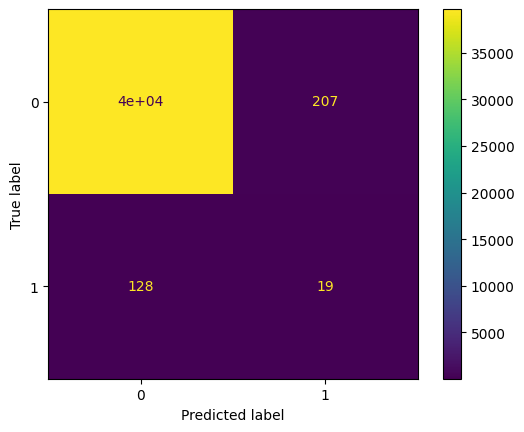

In [186]:
y_pred = gbm.predict(X_test)
y_pred_binary = np.round(y_pred)

accuracy = accuracy_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)
auc = roc_auc_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred_binary)

print('Accuracy:', accuracy)
print('Recall:', recall)
print('Precision:', precision)
print('F1 Score:', f1)
print('AUC:', auc)

ConfusionMatrixDisplay(confusion).plot()

In [187]:
# Get feature importances
feature_importance = gbm.feature_importance()

# Map feature importances to feature names (if available)
feature_names = X_train.columns  # Replace with the actual feature names
importance_dict = dict(zip(feature_names, feature_importance))

# Sort the feature importances by importance value
sorted_importance = {k: v for k, v in sorted(importance_dict.items(), key=lambda item: item[1], reverse=True)}

# Print or analyze the sorted feature importances
print(sorted_importance)


{'dtdlevel': 1460, 'sigma': 980, 'sizelevel': 881, 'Volume': 795, 'net_working_capital': 752, 'dtdtrend': 743, 'm2b': 710, 'price_to_earnings': 677, 'sizetrend': 649, 'StkIndx': 641, 'STInt': 626, 'working_capital_turnover': 622, 'ni2talevel': 576, 'liqnonfintrend': 541, 'equity_ratio': 538, 'ni2tatrend': 521, 'liqnonfinlevel': 475, 'interest_coverage_ratio': 473, 'DTDmedianNonFin': 472, 'cash_ratio': 470, 'debt_to_equity_ratio': 436, 'gross_margin_ratio': 431, 'asset_turnover': 402, 'debt_ratio': 389, 'Adj Close': 387, 'cashflow_to_debt_ratio': 385, 'quick_ratio': 384, 'current_ratio': 373, 'net_profit_margin': 335, 'return_on_assets': 334, 'sector_industry': 333, 'dividend_payout_ratio': 330, 'ebitda_margin': 323, 'debt_service_coverage_ratio': 307, 'retention_ratio': 281, 'operating_profit_margin': 280, 'lqfintrend': 266, 'days_in_inventory': 257, 'day_sales_outstanding': 254, 'Open': 247, 'receivables_turnover': 243, 'inventory_turnover': 211, 'liqfinlevel': 172, 'DTDmedianFin': 17

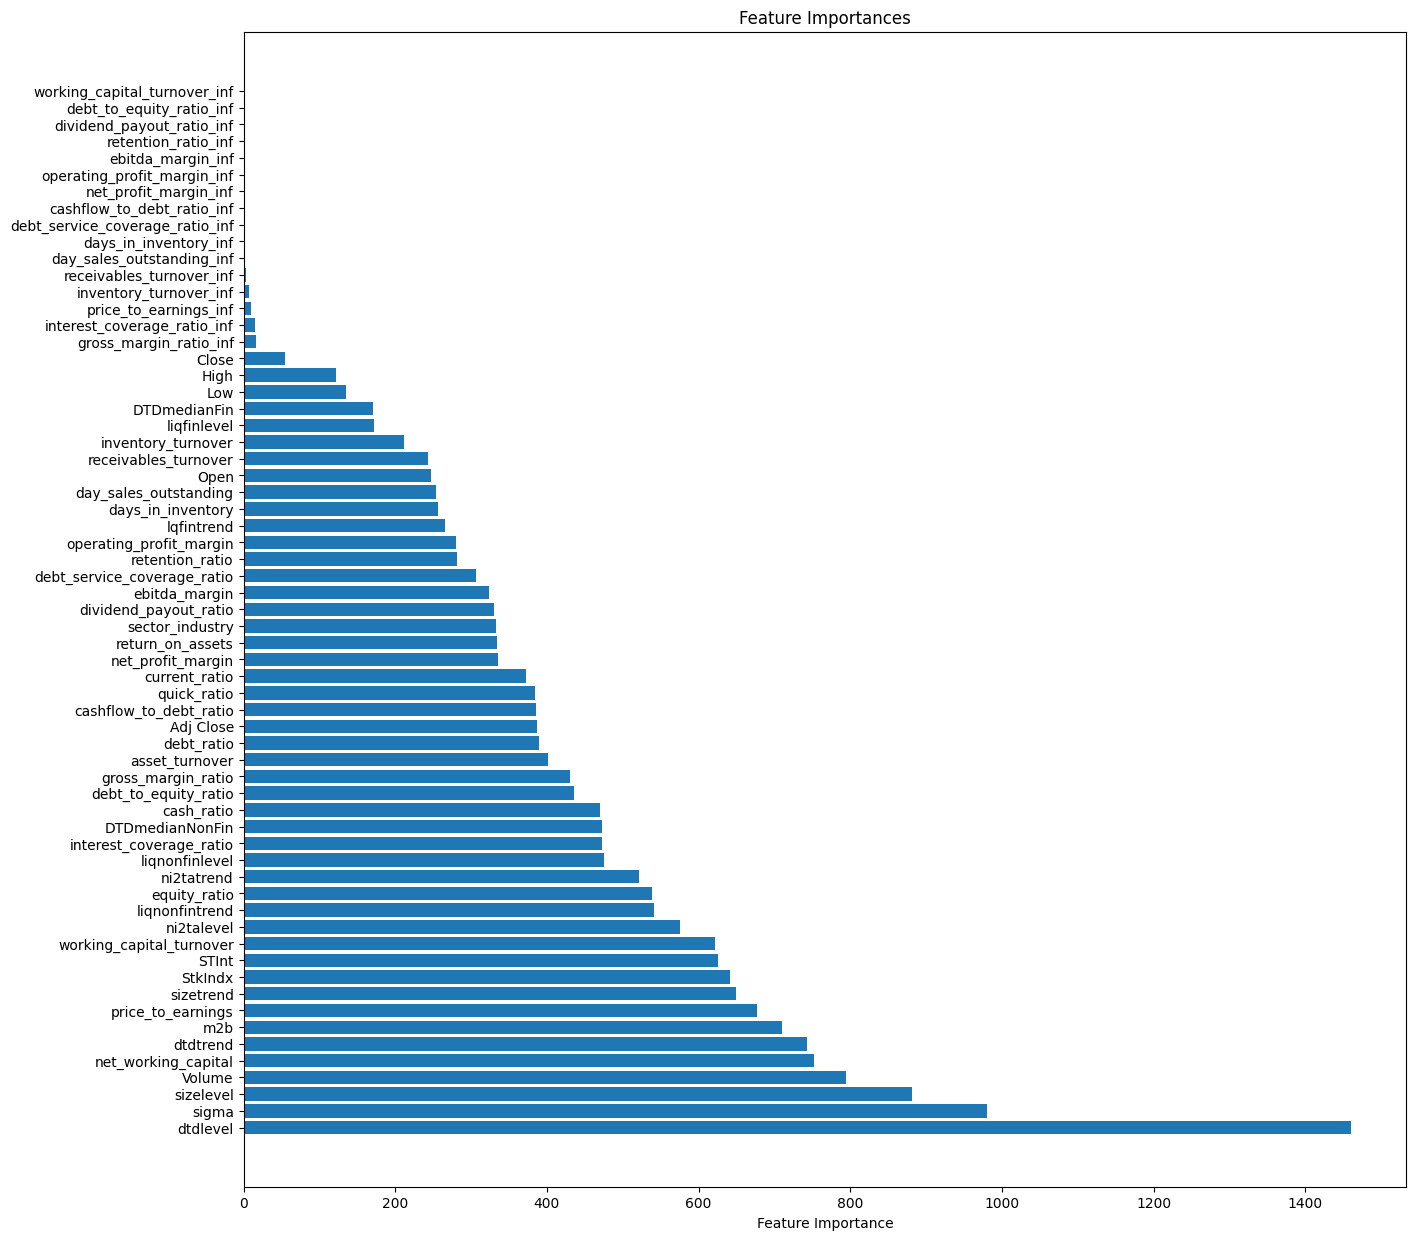

In [188]:
plt.figure(figsize=(15, 15))
plt.barh(range(len(sorted_importance)), sorted_importance.values(), align='center')
plt.yticks(range(len(sorted_importance)), sorted_importance.keys())
plt.xlabel('Feature Importance')
plt.title('Feature Importances')
plt.show()

<font size="6">Testing survival model</font>

In [151]:
pip install pycox

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.7/73.7 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Obtaining dependency information for h5py>=2.9.0 from https://files.pythonhosted.org/packages/6c/ad/0ace9cb2e36e57fa64e59a0a8a5a72e10151d5924cdd36e916e666fdd9da/h5py-3.10.0-cp39-cp39-macosx_10_9_x86_64.whl.metadata
  Obtaining dependency information for numba>=0.44 from https://files.pythonhosted.org/packages/b5/de/e2ef933a99c502d2ec5dda1a43a74ab98b1b606c0ff17422d42c62a6f00f/numba-0.58.1-cp39-cp39-macosx_10_9_x86_64.whl.metadata
  Obtaining dependency information for py7zr>=0.11.3 from https://files.pythonhosted.org/packages/2c/da/

In [154]:
# Import necessary libraries
import pandas as pd
import numpy as np
import torch
import pycox
from pycox.models import DeepSurv

ImportError: cannot import name 'DeepSurv' from 'pycox.models' (/usr/local/lib/python3.9/site-packages/pycox/models/__init__.py)

In [147]:
X_train = train_df.drop(['CompNo', 'year', 'month', 'dummy297fin', 'Default', 'day', 'date', 'StartDate', 'EventDate', 'Duration', 'gvkey', 'cik', 'tic'], axis=1)
y_train = train_df[['Default', 'EventDate']]
y_train = y_train.to_numpy()
X_val = validation_df.drop(['CompNo', 'year', 'month', 'dummy297fin', 'Default', 'day', 'date', 'StartDate', 'EventDate', 'Duration', 'gvkey', 'cik', 'tic'], axis=1)
y_val = validation_df[['Default', 'EventDate']]
y_val = y_val.to_numpy()
X_test = test_df.drop(['CompNo', 'year', 'month', 'dummy297fin', 'Default', 'day', 'date', 'StartDate', 'EventDate', 'Duration', 'gvkey', 'cik', 'tic'], axis=1)
y_test = test_df[['Default', 'EventDate']]

In [148]:
# Load and preprocess the data
data = pd.read_csv('data.csv')
X = data.drop(['time', 'event'], axis=1)
y = data[['time', 'event']].to_records(index=False)
X_train, X_val, X_test, y_train, y_val, y_test = pycox.datasets.split_data(X, y, frac=[0.6, 0.2, 0.2], seed=42)

# Define the DeepSurv model
net = torch.nn.Sequential(torch.nn.Linear(X.shape[1], 64), torch.nn.ReLU(), torch.nn.Linear(64, 32), torch.nn.ReLU(), torch.nn.Linear(32, 1))

# Train the DeepSurv model
model = DeepSurv(net, optimizer=torch.optim.Adam, lr=0.01, batch_size=256, dropout=0.1, l2_reg=0.01)
epochs = 100
callbacks = [pycox.callbacks.EarlyStopping(patience=5)]
log = model.fit(X_train, y_train, X_val, y_val, epochs=epochs, callbacks=callbacks)

# Evaluate the DeepSurv model
result = model.evaluate(X_test, y_test)
print(result)

ValueError: y must be a structured array with the first field being a binary class event indicator and the second field the time of the event/censoring

Testing deepsurv again